In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS8POavN_Mby1JY7T3WXosyIpINkGO90lR5o1HPhPfseJaWrxIj58BXqtmDT_EBPQbIzrjS_HAK3hTy/pub?output=csv')
pd.options.display.max_columns = None
pd.set_option('float_format', '{:,.0f}'.format) #ปรับตัวเลข
df.head()

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,ชื่อ - นามสกุล,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,น้ำมันที่ลูกค้าเลือกใช้,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ
0,4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,Camry,AXVH71R,2018-12-27,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"1,142",NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
1,4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,Yaris,NSP152R,2019-04-04,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,"9,755",NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
2,4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Camry,AVV50R,2012-05-11,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"76,870",NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
3,4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Camry,ASV71R,2018-11-28,NO,2022-01-03,7:00,งานซ่อมทั่วไป,Fleet,Warranty,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,515",NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4,4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,Altis,ZRE141R,2010-10-01,Power train chassis,2022-01-03,8:00,งานซ่อมทั่วไป,Fleet,Cash,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"7,538",ชุดลูกหมากแร็กตัวนอกใน,"26,857",1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์


## อธิบาย ข้อมูล
- เลขที่ใบสั่งซ่อม คือ เลขที่ job ในการเปิดงานของลูกค้าแต่ละคน
- ทะเบียนรถ คือข้อมูลระบุ ทะเบียน รถคันนั้นๆ
- ชื่อ - นามสกุล คือชื่อและนามสกุลของ เข้าของรถทะเบียนนั้น
- ประเภท คือ การระบุ เพศ ชาย หญิง หรือ นามบริษัท
- เบอร์โทรศัพท์ คือข้อมูลไว้สำหรับการติดต่อกับลูกค้า
---
- จังหวัด ภาคที่อยู่ เขต แขวง เป็น ข้อมูล ภูมิลำเนา เกิดของลูกค้า
- รุ่นรถ คือ รุ่นของรถที่ลูกค้าเป็นเจ้าของ
- แบบรถ คือข้อมูล model รถยนต์
- วันออกรถ คือข้อมูลวันที่ลูกค้าออกรถ
- ปัญหาของรถ คือข้อมูลที่ลูกค้าระบุถึงปัญหาส่วนนั้นเช่น เครื่องยนต์
---
- วันเปิดซ่อม คือข้อมูลวันเปิดซ่อมรถคันนั้น
- เวลา คือ ข้อมูลเวลาที่ลูกค้านำรถเข้า
- ประเภทงาน คือข้อมูลงานทีทำการซ่อม เช่น เซ็คระยะ ซ่อมทั่วไป
- ประเภทลูกค้า ก็แบ่งเป็น ชาย หญิง หรือ บริษัท
- การจ่ายเงิน คือ ประเภทการจ่ายเช่น เงินสด หรือ เครดิต
---
- อะไหล่เสนอเพิ่มเติม คือข้อมูลที่ทางช่าง ได้ทำการเสนอรายการอะไหล่ เพื่อซ้อมบำรุงรถ
- ยอดเสนออะไหล่ คือข้อมูลยอดราคาอะไหล่ที่เสนอให้ลูกค้า
- list_no จำนวนรายการอะไหล่
- สถานะ คือข้อมูลที่ลูกค้า อนุมัติหรือไม่ เนื่องจากมีเหตุผลหลายอย่าง
---
- ช่างผู้ทำการเสนอ ข้อมูลของชื่อช่างที่ทำการเสนอรายการอะไหล่
- รหัสแคมเปญ คือข้อมูล แคมเปญที่ลูกค้าได้ในวันที่เปิดซ่อม
- พนักงานผู้ให้บริการ รายชื่อพนักงานรับรถ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                5025 non-null   object 
 1   เลขที่ใบสั่งซ่อม         5025 non-null   object 
 2   ทะเบียนรถ                5025 non-null   object 
 3   ชื่อ - นามสกุล           5025 non-null   object 
 4   ประเภท                   5025 non-null   object 
 5   เบอร์โทรศัพท์            5025 non-null   object 
 6   จังหวัด                  5025 non-null   object 
 7   ภาคที่อยู่               5025 non-null   object 
 8   เขต                      5025 non-null   object 
 9   แขวง                     5025 non-null   object 
 10  รุ่นรถ                   5025 non-null   object 
 11  แบบรถ                    5025 non-null   object 
 12  วันออกรถ                 5025 non-null   object 
 13  ปัญหาของรถ               5025 non-null   object 
 14  วันเปิดงานซ่อม          

## แปลง datatype

In [ ]:
df['ค่าใช่จ่าย'] = df['ค่าใช่จ่าย'].astype(float)
df['ยอดเสนออะไหล่เพิ่มเติม'] = df['ยอดเสนออะไหล่เพิ่มเติม'].astype(float)
df['ระยะทางวันเข้าซ่อม'] = df['ระยะทางวันเข้าซ่อม'].astype(int)
df.head()

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,ชื่อ - นามสกุล,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,น้ำมันที่ลูกค้าเลือกใช้,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ
0,4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,Camry,AXVH71R,2018-12-27,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"1,142",NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
1,4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,Yaris,NSP152R,2019-04-04,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,"9,755",NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
2,4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Camry,AVV50R,2012-05-11,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"76,870",NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
3,4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Camry,ASV71R,2018-11-28,NO,2022-01-03,7:00,งานซ่อมทั่วไป,Fleet,Warranty,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,515",NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4,4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,Altis,ZRE141R,2010-10-01,Power train chassis,2022-01-03,8:00,งานซ่อมทั่วไป,Fleet,Cash,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"7,538",ชุดลูกหมากแร็กตัวนอกใน,"26,857",1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์


## ตรวจสอบข้อมูล missing

In [ ]:
df.isnull().sum()

,0
Timestamp,0
เลขที่ใบสั่งซ่อม,0
ทะเบียนรถ,0
ชื่อ - นามสกุล,0
ประเภท,0
เบอร์โทรศัพท์,0
จังหวัด,0
ภาคที่อยู่,0
เขต,0
แขวง,0


## ดูสถิติเบื้องต้น
- พบว่าข้อมูลมีทั้งหมด ในปี 2022 มีลูกค้าทั้งบริษัท เพศชาย เพศหญิง และอื่นๆที่เข้ามาใช้บริการ 5,025 คัน
- ค่าเฉลี่ยในภาพรวม ประมาณ 5909
- ค่าการกระจายประมาณ 10,000
- ควอร์ไทล์ที่ 1 (Q1) = 1,602 หรือมีความว่าลูกค้าที่เข้าใช้บริการขั้นต่ำอยู่ที่ประมาณ 1,600 บาท
- ควอร์ไทล์ที่ 2 (Q2) = 3,432 หรือลูกค้าที่เข้ามาใช้บริการจะมีค่าใช้จ่ายระดับกลาง ประมาณ 3,400 บาท
- ควอร์ไทล์ที่ 3 (Q3) = 6,400 ลูกค้าที่เข้าใช้บริการที่มีค่าใช้จ่ายระดับสูง อยู่ที่ 6,400 บาท
- ลูกค้าที่มีค่าใช้จ่ายสูงสุดของสาขา พหลโยธิน มีค่าใช้จ่ายถึง 25,5447 บาท

In [ ]:
df.ค่าใช่จ่าย.describe().round(2)

,ค่าใช่จ่าย
count,"5,025"
mean,"5,910"
std,"10,867"
min,1
25%,"1,602"
50%,"3,431"
75%,"6,490"
max,"255,447"


## ลูกค้าคนไหนที่มีการจ่ายเงินมากที่สุดในศูนย์บริการ TM1
- จากข้อมูลพื้นฐาน
- เป็นเพศหญิง
- ภูมิลำเนาที่กรุงเทพ
- ใช้รถ camry model avv50
- ใช้น้ำมันเครื่องเกรดสังเคราะห์ 100% *มีความเป็นไปได้ว่าลูกค้าที่ใช้น้ำมันสังเคราะห์ส่วนใหญ่เป็นลูกค้าที่มีรายได้สูง
- เป็นผู้ที่มีค่าใช้จ่ายสูงที่สุดของศูนย์บริการ สาขาพหลโยธิน
- เป็นลูกค้า ประเภท Normal หรือลูกค้าทั้ว
- และจ่ายเป็นเงินสด

In [ ]:
pd.options.display.max_columns = None
df.sort_values(by='ค่าใช่จ่าย',ascending=False)[0:1]

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,ชื่อ - นามสกุล,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,น้ำมันที่ลูกค้าเลือกใช้,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ
2086,10/10/2023 10:36:22,GSJ22-02155,5กช-9231,กัญญาพร พัฒนาปัญญาสัตย์,หญิง,0863135225,กรุงเทพมหานคร,ภาคกลาง,ยานนาวา,ช่องนนทรี,Camry,AVV50R,2013-02-28,NO,2022-06-09,15:00,งานซ่อมทั่วไป,Normal,Cash,255446,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"255,447",NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์


## ดูการกระจายตัวของข้อมูล columns ค่าใช่จ่าย
- จากการตรวจสอบพบว่า ข้อมูล columns ค่าใช่จ่ายนั้นมีลักษณะเป็นกราฟที่กระจุดตัวอยู่ใน เกณฑ์ประมาณ 1000 - 5000 บาท
- คือลูกค้าส่วนใหญ่ในปี 2022 จะใช้เงินบำรุงรักษารถอยู่ในระดับตั้งแต่ 1000 - 5000 บาท
- นี้เป็นค่าใช้จ่ายเบื้องต้นจากการเซ็คระยะเท่านั้นยังไม่รวมอื่น เช่น ค่าแรง และน้ำยาล้างแอร์ อื่นๆอีก ในข้อมูลนี้ยังไม่ได้การบันทึกมา

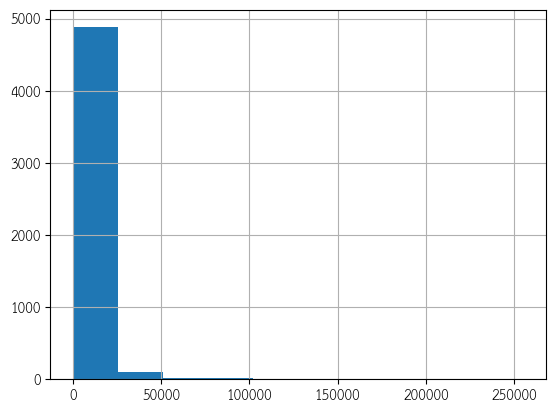

In [ ]:
df.ค่าใช่จ่าย.hist(bins=10);

## ดูความสัมพันธ์ของข้อมูล
- เห็นได้ว่า ระยะทางของรถ ไม่มีผลต่อค่าใช่จ่ายเท่าไร

In [ ]:
df.select_dtypes(include=['float64','int']).corr()

,ระยะทางวันเข้าซ่อม,ค่าใช่จ่าย,ยอดเสนออะไหล่เพิ่มเติม,list_no
ระยะทางวันเข้าซ่อม,1,0,0,0
ค่าใช่จ่าย,0,1,-0,-0
ยอดเสนออะไหล่เพิ่มเติม,0,-0,1,1
list_no,0,-0,1,1


## เปรียบเทียบระยะทางเข้าซ่อม กับ ค่าใช่จ่าย
- ดูจากกราฟพบว่ารถท่เข้ามาใช้บริการที่ศูนย์บริการนั้นมีการวิ่งมาในระยะทางที่มากพอสมควร ตั้งแต่หลัก 1000 กี่โล ถึงประมาณ 100000 กิโล
---
- ส่วนของค่าใช้จ่ายนั้นอยู่ในประมาณไม่เกิน 30000 บาท

<Axes: >

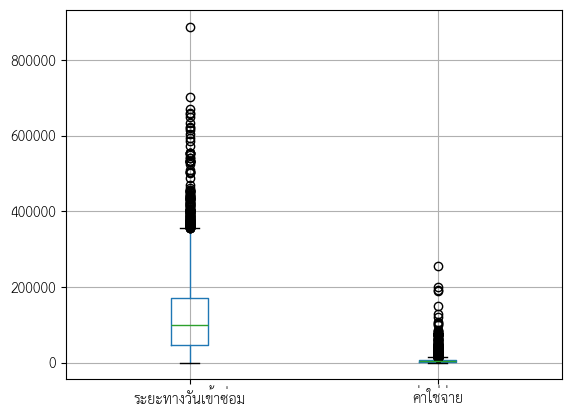

In [ ]:
df.boxplot(column=['ระยะทางวันเข้าซ่อม', 'ค่าใช่จ่าย'])

## เปรียบเทียบการกระจายตัว
- เมื่อเปรียบเทียบการการะจายตัวแลัว พบว่า ค่าใช้จ่ายนั้นน้อยกว่าระยะทางวันเข้าซ้อมมาก (แสดงถึงความไม่สัมพันธ์)
- นั้นความความว่าลูกค้า ต่อให้มีเลขไมล์ที่มาก ก็ยังนิยมนำรถเข้าศูนย์บริการ|

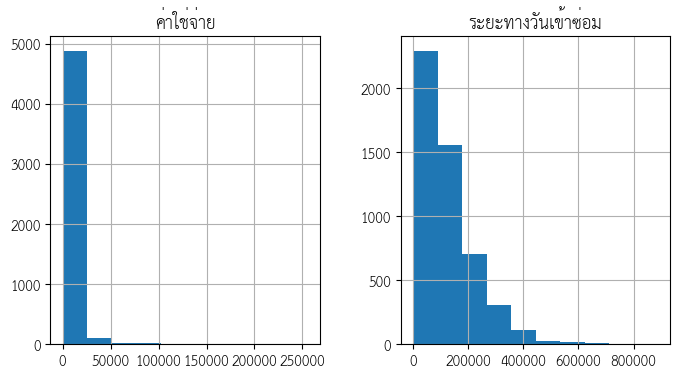

In [ ]:
df[['ค่าใช่จ่าย', 'ระยะทางวันเข้าซ่อม']].hist(figsize=(8, 4));

## ยอดค่ารายได้ทั้งหมดในปี 2022 มีเท่าไร
- 29,697,112 บาท ของทั้งปี 2022

In [ ]:
sum_total = df[['ค่าใช่จ่าย']].sum().round(2)
sum_total

,0
ค่าใช่จ่าย,"29,697,112"


## ลูกค้ากลุ่มไหนมียอดค่าใช้จ่ายมากที่สุด
- จากที่ดูข้อมูลพบว่า
- ภาพรวมยังคงเป็นลูกค้าบริษัทที่เข้ามาใช้บริการเยอะที่สุด ทำให้มียอดรวมที่สูงที่สุด
- แต่ว่าเมื่อเปรียบเทียบค่า median กับ ค่า เฉลี่ยแลัว น้อยกว่าลูกค้าที่เป็นลูกค้าที่เป็น ผู้หญิง และ ผู้ชาย
- ความหมาย คือ ลูกค้าประเภทบริษัท เข้ามาใช้บริการเยอะก็จริง แต่มียอดค่าใช้จ่ายต่อครั้ง น้อยกว่าลูกค้าประเภท ชาย หญิง ลูกค้าประเภทบริษัทได้แค่จำนวนรถเข้าศูนย์เท่านั้น นั้นเอง
---
## insight
- ถ้าเรามองไปที่ค่า median และ mean จะพบว่า
- ลูกค้าบริษัท มีค่า median และ mean น้อยกว่าลูกค้า ผู้ชายและ ผู้หญิง ที่เป็นลูกค้าปรติ
- ลูกค้าที่เป็นผู้หญิงอัตราการจ่ายเงินซ่อมรถ มากที่สุด (ค่าเฉลี่ย = 6674 บาท)

In [ ]:
df.groupby('ประเภท')['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False).round(2)

,count,sum,median,mean
ประเภท,,,,
บริษัท,2389,"12,819,517","2,725","5,366"
หญิง,1353,"9,031,222","3,837","6,675"
ชาย,1256,"7,636,423","3,884","6,080"
ห้างหุ้นส่วนจำกัด,7,"105,008","5,069","15,001"
หน่วยงานราชการ,20,"104,942","4,455","5,247"


#จำนวนลูกค้าชายหญิงรวมกัน
- 2609

In [ ]:
1256 + 1353 #ลูกค้าที่ไม่ใช้บริษัทมีมากกว่าลูกค้าที่เป็น บริษัทมากกว่า แค่ 300 คน

2609

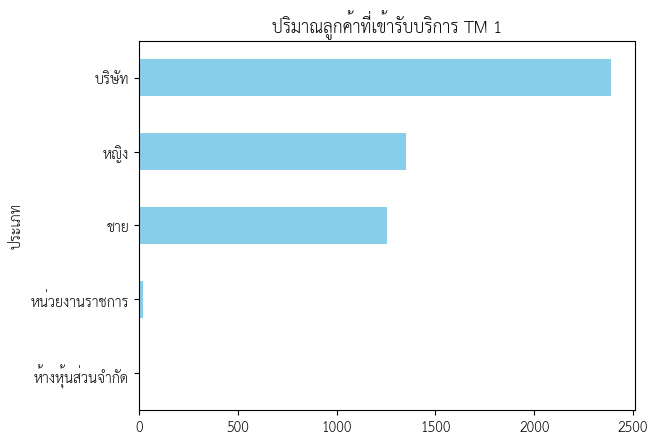

In [ ]:
df.value_counts('ประเภท').sort_values(ascending=True).plot(kind='barh',color='skyblue',x='กลุ่มลูกค้า',
                                                           title='ปริมาณลูกค้าที่เข้ารับบริการ TM 1');

## เริ่มการวิเคราะห์ข้อมูล 😄

## สิ่งที่น่าสนใจ
- ลูกค้าบริษัทมีจำนวนการเข้าใช้บริการ ค่อนข้างจะมาก !แต่มีค่าใช้จ่ายโดยเฉลี่ยน้อยกว่าลูกค้าทั่วไป ทั้งชาย และหญิง
- ดังนั้นเราจะมาหากันก่อนว่า แล้วบริษัทไหนที่มีการใช้บริการ และการจ่ายเงินมากที่สุด

In [ ]:
customer_b2b = df.query('ประเภท == "บริษัท"')

In [ ]:
customer_b2b.describe().round(2)

,ระยะทางวันเข้าซ่อม,ค่าใช่จ่าย,ยอดเสนออะไหล่เพิ่มเติม,list_no
count,"2,389","2,389","2,389","2,389"
mean,"109,331","5,366","1,699",0
std,"97,481","9,385","9,367",2
min,23,1,0,0
25%,"39,867","1,515",0,0
50%,"81,475","2,725",0,0
75%,"142,899","5,780",0,0
max,"670,315","189,540","122,244",26


In [ ]:
customer_b2b['ชื่อ - นามสกุล'].unique()

array(['ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด',
       'บริษัท ซีพีที ไดร์ แอนด์ เพาเวอร์ จำกัด มหาชน',
       'ไทยโอริกซ์สิสซิ่ง จำกัด', 'กรุงเทพโทรทัศน์และวิทยุ จำกัด',
       'เอ็มทีเอ็ม เทรดดิ่ง ประเทศไทย จำกัด', 'จีจี ทรานสปอร์ต จำกัด',
       'เวิลด์คลาส เรนท์ อะ คาร์ จำกัด', 'ไทยโอริกซ์ลิสซิ่ง จำกัด',
       'ซินเนอร์เจติค ออโต้ เพอร์ฟอร์มานซ์ จำกัด มหาชน',
       'เดอะรอยัลเจมส์ กอลฟ์ แอนด์ สปอร์ตคลับ', 'กิบไทย จำกัด',
       'โตโยต้าสยามออโต้ ซาลอน ยูสคาร์ (2012) จำกัด',
       'เวนเจอร์เทค มาร์เก็ตติ้ง จำกัด', 'อาคเนย์แคปปิตอล จำกัด',
       'มายฟลอร์ จำกัด', 'บุญถาวรเซรามิค จำกัด', 'เค คาร์เรนทอล จำกัด',
       'เออีซี เฮลธ์แคร์ จำกัด',
       'อิตาเลียนไทย ดีเวล๊อปเมนต์ จำกัด (มหาชน)',
       'กรุงไทยคาร์เร้นท์ แอนด์ ลีส จำกัด (มหาชน)',
       'บีเอสแอล ลีสซิ่ง จำกัด', 'แคนเซอิ จำกัด', 'ทรู ลีสซิ่ง จำกัด',
       'สาธร คาร์เร้นท์ จำกัด',
       'ซูมิโตโม มิตซุย ออโต้ ลิสซิ่ง แอนด์ เซอร์วิส (ไทยแลนด์) จำกัด',
       'ไทยโอริกซ์ลีสซิ่ง จำกัด', 'สยามคาร์เรนท์ จำกัด', 'เมซโซ่ จำกัด',

## เรามาดู top 10 บริษัทที่มีค่าจ่ายเงินให้ศูนย์บริการมากที่สุด
- อันดับ 1 ของลูกค้าประเภทบริษัท คือ บริษัทกรุงเทพวิทยุโทรทัศน์และวิทยุ จำกัด หรือ ช่อง 7 สี
- และมียอดค่าใช่จ่ายกับศูนย์บริการเยอะที่สุดในปี 2022 ถึง 1,119990 บาท
-จะสังเกตุว่า ช่อง 7 สี มีการยอดค่าใช้จ่ายที่สูงที่สุด โดยมีการเข้ามารับบริการแค่ 105 ครั้ง
- แต่ บริษัทไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด มีการนำรถเข้ามา ถึง 165 ครั้ง แต่ค่าเฉลี่ยอยู่อันดับที่ 3 แสดงให้เห็นว่า ลูกค้าบริษัทเครดิตนั้น ยอดรถเข้าอาจจะเยอะ แต่ไม่ได้หมายความว่าทางศูนย์จะมีรายได้มากขึ้น
---
## ธุรกิจของลูกค้าระดับ top 10
- กรุงเทพโทรทัศน์และวิทยุ จำกัด เป็นธุรกิจการจัดผังรายการและออกอากาศทางโทรทัศน์ Free TV
- ปตท.จำกัด (มหาชน)  รัฐวิสาหกิจรูปแบบบริษัทมหาชนจำกัดที่ประกอบธุรกิจน้ำมันและแก๊สที่จดทะเบียนในตลาดหลักทรัพย์แห่งประเทศไทย
-อาคเนย์แคปปิตอล จำกัด รถยนต์เช่าเพื่อธุรกิจที่ผู้ประกอบการ
- จีจี ทรานสปอร์ต จำกัด เป็นธุรกิจการขนส่งผู้โดยสารทางบกอื่นๆ การขนส่งผู้โดยสารทางบกอื่นๆ
- ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด เป็นธุรกิจให้เช่ารถยนต์ การให้เช่าและให้เช่าแบบลิสซิ่งยานยนต์ชนิดรถบรรทุก
- เค เซิร์ฟ จำกัด เป็นธุรกิจค้าที่ดิน,ให้บริการเช่าให้เช่าทรัพย์สินประเภทรถยนต์ และเฟอร์นิเจอร์ การซื้อและการขายอสังหาร
---
- ลูกค้า top 10 ส่วนใหญ่จะทำธุรกิจปล่อยรถให้เช่าเป็นส่วนใหญ่ อาจจะเป็นเพราะศูนย์บริการโดโยต้า มหานคร ให้ส่วนลดที่มาก อาจจะเป็นปัจจัยที่ทำให้ลูกค้าบริษัทเลือกใช้บริการ ยิ่งเป็นธุรกิจ เกี่ยวกับการเช่ารถ แล้วต้องการลดค่าใช่จ่ายในการซ่อมแซม โตโยต้ามหานครถือเป็นตัวเลือกที่ดี


In [ ]:
customer_b2b.groupby('ชื่อ - นามสกุล')['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False)[0:10].round(2)

,count,sum,median,mean
ชื่อ - นามสกุล,,,,
กรุงเทพโทรทัศน์และวิทยุ จำกัด,105,"1,119,990","6,029","10,667"
ปตท.จำกัด (มหาชน),33,"653,065","9,479","19,790"
อาคเนย์แคปปิตอล จำกัด,223,"632,631","1,872","2,837"
จีจี ทรานสปอร์ต จำกัด,74,"630,257","4,936","8,517"
ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,165,"506,669","1,515","3,071"
เค เซิร์ฟ จำกัด,116,"478,148","2,725","4,122"
กิบไทย จำกัด,41,"427,302","7,278","10,422"
เวิลด์คลาส เรนท์ อะ คาร์ จำกัด,117,"406,491","2,005","3,474"
ทรู ลีสซิ่ง จำกัด,142,"381,975","1,779","2,690"


## รายชื่อ บริษัทที่นำรถเข้ามาใช้บริการศูนย์(น้อย แต่ยอดต่อการซ่อม 1 ครั้งเยอะ)
- รายชื่อบริษัทที่นำรถเข้าศูนย์บริการน้อย แต่สามารถจ่ายเงินในการซ้อมได้มาก
- ฟีนิกซ์ ซินดิเคท(ประเทศไทย) จำกัด เป็นธุรกิจจำหน่ายสุราต่างประเทศ การขายส่งเครื่องดื่มที่มีแอลกอฮอล์
- พีพีจี โคทติ้งส์(ประเทศไทย) จำกัด เป็นธุรกิจผลิตและจำหน่ายผลิตภัณฑ์เคลือบบรรจุภัณฑ์ ผลิตภัณฑ์พ่นทาและเคลือบรถ
- สยามสเปคตรัมเทรดดิ้ง จำกัด เป็นธุรกิจให้บริการเช่าอาคาร การเช่าและการดำเนินการเกี่ยวกับอสังหาริมทรัพย์ที่เป็นของ
- เอ็นทีเอ็น เทรดดิ้ง-ประเทศไทย จำกัด เป็นธุรกิจจำหน่ายปลีกอุปกรณ์เครื่องมือแพทย์ ร้านขายปลีกสินค้าทางเภสัชภัณฑ์และเวชภัณฑ์
- ไทย ไดมอนด์ แลนด์ จำกัด การซื้อและการขายอสังหาริมทรัพย์ที่เป็นของตนเองที่ไม่ใช่ เพื่อเป็นที่พักอาศัย
---
## insight
_สังเกตุไหมว่า บริษัทที่นำรถเข้าศูนย์บริการน้อย ส่วนใหญ่ทำธุรกิจ ที่เป็นมีแนวโน้นเติมโตในอนาคตทั้งนั้น_
- ดังนั้นลูกค้ากลุ่มค่อนข้างน่าสนใจมาก เพราะมีการจ่ายค่าซ่อมต่อ 1 ครั้งมากกว่า ลูกค้าระดับ top 10
- ดังนั้นในการทำการตลาดกับลูกค้ากลุ่มนี้ เพื่อดูว่ามีการใช้รถโตโยต้ากี่คัน
- ข้อดีลูกค้ากลุ่มนี้จะซ่อมเยอะ
- ข้อเสีย คือถามมีรถ toyota น้อยก็จะนานๆเข้าที
- ควรทำการตลาดกับลูกค้ากลุ่มนี้ อนาคตอาจจะเป็นลูกค้าประจำ เหมือน ลูกค้า top10

In [ ]:
customer_b2b.groupby('ชื่อ - นามสกุล')['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='median',ascending=False)[0:10].round(2)

,count,sum,median,mean
ชื่อ - นามสกุล,,,,
ฟีนิกซ์ ซินดิเคท(ประเทศไทย) จำกัด,1,"62,098","62,098","62,098"
พีพีจี โคทติ้งส์(ประเทศไทย) จำกัด,2,"79,420","39,710","39,710"
สยามสเปคตรัมเทรดดิ้ง จำกัด,2,"79,343","39,672","39,672"
เอ็นทีเอ็น เทรดดิ้ง-ประเทศไทย จำกัด,2,"73,310","36,655","36,655"
ไทย ไดมอนด์ แลนด์ จำกัด,1,"33,825","33,825","33,825"
กองกำกับการ4 กองบังคับการปราบปราม,1,"28,476","28,476","28,476"
เอ.อาร์.เอ.วิศวกรรมและพานิช,2,"51,532","25,766","25,766"
โตโยต้าสกลนครยูสคาร์ จำกัด,1,"23,859","23,859","23,859"
หรรษาธานี จำกัด,1,"20,016","20,016","20,016"


## จากข้อมูลเบื้องต้น
- ลูกค้าประเภทบริษัท 10 อันดับแรกที่มีการจ่ายเงินให้ศูนย์บริการมากกที่สุดนั้น
- ลูกค้าประเภทบริษัท 10 แรก ที่เข้ามาใช้บริการนั้น ใช้รถรุ่นอะไรกันบาง
---
- จากข้อมูล พบว่าลูกประเภท บริษัท นิยมใช้ camry รถตู้ Hiace Commuter altis และ hilux Revo ที่ top 10
- ส่วนใหญ่เป็น model ค่อนข้างจะเป็นรถรุ่นใหม่แล้ว

In [ ]:
customer_b2b.groupby(['ชื่อ - นามสกุล','รุ่นรถ','แบบรถ'])['ค่าใช่จ่าย'].agg(['count','sum']).sort_values(by='sum',ascending=False)[0:10].round(2)

,,,count,sum
ชื่อ - นามสกุล,รุ่นรถ,แบบรถ,,
ปตท.จำกัด (มหาชน),Camry,AVV50R,29,"577,143"
จีจี ทรานสปอร์ต จำกัด,Hiace,TRH223R,43,"463,893"
กรุงเทพโทรทัศน์และวิทยุ จำกัด,Camry,AVV50R,14,"392,637"
เวนเจอร์เทค มาร์เก็ตติ้ง จำกัด,Hilux Revo,GUN122R,40,"294,144"
กิบไทย จำกัด,Hilux Revo,GUN122R,26,"248,658"
ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,Altis,ZRE171R,48,"237,251"
อาคเนย์แคปปิตอล จำกัด,Altis,ZRE171R,61,"236,520"
เอสเอสยูที จำกัด,Commuter,KDH223R,11,"230,847"
ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,Camry,ACV51R,16,"185,045"


## insight
- ถ้าดูจากค่ากลาง เฉลี่ยแล้วจะพบสถิติสำคัญ คือ ค่ากลาง ของค่าใช้จ่ายของแต่ละบริษัท
- จะเห็นว่าบริษัทส่วนใหญ่จะมีค่ากลาง(เฉลี่ย)ที่ เกือบๆ 8000 บาท
และยอดค่าใช้จ่าย(กลาง)ส่วนใหญ่ก็ไม่เกิด 15000  บาท
---
## หมายเหตุ
- ลูกค้าประเภทบริษัท มักจะมีการชื้อรถใหม่ตลอด และรถเก่าก็ขายออก
- เป็นการจำกัดค่าใช้จ่ายในการซ่อมบำรุง ทำให้ศูนย์บริการเสนอราคาการซ่อมไม่ได้มาก สำหรับลูกค่าบริษัท
- และมีรถจำนวนมาก รถบางคันอาจจะใช้งานหนักไม่เท่ากัน มากบาง น้อยบาง
- และอาจจะมีรถที่เก่า และใหม่อยู่ เวลาเสนอราคาอาจจะไม่ได้มากเท่าที่ควร (ถ้าเป็นรถใหม่จะเสนอราคาได้น้อยเพราะระยะเลขไมล์ไม่ถึง)

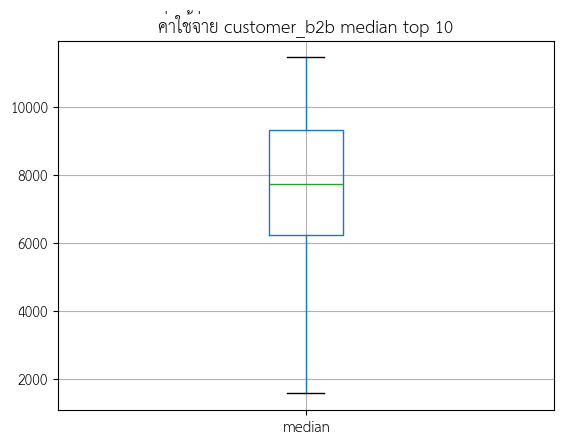

In [ ]:
top_10 = customer_b2b.groupby(['ชื่อ - นามสกุล','รุ่นรถ','แบบรถ'])['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False)[0:10]
top_10.boxplot(column=['median']).set_title('ค่าใช้จ่าย customer_b2b median top 10');

## จากที่เห็นลูกค้าประเภท บริษัทนั้นมีค่าใช้จ่ายค่อนข้างน้อย
- เราจะมาดูกันว่า เลขไมล์ ณ วันที่เขารับการบริการนั้นอยู่ที่ประมาณเท่าไร


In [ ]:
Rangs=['1-1000','1,001 - 9000 ','10,000-20,000', '20,001-30,000', '30,001-40,000', '40,001-50,000', '50,001-60,000', '60,001-70,000','70,001-80,000','80,001-90,000','90,001+']
# สร้างกลุ่มเลขที่ไมล์
customer_b2b['กลุ่มเลขไมล์'] = pd.cut(df.ระยะทางวันเข้าซ่อม,# สร้าง columns ใช้ function cut ในการตัดเลขไมล์
                           bins=[1,1000 ,10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000,90000,np.inf], #กำหนด bins
                           labels=Rangs, #กำหนดให้สร้างตาม list
                           right=True)
customer_b2b.sort_values(by='กลุ่มเลขไมล์')

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,ชื่อ - นามสกุล,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,น้ำมันที่ลูกค้าเลือกใช้,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
689,5/11/2023 9:19:39,GSJ22-00707,2ฒฐ-444,รักษาความปลอดภัย กรุงเทพบีเอสเอส จำกัด,บริษัท,0818296974,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Hilux Revo,GUN122R,2021-11-26,NO,2022-02-21,11:00,เซ็คระยะ,Fleet,Warranty,167,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,75,NO,0,0,อนุมัติ,sbooncha,NO,อัมรินทร์ ปานสวน,1-1000
870,5/22/2023 11:45:05,GSJ22-00893,7กฬ-5547,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0965858885,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Altis,ZRE171R,2018-09-28,NO,2022-03-09,15:00,เซ็คระยะ,Fleet,Credit,499,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,953",NO,0,0,อนุมัติ,nchaimag,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,1-1000
112,4/6/2023 14:35:57,GSJ22-00115,9กน-8248,ทรู ลีสซิ่ง จำกัด,บริษัท,020331334,กรุงเทพมหานคร,ภาคกลาง,ห้วยขวาง,ห้วยขวาง,Vios,NSP151R,2021-10-08,NO,2022-01-11,8:00,เซ็คระยะ,Fleet,Warranty,890,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,75,NO,0,0,อนุมัติ,pmungmon,FSC002,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,1-1000
3920,5/14/2024 9:54:40,GSJ22-04044,3ฒน-133,เค เซิร์ฟ จำกัด,บริษัท,0866663443,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Hilux Revo,GUN122R,2022-07-26,NO,2022-10-19,14:00,งานซ่อมทั่วไป,Fleet,Warranty,575,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,75,NO,0,0,อนุมัติ,ploecyr,NO,อัมรินทร์ ปานสวน,1-1000
4277,6/18/2024 9:38:00,GSJ22-04406,3ขถ-8971,ทีซี คาร์โซลูชั่นส์ (ไทยแลนด์) จำกัด,บริษัท,020277810,กรุงเทพมหานคร,ภาคกลาง,ราชเทวี,มักกะสัน,Camry,AXVA70R,2022-11-08,NO,2022-11-12,9:00,งานซ่อมทั่วไป,Fleet,Cash,718,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"10,819",NO,0,0,อนุมัติ,ksriwanp,NO,อัมรินทร์ ปานสวน,1-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,7/1/2023 10:25:47,GSJ22-01400,7กภ-2691,ซินเนอร์เจติค ออโต้ เพอร์ฟอร์มานซ์ จำกัด (มหาชน),บริษัท,0934576582,สมุทรปราการ,ภาคกลาง,เมืองสมุทรปราการ,เทพารักษ์,Altis,ZRE171R,2018-06-29,NO,2022-04-18,9:00,เซ็คระยะ,Fleet,Cash,116580,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"2,350",NO,0,0,อนุมัติ,nchaimag,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
1363,7/1/2023 10:39:53,GSJ22-01402,ญต-1081,เอสเอสยูที จำกัด,บริษัท,025549222,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Fortuner,KUN51R,2011-03-25,"Enging, Power train chassis, Electrical",2022-04-18,10:00,เซ็คระยะ,Fleet,Credit,110223,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"2,622",แบตเตอรี่|ผ้าเบครหลัง|ประเก็นอ่างเครื่อง|ชุดตู...,"16,119",10,ไม่อนุมัติ,rthasi,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
1370,7/1/2023 11:29:15,GSJ22-01410,8กผ-1315,บุญถาวรเซรามิค จำกัด,บริษัท,026571111,กรุงเทพมหานคร,ภาคกลาง,ห้วยขวาง,สามเสนนอก,Camry,AXVA70R,2019-03-29,NO,2022-04-18,14:00,งานซ่อมทั่วไป,Fleet,Warranty,110350,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,214",NO,0,0,อนุมัติ,sbooncha,SSC000096,อัมรินทร์ ปานสวน,"90,001+"
3174,2/22/2024 9:17:00,GSJ22-03255,ฆท-1614,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Fortuner,KUN61R,2012-05-22,NO,2022-08-23,9:00,เซ็คระยะ,Fleet,Credit,253065,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,198,NO,0,0,อนุมัติ,sbooncha,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"


In [ ]:
customer_b2b.กลุ่มเลขไมล์.sort_values()

,กลุ่มเลขไมล์
689,1-1000
870,1-1000
112,1-1000
3920,1-1000
4277,1-1000
...,...
1361,"90,001+"
1363,"90,001+"
1370,"90,001+"
3174,"90,001+"


## หลังจากที่เราได้ทำการจับกลุ่มระยะเลขไลม์แล้ว
- พบว่ารถของบริษัทส่วนใหญ่ระยะเลขไมล์ส่วนใหญ่จะอยู่ในระยะ 90,000 +
- แต่ค่าใช้จ่ายอยู่ในระดับประมาณ หลักพันกลาง ค่าเฉลี่ยอยู่ที่ประมาณ 10000 ต้นๆ
---
## insight
- ผู้วิเคราะห์สังเกตุเห็นว่า ในระดับกลุ่มเลขไมล์ บริษัทที่อยู่ในระดับ top10 จะอนุมัติค่าใช้จ่ายส่วนนี้อยู่ที่ประมาณ ไม่เกิน 10000 ต่อคัน
- ถึงแม้ว่าเลขไมล์จะมากกว่า 90000 กิโลก็ตาม
- ข้อสังเกตุบริษัท กรุงเทพโทรทัศน์และวิทยุ จำกัด นิยมใช้ รถ Camry เป็นหลัก
- รถรุ่น camry อาจจะรุ่นรถที่สามารถทำยอดให้กับศูนย์บริการได้มากกว่ารถรุ่นอื่น เนื่องจากผู้ใช้มักมีรายได้ที่สูง และอะไหล่ค่อนข้างจะแพง**
- น้ำมันที่นิยนใช่ค่อนข้างจะแพง

In [ ]:
customer_b2b.groupby(['ชื่อ - นามสกุล','กลุ่มเลขไมล์','รุ่นรถ','แบบรถ'])['ค่าใช่จ่าย'].agg(['count','sum','median','mean'])\
.sort_values(by='กลุ่มเลขไมล์',ascending=False).nlargest(10,columns='sum').round(2)

,,,,count,sum,median,mean
ชื่อ - นามสกุล,กลุ่มเลขไมล์,รุ่นรถ,แบบรถ,,,,
จีจี ทรานสปอร์ต จำกัด,"90,001+",Hiace,TRH223R,43,"463,893","6,625","10,788"
ปตท.จำกัด (มหาชน),"90,001+",Camry,AVV50R,22,"459,308","9,454","20,878"
กรุงเทพโทรทัศน์และวิทยุ จำกัด,"90,001+",Camry,AVV50R,7,"270,961","7,059","38,709"
เวนเจอร์เทค มาร์เก็ตติ้ง จำกัด,"90,001+",Hilux Revo,GUN122R,27,"252,970","8,053","9,369"
เอสเอสยูที จำกัด,"90,001+",Commuter,KDH223R,11,"230,847","11,444","20,986"
กิบไทย จำกัด,"90,001+",Hilux Revo,GUN122R,20,"215,774","9,265","10,789"
ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,"90,001+",Camry,ACV51R,16,"185,045","8,554","11,565"
ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,"90,001+",Altis,ZRE171R,24,"184,021","1,462","7,668"
กรุงเทพโทรทัศน์และวิทยุ จำกัด,"90,001+",Fortuner,KUN61R,17,"177,947","9,479","10,467"


## กลุ่มลูกค้าบริษัทที่มียอดค่าใช้จ่ายสูง แต่รถเข้าใช้บริการน้อย
- บริษัทที่มียอดเข้าน้อย แต่มีค่าใช่จ่ายที่มาก 10 อันดับ
- สังเกตุว่าลูกค้าบริษัทกลุ่มนี้เข้าไม่เยอะ แต่จ่ายเงินในระดับที่สูงได้
- โดนเฉพาะ บริษัทที่อยู่ใน กลุ่มของ คิงเพาเวอร์ ที่เป็นบริษัทใหญ่ และ กรุงเทพโทรทัศน์และวิทยุ จำกัด
- รถ camry เป็นรถที่ลูกค้ากลุ่มบริษัทเลือกใช้งานกันมากที่สุด
- ลูกค้ากลุ่มนี้ เสนออะไหล่มีแนวโน้มว่าจะทำกับศูนย์บริการ ไม่ไปทำที่อื่น

In [ ]:
customer_b2b.groupby(['ชื่อ - นามสกุล','กลุ่มเลขไมล์','รุ่นรถ','แบบรถ'])['ค่าใช่จ่าย'].agg(['count','sum','median','mean'])\
.sort_values(by='กลุ่มเลขไมล์',ascending=False).nlargest(10,columns='mean').round(2)

,,,,count,sum,median,mean
ชื่อ - นามสกุล,กลุ่มเลขไมล์,รุ่นรถ,แบบรถ,,,,
คิง เพาเวอร์ อินเตอร์เนชั่นแนล จำกัด,"90,001+",Hiace,KDH222R,1,"78,305","78,305","78,305"
ฟีนิกซ์ ซินดิเคท(ประเทศไทย) จำกัด,"90,001+",Camry,ACV51R,1,"62,098","62,098","62,098"
คิง เพาเวอร์ ดิวตี้ฟรี จำกัด,"90,001+",Hiace,KDH200R,1,"47,473","47,473","47,473"
เวิลด์คลาส เรนท์ อะ คาร์ จำกัด,"80,001-90,000",Alphard,AYH30R,2,"83,798","41,899","41,899"
พีพีจี โคทติ้งส์(ประเทศไทย) จำกัด,"90,001+",Camry,AVV50R,2,"79,420","39,710","39,710"
สยามสเปคตรัมเทรดดิ้ง จำกัด,"90,001+",Camry,AVV50R,2,"79,343","39,672","39,672"
กรุงเทพโทรทัศน์และวิทยุ จำกัด,"90,001+",Camry,AVV50R,7,"270,961","7,059","38,709"
เอ็นทีเอ็น เทรดดิ้ง-ประเทศไทย จำกัด,"90,001+",Camry,AHV40R,2,"73,310","36,655","36,655"
คิง เพาเวอร์ คอร์ปอเรชั่น จำกัด,"90,001+",Hiace,KDH201R,2,"68,555","34,278","34,278"


## ลูกค้าประเภทบริษัทนิยมใช้รถอะไรบาง
- รถยอดนิยม คือ Altis,Camry, Hilux Revo,Commuter,Vios
- ดูจากข้อมูลรุ่นรถแล้ว เนื่องจากผู้วิเคราะห์นั้นมีความรู้ในเรื่องรถยนต์ และอยู่ในส่วนของงานบริการลูกค้ามา
---
- เมื่อดูจากข้อมูลนี้ ผู้วิเคราะห์เห็นว่า บริษัทโตโยต้ามหานคร ควรโฟกัสลูกค้ากลุ่มประเภท บริษัทที่ถือครองรถรุ่นดังนี้
#### เหตุผล
- Camry อะไหล่ค่อนข้างจะแพง ผู้ใช้ส่วนใหญ่ค่อนข้างมีรายได้สูง และใช้น้ำมันเกรดสังคราะห์ 100 % มีโอกาสเพิ่มยอดขายจากการเสนออะไหล่เพิ่มเติมได้ง่าย
- Hilux Revo หรือ รถกระบะทุกรุ่นของ toyota อะไหล่ไม่ค่อยขาดโรงงานสต็อกเอาไว้เยอะ
เป็นที่นิยมของบริษัท ที่ทำธุรกิจประเภทขนส่ง ใช้เคมีภัณฑ์ค่อนข้างเยอะ ราคาอะไหล่แพงพอสมควร เป็นที่นิยมของกลุ่มลูกค้าที่ทำอาชีพขนส่งและค้าขาย
- Commuter เป็นรถที่นิยมใช้ในการขนส่งสินค้าเป็นที่นิยมของบริษัทที่ทำธุรกิจขนส่ง อะไหล่ค่อนข้างจะแพง ใช้เคมีภัณฑ์ค่อนข้างมากในการเปลี่ยนถ่ายน้ำมันเครื่อง
- Fortuner อะไหล่ไม่แพงมาก ผู้ใช้ส่วนใหญ่มักมีรายได้สูง อะไหล่โรงงานสต็อกไว้เยอะ
ใช้เคมีภัณฑ์ค่อนข้างเยอะ มีแนวโนํมเพิ่มยอดขายจากส่วนที่เสนอราคาเพิ่มเติมได้

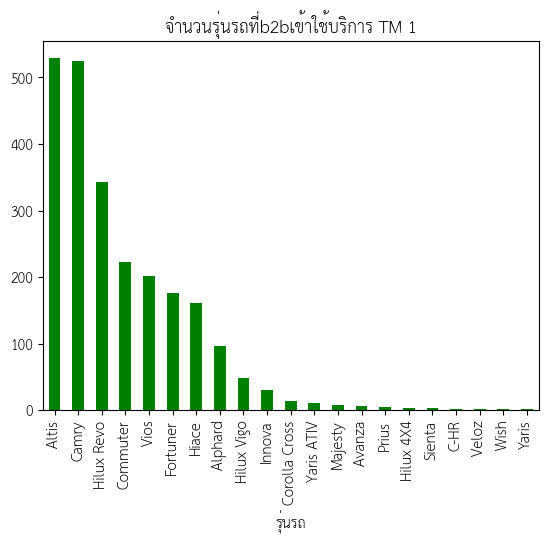

In [ ]:
customer_b2b.value_counts('รุ่นรถ').sort_values(ascending=False).plot(kind='bar',color='green',x='รุ่นรถ',
                                                                      title='จำนวนรุ่นรถที่b2bเข้าใช้บริการ TM 1');

## บริษัทที่เป็นลูกค้าของโตโยต้ามหานคร
---
- ที่มีงานรถ camry มากที่สุด
- บริษัท ไทยเพชรสทิจ เร้นท์ เอ คาร์ จำกัด ถือครอง camry มากที่สุดถึง 69 คัน
- ต้องทำการรักษาลูกค้ากลุ่มนี้เอาไว้เนื่องจากเป็นลูกค้าที่มีรถ camry มาก

In [ ]:
b2b_camry = customer_b2b[(customer_b2b['รุ่นรถ'] == "Camry")].value_counts('ชื่อ - นามสกุล').sort_values(ascending=False).head(10)
b2b_camry

,count
ชื่อ - นามสกุล,
ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,69
เค เซิร์ฟ จำกัด,30
กรุงเทพโทรทัศน์และวิทยุ จำกัด,30
ทรู ลีสซิ่ง จำกัด,29
ปตท.จำกัด (มหาชน),29
อาคเนย์แคปปิตอล จำกัด,27
ไทย วี.พี.คอร์ปอเรชั่น จำกัด,27
เวิลด์คลาส เรนท์ อะ คาร์ จำกัด,22
สยามคาร์เรนท์ จำกัด,21


In [ ]:
b2b_camry_model =customer_b2b[(customer_b2b['รุ่นรถ'] == "Camry")]

#รายได้รวมของลูกค้าที่ใช้รถ camry ในปี 2022 ได้รายได้อยู่ที่เท่าไร
- กลุ่มลูกค้าที่เป็นบริษัที่ ใช้รถ camry ในปี 2022
- ลูกค้ากลุ่มนี้มีค่าใช้จ่ายในภาพรวมประมาณ 3 ล้านกว่าบาท
- ค่าใช้จ่ายอยู่ต่อครั้งอยู่ที่ ประมาณ 2500 บาท
- การเข้าใช้บริการของลูกค้าประเภท บริษัที่ใช้รถ camry มีการเข้าใช้บริการ 524 คัน
---

In [ ]:
b2b_camry_model.pivot_table(index=['ชื่อ - นามสกุล','แบบรถ'],values='ค่าใช่จ่าย',aggfunc=['count','median','sum'],margins=True)

count     median        sum
                                         ค่าใช่จ่าย ค่าใช่จ่าย ค่าใช่จ่าย
ชื่อ - นามสกุล                   แบบรถ                                   
ALAN CHARLES FAHERTY             AHV40R           1     10,191     10,191
DISC0 HI-TEC (THAILAND) CO., LTD AVV50R           1      3,601      3,601
DISC0 HI-TEC (THAILAND) CO.LTD   AVV50R           1        387        387
กรุงเทพ จำกัด (มหาชน)            ASV51R           1      7,597      7,597
กรุงเทพ ออโต้ ลีซ จำกัด          AVV50R           1      2,562      2,562
...                                             ...        ...        ...
ไทยโอริกซ์ลีสซิ่ง จำกัด          ASV71R           3      2,314      5,907
                                 AVV50R           1      2,139      2,139
                                 AXVA70R          3      1,560      3,675
                                 AXVH71R         10      2,605     24,559
All                                             524      2,550  3,317,161

[112 rows x 3 columns]

## เคมีภัณฑ์ที่ลูกค้าประเภทบริษัทนั้นเลือกใช้
1. น้ำมันกึ่งสังเคราะห์เขียว
2. น้ำมันกึ่งสังเคราะห์แดง
3. น้ำมันสังเคราะห์ 100 %
4. น้ำมันดีเซลสังเคราะห์ 100 %
5. น้ำมันสังเคราะห์สีเทา
6. น้ำมันสังเคราะห์เหลือง
---
## ราคาของน้ำมัน toyota
1. น้ำมันกึ่งสังเคราะห์เขียว = 880
2. น้ำมันกึ่งสังเคราะห์แดง = 955
3. น้ำมันสังเคราะห์ 100 % = 1934
4. น้ำมันดีเซลสังเคราะห์ 100 % = 1495
5. น้ำมันสังเคราะห์สีเทา = 1160
6. น้ำมันสังเคราะห์เหลือง = 1225
---
ลูกค้าประเภท บริษัทนิยมใช้น้ำมันกึ่งสังเคราะห์สีเขียวมากที่สุด เพราะเป็นน้ำมันราคาถูกที่สุด
- สิ่งที่ผู้วิเคราะห์สนใจ คือ
- รถที่ลูกค้าใช้น้ำมันสังเคราะห์ 100 % **ควรเน้นขาย
- รถที่ใช้น้ำมันดีเซลสังเคราะห์ **ควรเน้นขาย
- รถที่ลูกค้าใช้น้ำมันสังเคราะห์สีเทา **ควรเน้นขาย
- รถที่ลูกค้าใช้น้ำมันสังเคราะห์สีเหลือง **ควรเน้นขาย
- สาเหตุเพราะน้ำมัน 4 ประเภทนี้มีราคา ค่อนข้างสูงกว่า น้ำมันกึ่งสังเคราะห์ทั้งสีเขียว และน้ำมันกึ่งสังเคราะห์สีแดง

In [ ]:
customer_b2b.rename(columns={'น้ำมันที่ลูกค้าเลือกใช้':'Oil'}, inplace=True)

# ในปี 2022 ลูกค้าประเภทบริษัทนิยมใชน้ำมันอะไร
- น้ำมันกึ่งสังเคราะห์เขียว และ น้ำมันกึ่งสังเคราะห์แดง เป็นหลัก
- ควรเพิ่มยอดขายน้ำมันดังนี้
1.น้ำมันสังเคราะห์ 100 %\
2.น้ำมันดีเซลสังเคราะห์\
3.น้ำมันสังเคราะห์สีเทา\
4.น้ำมันสังเคราะห์สีทอง

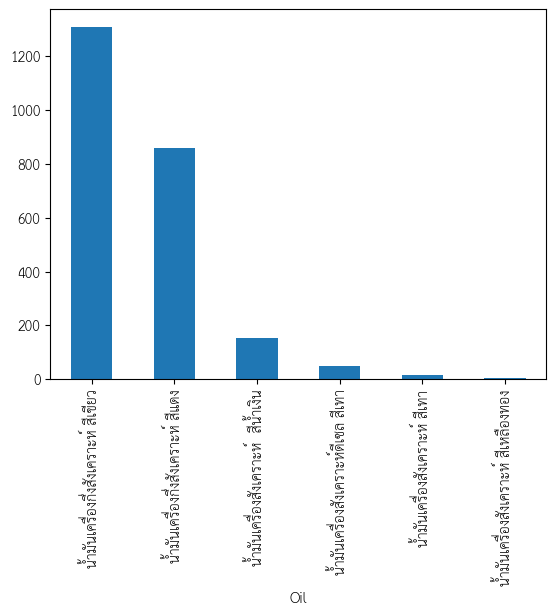

In [ ]:
customer_b2b.value_counts('Oil').plot(kind='bar');

In [ ]:
customer_b2b['Oil'].unique()

array(['น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว',
       'น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง',
       'น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน',
       'น้ำมันเครื่องสังเคราะห์ดีเซล สีเทา',
       'น้ำมันเครื่องสังเคราะห์ สีเทา',
       'น้ำมันเครื่องสังเคราะห์ สีเหลืองทอง'], dtype=object)

#รถรุ่นไหนบางและบริษัทไหนบางที่นิยมใช้น้ำมันสังเคราะห์ 100 %


In [ ]:
b2b_oil_blue = customer_b2b[(customer_b2b.Oil == 'น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน')]
b2b_oil_blue.head()

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,ชื่อ - นามสกุล,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
13,4/2/2023 16:19:31,GSJ22-00014,ศฐ 9999,จีจี ทรานสปอร์ต จำกัด,บริษัท,0869513326,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,Alphard,AYH30R,2018-06-07,NO,2022-01-04,10:00,เซ็คระยะ,Fleet,Credit,31173,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"2,826",NO,0,0,อนุมัติ,sbooncha,PM LABOR60K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"30,001-40,000"
84,4/5/2023 10:45:09,GSJ22-00087,9กฐ-3213,แคนเซอิ จำกัด,บริษัท,0818386426,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZWE211R,2019-10-15,NO,2022-01-08,14:00,เซ็คระยะ,Normal,Credit,139976,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"6,852",NO,0,0,อนุมัติ,pmungmon,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"
152,4/7/2023 14:56:52,GSJ22-00154,1กย-6727,เอซเคน สยาม จำกัด,บริษัท,021598010,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,ACV51R,2013-02-20,NO,2022-01-13,9:00,เซ็คระยะ,Fleet,Cash,146330,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"4,799",NO,0,0,อนุมัติ,rthasi,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
157,4/7/2023 16:20:16,GSJ22-00159,1กฮ-5001,โอ้ไอโอ จำกัด,บริษัท,0818156592,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จันทรเกษม,Alphard,ANH20R,2011-03-19,NO,2022-01-13,11:00,เซ็คระยะ,Fleet,Cash,137810,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"3,158",NO,0,0,อนุมัติ,nchaimag,FREE24,อัมรินทร์ ปานสวน,"90,001+"
201,4/10/2023 10:46:39,GSJ22-00205,กธ-5244,ฟาร์เธอร์ แอสฟัสท์ จำกัด,บริษัท,0819966220,ปราจีนบุรี,ภาคตะวันออก,ศรีมหาโพธิ,ท่าตูม,Fortuner,KUN61R,2012-02-20,NO,2022-01-17,9:00,งานซ่อมทั่วไป,Normal,Cash,462603,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"9,057",NO,0,0,อนุมัติ,ploecyr,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"


### บริษัทที่ใช่น้ำมันสังเคราะห์ 100% กับเรามากที่สุดคือ
- บริษัทกรุงเทพโทรทัศน์และวิทยุ จำกัด หรือช่อง 7 และ บริษัท ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด
- เป็นสิ่งที่ยื่นยันได้ว่า เขาเป็นลูกค้าชั้นดี
- (ส่วนลดที่ได้ให้กับบริษัทนี้ คือ ค่าแรง 15% ค่าอะไหล่ 15%) ดูที่ยอดเฉลี่ยใน 3 ปีก่อน ข้อมูลจากแผนกรับรถ สาขาพหลโยธิน


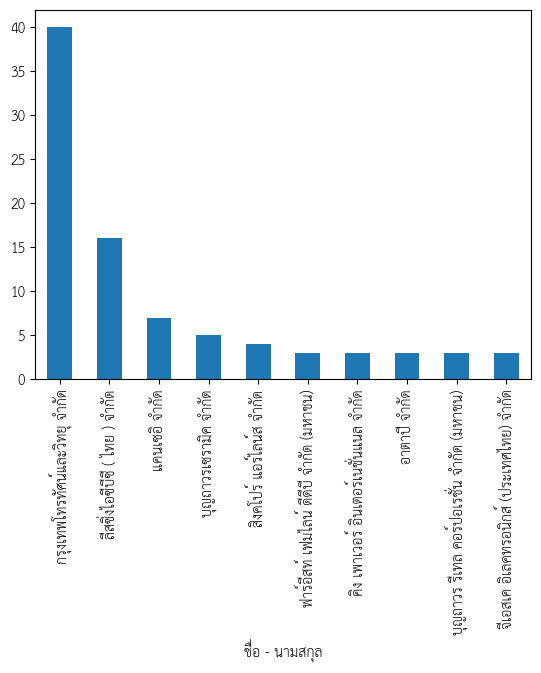

In [ ]:
b2b_oil_blue.value_counts('ชื่อ - นามสกุล').sort_values(ascending=False).head(10).plot(kind='bar');

In [ ]:
customer_b2b.rename(columns={'ชื่อ - นามสกุล':'name'}, inplace=True)

In [ ]:
ch7 = customer_b2b[customer_b2b.name == 'กรุงเทพโทรทัศน์และวิทยุ จำกัด']

In [ ]:
ICBC = customer_b2b[customer_b2b.name == 'ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด']

In [ ]:
ch7[ch7.Oil=='น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน']

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
615,5/2/2023 9:34:44,GSJ22-00630,3กฬ-9012,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE172R,2015-02-18,NO,2022-02-15,9:00,เซ็คระยะ,Normal,Credit,103656,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"12,024",NO,0,0,อนุมัติ,ploecyr,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"
616,5/2/2023 9:39:17,GSJ22-00631,3กฬ-9023,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE172R,2015-02-18,Electrical,2022-02-15,9:00,เซ็คระยะ,Normal,Credit,194207,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"5,810",แบตเตอรี่,"2,610",1,ไม่อนุมัติ,akhutkae,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"
694,5/11/2023 12:44:14,GSJ22-00712,4กฒ-9821,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,AVV50R,2016-01-10,NO,2022-02-22,8:00,งานซ่อมทั่วไป,Fleet,Credit,81932,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"7,225",NO,0,0,อนุมัติ,akhutkae,NO,อัมรินทร์ ปานสวน,"80,001-90,000"
1528,7/25/2023 10:14:16,GSJ22-01573,ฎฎ-9777,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,AVV50R,2016-01-10,NO,2022-04-29,10:00,งานซ่อมทั่วไป,Fleet,Credit,63027,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"50,167",NO,0,0,อนุมัติ,ploecyr,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"60,001-70,000"
1645,8/9/2023 10:14:30,GSJ22-01697,4กฒ-9821,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,AVV50R,2016-01-10,NO,2022-05-09,11:00,เซ็คระยะ,Fleet,Credit,85290,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"5,445",NO,0,0,อนุมัติ,rthasi,PM PART60-200K,อัมรินทร์ ปานสวน,"80,001-90,000"
1649,8/11/2023 8:59:42,GSJ22-01702,ฎส-164,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,AVV50R,2016-01-10,NO,2022-05-09,14:00,งานซ่อมทั่วไป,Fleet,Credit,118999,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"7,059",NO,0,0,อนุมัติ,nchaimag,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
1656,8/11/2023 10:56:08,GSJ22-01709,ฎม-779,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,AVV50R,2016-01-10,NO,2022-05-10,10:00,เซ็คระยะ,Fleet,Credit,137531,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"44,249",NO,0,0,อนุมัติ,nchaimag,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
1682,8/16/2023 10:44:10,GSJ22-01738,ฎส-164,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,AVV50R,2016-01-10,NO,2022-05-12,12:00,เซ็คระยะ,Fleet,Credit,125518,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"5,445",NO,0,0,อนุมัติ,akhutkae,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"
1707,8/21/2023 9:39:30,GSJ22-01764,4กฒ-9821,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,AVV50R,2016-01-10,NO,2022-05-13,14:00,งานซ่อมทั่วไป,Fleet,Credit,85468,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"10,493",NO,0,0,อนุมัติ,ksriwanp,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"80,001-90,000"
1867,9/18/2023 11:00:54,GSJ22-01929,4กฉ-7774,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,ASV51R,2016-11-19,Power train chassis,2022-05-26,14:00,เซ็คระยะ,Fleet,Credit,100969,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"12,474",ชุดโช๊คอัพหลัง,"11,716",6,ไม่อนุมัติ,akhutkae,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"


In [ ]:
ICBC[ICBC.Oil=='น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน']

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
205,4/10/2023 11:23:47,GSJ22-00209,1กภ-2595,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2013-01-22,NO,2022-01-17,10:00,งานซ่อมทั่วไป,Fleet,Credit,164187,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"7,732",NO,0,0,อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
1400,7/5/2023 9:48:19,GSJ22-01442,1กภ-2595,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2013-01-22,NO,2022-04-20,10:00,เซ็คระยะ,Fleet,Credit,169364,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"3,353",NO,0,0,อนุมัติ,rthasi,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
1473,7/12/2023 10:13:56,GSJ22-01516,ฆธ-7072,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2012-07-12,"Enging, Power train chassis",2022-04-25,14:00,เซ็คระยะ,Fleet,Credit,150114,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"3,539",ประเก็นฝาครอบวาล์ว|ผ้าเบครหลัง,"2,075",2,ไม่อนุมัติ,ploecyr,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"
1658,8/11/2023 11:13:35,GSJ22-01711,ฆน-9125,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2012-07-20,Power train chassis,2022-05-10,14:00,งานซ่อมทั่วไป,Fleet,Credit,266642,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"28,832",ชุดยางหุ้มเพลาขับหน้าซ้ายขวา|ชุดลูกหมายกันโครง...,"10,486",6,ไม่อนุมัติ,rthasi,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
2293,11/4/2023 10:33:25,GSJ22-02364,ฆธ-5856,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2012-08-10,NO,2022-06-24,9:00,เซ็คระยะ,Fleet,Credit,187739,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"7,417",NO,0,0,อนุมัติ,nchaimag,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
2387,11/15/2023 9:14:08,GSJ22-02447,ฆธ-7072,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2012-07-12,NO,2022-06-27,14:00,งานซ่อมทั่วไป,Fleet,Credit,151811,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"3,540",NO,0,0,อนุมัติ,ploecyr,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
2456,11/21/2023 10:09:53,GSJ22-02518,3กข-7019,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ASV50R,2014-05-16,"Enging, Power train chassis",2022-07-01,10:00,เซ็คระยะ,Fleet,Credit,180162,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"6,941",ชุดยางแท่นเครื่อง|ตัวดันสายพานเครื่อง,"22,694",5,ไม่อนุมัติ,akhutkae,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
2489,11/23/2023 10:01:20,GSJ22-02551,2กข-5836,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2013-04-19,"Enging,Power train chassis",2022-07-04,10:00,เซ็คระยะ,Fleet,Credit,159791,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"9,377",ประเก็นฝาครอบวาล์ว|ชุดยางแท่นเครื่อง|ผ้าเบครหน...,"50,707",20,ไม่อนุมัติ,pmungmon,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"
3547,4/8/2024 9:39:02,GSJ22-03638,ฆน-9125,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2012-07-20,Power train chassis,2022-09-22,10:00,เซ็คระยะ,Fleet,Credit,274743,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"7,247",ชุดยางหุ้มเพลาขับหน้า|ชุดลูกหมากกันโครงหน้า,"10,486",6,ไม่อนุมัติ,akhutkae,ACCEPTSMS,อัมรินทร์ ปานสวน,"90,001+"
4092,6/3/2024 9:23:49,GSJ22-04219,1กภ-2595,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2013-01-22,NO,2022-10-31,16:00,งานซ่อมทั่วไป,Fleet,Credit,181979,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"11,130",NO,0,0,อนุมัติ,ploecyr,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"


In [ ]:
Top_customers_b2b = pd.concat([ch7,ICBC])
Top_customers_b2b

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
11,4/2/2023 16:03:01,GSJ22-00012,ฆท-1610,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Fortuner,KUN61R,2012-05-28,NO,2022-01-04,9:00,งานซ่อมทั่วไป,Fleet,Credit,317130,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"10,718",NO,0,0,อนุมัติ,ploecyr,NO,อัมรินทร์ ปานสวน,"90,001+"
18,4/2/2023 17:32:32,GSJ22-00019,ฆท-1614,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Fortuner,KUN61R,2012-05-22,NO,2022-01-04,12:00,เซ็คระยะ,Fleet,Credit,253040,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"9,479",NO,0,0,อนุมัติ,sbooncha,NO,อัมรินทร์ ปานสวน,"90,001+"
73,4/4/2023 16:13:21,GSJ22-00075,ฆท-1615,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Fortuner,KUN61R,2012-06-15,NO,2022-01-07,14:00,งานซ่อมทั่วไป,Fleet,Credit,287740,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"13,442",NO,0,0,อนุมัติ,rthasi,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
161,4/7/2023 16:50:15,GSJ22-00163,ฆท-1614,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Fortuner,KUN61R,2012-05-22,NO,2022-01-13,14:00,งานซ่อมทั่วไป,Fleet,Credit,253050,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,449,NO,0,0,อนุมัติ,ploecyr,NO,อัมรินทร์ ปานสวน,"90,001+"
185,4/9/2023 11:14:54,GSJ22-00190,1กฮ-7778,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE172R,2014-08-23,NO,2022-01-15,11:00,งานซ่อมทั่วไป,Normal,Credit,120372,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,585",NO,0,0,อนุมัติ,akhutkae,NO,อัมรินทร์ ปานสวน,"90,001+"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,6/20/2024 9:29:45,GSJ22-04444,1กม-2592,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2013-01-22,NO,2022-11-15,9:00,งานซ่อมทั่วไป,Fleet,Credit,189786,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"19,508",NO,0,0,อนุมัติ,pmungmon,FREE60ITEMCHECK,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
4348,6/22/2024 9:30:33,GSJ22-04477,1กม-2592,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2013-01-22,NO,2022-11-17,9:00,งานซ่อมทั่วไป,Fleet,Credit,189853,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"7,624",NO,0,0,อนุมัติ,ploecyr,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
4440,6/28/2024 9:26:37,GSJ22-04570,ฆธ-9523,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2012-07-19,NO,2022-11-22,10:00,งานซ่อมทั่วไป,Fleet,Credit,284894,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"28,008",NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
4565,7/6/2024 9:46:15,GSJ22-04697,3กข-7019,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ASV50R,2014-05-16,NO,2022-12-01,10:00,เซ็คระยะ,Fleet,Credit,191706,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"4,411",NO,0,0,อนุมัติ,sbooncha,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"


In [ ]:
ch7[ch7.Oil=='น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว']

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
185,4/9/2023 11:14:54,GSJ22-00190,1กฮ-7778,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE172R,2014-08-23,NO,2022-01-15,11:00,งานซ่อมทั่วไป,Normal,Credit,120372,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,585",NO,0,0,อนุมัติ,akhutkae,NO,อัมรินทร์ ปานสวน,"90,001+"
339,4/19/2023 12:55:16,GSJ22-00350,4กช-7774,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,ASV51R,2016-11-19,NO,2022-01-26,10:00,เซ็คระยะ,Fleet,Credit,102507,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"10,191",NO,0,0,อนุมัติ,nchaimag,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
419,4/23/2023 8:43:29,GSJ22-00431,ฆท-1603,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE142R,2012-05-21,NO,2022-02-01,9:00,งานซ่อมทั่วไป,Fleet,Warranty,175076,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,50,NO,0,0,อนุมัติ,nchaimag,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
1765,9/1/2023 10:41:12,GSJ22-01823,4กช-7774,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Camry,ASV51R,2016-11-19,NO,2022-05-18,14:00,งานซ่อมทั่วไป,Fleet,Credit,108138,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"7,288",NO,0,0,อนุมัติ,ksriwanp,NO,อัมรินทร์ ปานสวน,"90,001+"
1793,9/7/2023 10:41:35,GSJ22-01851,ญข-8760,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE142R,2010-11-30,NO,2022-05-20,11:00,งานซ่อมทั่วไป,Fleet,Credit,147590,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"23,711",NO,0,0,อนุมัติ,nchaimag,NO,อัมรินทร์ ปานสวน,"90,001+"
2015,10/5/2023 9:34:01,GSJ22-02082,ญผ-2716,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE142R,2011-06-06,NO,2022-06-06,9:00,งานซ่อมทั่วไป,Fleet,Credit,123605,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,463,NO,0,0,อนุมัติ,pmungmon,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
2329,11/9/2023 9:01:50,GSJ22-02400,ญข-8757,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE142R,2010-11-30,NO,2022-06-25,9:00,เซ็คระยะ,Fleet,Credit,142632,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"8,178",NO,0,0,อนุมัติ,ksriwanp,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"
2331,11/9/2023 9:15:16,GSJ22-02402,ญข-8755,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE142R,2010-11-30,NO,2022-06-25,9:00,เซ็คระยะ,Fleet,Credit,208198,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"4,471",NO,0,0,อนุมัติ,sbooncha,NO,อัมรินทร์ ปานสวน,"90,001+"
2338,11/9/2023 9:55:30,GSJ22-02409,ญข-8760,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE142R,2010-10-30,NO,2022-06-25,10:00,เซ็คระยะ,Fleet,Credit,147600,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"4,122",NO,0,0,อนุมัติ,ksriwanp,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"
2340,11/9/2023 10:17:15,GSJ22-02411,ญผ-2716,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZRE142R,2011-06-06,NO,2022-06-25,10:00,เซ็คระยะ,Fleet,Credit,124300,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"4,246",NO,0,0,อนุมัติ,ksriwanp,PM PART60-200K,อัมรินทร์ ปานสวน,"90,001+"


In [ ]:
ICBC[ICBC.Oil=='น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว']

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
216,4/11/2023 9:24:58,GSJ22-00222,1กธ-2289,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2013-01-16,NO,2022-01-18,10:00,เซ็คระยะ,Fleet,Credit,117079,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"9,628",NO,0,0,อนุมัติ,ploecyr,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
2063,10/7/2023 11:24:07,GSJ22-02131,1กธ-2289,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ACV51R,2013-01-16,NO,2022-06-08,10:00,เซ็คระยะ,Normal,Credit,127962,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"17,835",NO,0,0,อนุมัติ,pmungmon,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
2088,10/10/2023 10:44:49,GSJ22-02157,ฆธ-8158,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,บริษัท,0898141551,กรุงเทพมหานคร,ภาคกลาง,ปทุมวัน,ลุมพินี,Camry,ASV50R,2012-08-04,NO,2022-06-09,15:00,เซ็คระยะ,Fleet,Credit,155190,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"3,996",NO,0,0,อนุมัติ,akhutkae,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"


## ลูกค้าประเภทบริษัทที่เข้ามาใช้บริการกับ บริษัทโตโยต้า มหานคร มียอดรวมการเสนอรายการอะไหล่เท่าไร
- 40,37576 บาท

In [ ]:
Offer_part_b2b = customer_b2b[['name','รุ่นรถ','ปัญหาของรถ','อะไหล่เสนอเพิ่มเติม','ยอดเสนออะไหล่เพิ่มเติม','list_no','สถานะ ','ช่างผู้ทำการเสนอ']]

In [ ]:
Offer_part_b2b.rename(columns={'สถานะ ':'status'}, inplace=True)

In [ ]:
Offer_part_b2b = Offer_part_b2b[Offer_part_b2b.status == 'ไม่อนุมัติ']

In [ ]:
Offer_part_b2b

,name,รุ่นรถ,ปัญหาของรถ,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ
50,เออีซี เฮลธ์แคร์ จำกัด,Hilux Revo,"Electrical,Power train chassis",คอมแอร์|ชุดคลัทช์|ชุดตู้แอร์,"30,630",22,ไม่อนุมัติ,nchaimag
71,กิบไทย จำกัด,Hilux Revo,Power train chassis,ชุดคลัทช์,"20,278",14,ไม่อนุมัติ,rthasi
110,เมซโซ่ จำกัด,Hiace,Power train chassis,ชุดคลัทช์|ชุดลูกหมากแร็คนอกใน,"36,399",20,ไม่อนุมัติ,rthasi
162,เอสเอสยูที จำกัด,Fortuner,"Power train chassis, Electrical",แบตเตอรี่|ยางรถยนต์,"31,288",3,ไม่อนุมัติ,pmungmon
197,ศุภาพิชญ์ สุวรรณาภิรมย์,Yaris ATIV,Electrical,แบตเตอรี่,"2,610",1,ไม่อนุมัติ,nchaimag
...,...,...,...,...,...,...,...,...
4910,เอสเอสยูที จำกัด,Commuter,Power train chassis,ผ้าเบครหน้า,"2,910",1,ไม่อนุมัติ,pmungmon
4930,เจมส์แกลอรี่อินเตอร์เนชั่นแนลแมนูแฟคเจอเร่อ จำกัด,Hiace,Enging,หม้อน้ำ,"29,585",1,ไม่อนุมัติ,pmungmon
4965,พรีซีสชั่น เอนยีเนียริ่ง จำกัด,Hilux Vigo,"Power train chassis, Electrical",แบตเตอรี่|ชุดยางหูแหนบหลัง|ชุดปีกนกบน|ชุดปีกนก...,"29,320",6,ไม่อนุมัติ,jpetchab
4967,โอ้ไอโอ จำกัด,Alphard,"Power train chassis, Electrical",สวิทช์ปรับเลนส์กระจกมองข้าง|คอพวงมาลัย|แร็คพวง...,"91,602",5,ไม่อนุมัติ,jpetchab


In [ ]:
Offer_part_b2b.ปัญหาของรถ.unique()

array(['Electrical,Power train chassis', 'Power train chassis',
       'Power train chassis, Electrical', 'Electrical',
       'Enging, Power train chassis, Electrical',
       'Enging, Power train chassis', 'Body', 'Enging, Electrical',
       'Enging', 'Enging,Power train chassis',
       'Power train chassis, Body', 'Enging, Power train chassis, Body',
       'Enging, Body'], dtype=object)

In [ ]:
Offer_part_b2b.pivot_table(index=['ปัญหาของรถ'],values='ยอดเสนออะไหล่เพิ่มเติม',aggfunc=['count','sum'],margins=True).round(2)

,count,sum
,ยอดเสนออะไหล่เพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม
ปัญหาของรถ,,
Body,5,"30,724"
Electrical,45,"725,433"
"Electrical,Power train chassis",1,"30,630"
Enging,14,"262,161"
"Enging, Body",1,"6,105"
"Enging, Electrical",6,"171,903"
"Enging, Power train chassis",16,"619,108"
"Enging, Power train chassis, Body",1,"35,237"


## ข้อมูลปัญหารถที่ลูกค้าบริษัทพบเจอมากที่สุด ในปี 2022
1.ช่วงล่าง\
2.ระบบไฟฟ้า\
3.เครื่องยนต์ และ ช่วงล่าง\
4.เครื่องยนต์
### หมายเหตุ
- การเสนออะไหล่เพิ่มเติมนั้นมีปัจจัยหลายๆอย่างที่เป็นปัญหา อาจจะทำให้เสียรายได้
1.การสต็อกอะไหล่ของดิลเลอร์ และ โรงงาน\
2.การผลิตอะไหล่ของโรงงานมักจะมีสินค้าขาดตลาดเสมอ\
3.การผลิตอะไหล่ที่เป็นของเทียบเลียนแบบของต่างฮีห้อ\
4.ปัจจัยทางเศรษฐกิจ\
5.ช่างวิเคราะห์งานผิด\
ุ6.อะไหล่สั่งผิด\
7.ลูกค้าไม่ต้องการรอของ\
8.รถอะไหล่มาผิดเวลา\
9.ลูกค้าไม่ได้มีอำนาจในการตัดสินใจคนเดียว\
10.และอื่นๆ เช่น ลูกค้าต้องการอะไหล่มือ2
## อะไหล้ที่ถูกเสนอมากที่สุด
1.แบตเตอรี่
- ขอสังเกตุอะไหล่ที่ถูกเสนอเป็นอะไหล่ช่วงล่างของรถเกือบทั้งหมด

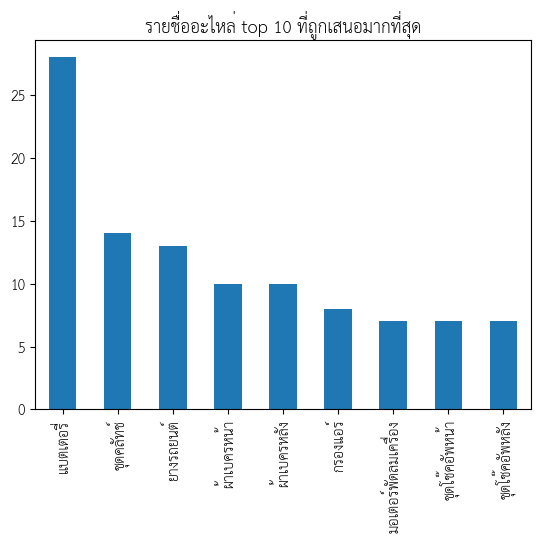

In [ ]:
recommend_parts_to_repair_b2b = customer_b2b['อะไหล่เสนอเพิ่มเติม'].str.get_dummies(sep='|')
recommend_parts_to_repair_b2b.sum().sort_values(ascending=False)[1:10].plot(kind='bar',x='จำนวน',y='อะไหล่',
                                                                            title='รายชื่ออะไหล่ top 10 ที่ถูกเสนอมากที่สุด');

##ยอดรวมของแต่ละหมวดของปัญหา
- Power train chassis = 1526263
- Electrical = 725433
- Enging, Power train chassis = 619108
- Power train chassis, Electrical = 293993
- Enging = 268153
---
## เราจะมาหาว่าเราสามารถสร้างยอดขายเพิ่มเติมได้อย่างไร?
- ก่อนอื่นเราต้องทำความเข้าใจก่อนว่าการซ่อมรถ ต้องใช้เวลาในการตรวจสอบ
- อะไหล่บางตัวเปลี่ยนง่าย ใช้เวลาน้อย
- อะไหล่บางตัวเปลี่ยนยาก ใช่เวลามาก
- การเปลี่ยนอะไหล่บางครั้งมีผลกระทบกับอีกส่วนของรถ เช่น การเปลี่ยนวาล์วน้ำ ต้องเปลี่ยนโอริง วาล์วน้ำด้วย
- ดังนั้นการที่เราต้องการได้ยอดขายเพิ่ม อะไหล่ที่ใช้เวลาน้อยเปลี่ยนง่ายต้องรีบทำการดำเนินการที่เร็วที่สุด
---
ในหมวด Enging หรือ เครื่องยนต์
- ส่วนใหญ่จะเป็นอะไหล่ที่ต้องใช้เวลาเปลี่ยน
- แต่มีอะไหล่ เช่น หัวเทียน มอเตอร์พัดลมเครื่อง มอเตอร์พัดลมแอร์ ลูกปืนไดชาร์จ
- ที่สามารถเปลี่ยนได้เร็วและใช้เวลาไม่นาน
### หมายเหตุ
- ลูกค้าประเภทบริษัท มักจะไม่ค่อยอนุมัติรายการเสนออะไหล่เพิ่มเติมอยู่แล้ว
- เนื่องจาก อาจจะมีอู่นอกให้ใช้บริการ
- หรือต้องการจะขายรถอยู่แล้วเลยไม่ค่อยอนุมัติในส่วนอะไหล่เพิ่มเติม
- ในส่วนนี้เราไม่สามารถที่จะทำอะไรได้ เนื่องจากลูกค้าบริษัทมีการจำกัดงบในการซ่อมรถ
---
- ราคาอะไหล่มีผลต่อการตัดสินใจของลูกค้า ถ้าแพงลูกค้าอาจจะไปหาข้างนอกก่อน
- เนื่องจากลูกค้าประเภทบริษัท ทางศูนย์บริการมีการลดราคาอะไหล่และค่าแรงอยู่ประมาณ 15 - 20 % อยู่แล้ว
- ดังนั้นเราจะไม่เสนอลดราคาเพิ่มอีก

In [ ]:
Offer_part_b2b.groupby('ปัญหาของรถ')['ยอดเสนออะไหล่เพิ่มเติม'].agg(['count','sum']).nlargest(10,columns='sum').round(2)

,count,sum
ปัญหาของรถ,,
Power train chassis,50,"1,526,263"
Electrical,45,"725,433"
"Enging, Power train chassis",16,"619,108"
"Power train chassis, Electrical",10,"293,993"
Enging,14,"262,161"
"Enging, Power train chassis, Electrical",7,"173,799"
"Enging, Electrical",6,"171,903"
"Enging,Power train chassis",2,"99,680"
"Power train chassis, Body",2,"62,540"


In [ ]:
part_b2b_Enging = Offer_part_b2b[Offer_part_b2b.ปัญหาของรถ == 'Enging']
part_b2b_Enging.sort_values(by='ยอดเสนออะไหล่เพิ่มเติม',ascending=False)

,name,รุ่นรถ,ปัญหาของรถ,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ
1856,แล็บ ลีดเดอร์ จำกัด,Hilux Vigo,Enging,ลูกเทอร์โบ,"58,529",1,ไม่อนุมัติ,jpetchab
1752,ปตท.จำกัด (มหาชน),Camry,Enging,มอเตอร์พัดลมเครื่อง|มอเตอร์พัดลมแอร์,"37,878",1,ไม่อนุมัติ,ksriwanp
2602,คิง เพาเวอร์ คอร์ปอเรชั่น จำกัด,Hiace,Enging,หม้อน้ำ|ท่อยางน้ำบน|ท่อยางน้ำล่าง,"34,314",5,ไม่อนุมัติ,nchaimag
4930,เจมส์แกลอรี่อินเตอร์เนชั่นแนลแมนูแฟคเจอเร่อ จำกัด,Hiace,Enging,หม้อน้ำ,"29,585",1,ไม่อนุมัติ,pmungmon
3821,เดอะบัส ทรานสปอร์ต จำกัด,Hiace,Enging,ปั้มน้ํำ|ลูกรอกหน้าเครื่อง|คอยล์จุดระเบิด,"24,759",4,ไม่อนุมัติ,jpetchab
2157,จีจี ทรานสปอร์ต จำกัด,Hiace,Enging,มอเตอร์พัดลมเครื่อง|มอเตอร์พัดลมแอร์,"19,634",2,ไม่อนุมัติ,jpetchab
4373,จีจี ทรานสปอร์ต จำกัด,Hiace,Enging,มอเตอร์พัดลมเครื่อง|มอเตอร์พัดลมแอร์,"19,634",2,ไม่อนุมัติ,nchaimag
2680,พีพีทีซี จำกัด,Commuter,Enging,ชุดลูกลอกหน้าเครื่อง,"13,995",3,ไม่อนุมัติ,nchaimag
1552,ปลื้มดี จำกัด,Fortuner,Enging,แอร์โฟร์|กระป๋องสูญกาศ|ท่อยาง|ท่อร่วมไอดี,"10,111",5,ไม่อนุมัติ,ksriwanp
1336,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,Camry,Enging,มอเตอร์พัดลมเครื่อง,"7,276",1,ไม่อนุมัติ,jpetchab


In [ ]:
recommend_partsEnging_to_repair_b2b = part_b2b_Enging['อะไหล่เสนอเพิ่มเติม'].str.get_dummies(sep='|')

In [ ]:
recommend_partsEnging_to_repair_b2b

,กระป๋องสูญกาศ,คอยล์จุดระเบิด,ชุดประเก็นEGR,ชุดลูกลอกหน้าเครื่อง,ตัวดันสายพานเครื่อง,ท่อยาง,ท่อยางน้ำบน,ท่อยางน้ำล่าง,ท่อร่วมไอดี,ประเก็นฝาครอบวาล์ว,ปั้มน้ํำ,มอเตอร์พัดลมเครื่อง,มอเตอร์พัดลมแอร์,ลูกปืนไดชาร์จ,ลูกรอกหน้าเครื่อง,ลูกเทอร์โบ,หม้อน้ำ,หัวเทียน,แอร์โฟร์
1333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1336,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1552,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1748,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1752,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2157,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2424,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2506,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2602,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0


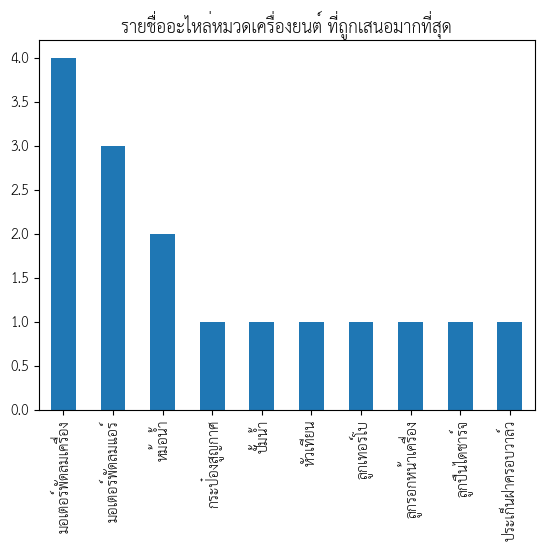

In [ ]:
recommend_partsEnging_to_repair_b2b.sum().sort_values(ascending=False)[0:10].plot(kind='bar',x='จำนวน',y='อะไหล่',
                                                                            title='รายชื่ออะไหล่หมวดเครื่องยนต์ ที่ถูกเสนอมากที่สุด');

## วิเคราะห์พบว่าในหมวด Enging
- อะไหล่มอเตอร์พัดลมเครื่อง และ มอเตอร์พัดลมแอร์เป็นอะไหล่ที่ถูกเสนอมากที่สุด ในหมวดเครื่องยนต์
- ในฐานนะที่ผู้วิเคราะห์มีความรู้เรื่องของรถยนต์และเรื่องของอะไหล่
- แนะนำว่าควรมีนโยบายมัดจำลูกค้าที่ต้องทำอย่างเป็นระบบ
- เพื่อป้องกันการสั่งอะไหล่แล้วลูกค้าไม่เอา (กรณีที่ลูกค้าสั่งของ)
## ข้อสังเกตุ
- อะไหล่มอเตอร์พัดลมเครื่องและมอเตอร์พัดลมแอร์
- เป็นของรุ่นรถ Camry Hiace
- ราคาของ 2 รุ่นนี้ค่อนข้างสูง
- บางทีนี้อาจจะเป็นสาเหตุที่ลูกค้าไม่เปลี่ยนอะไหล่กับเรา
## หมายเหตุ
- เนื่องจากกลุ่มลูกค้าประเภทบริษัทที่ได้รับส่วนลดอยู่แล้ว
- ดังนั้นผู้วิเคราะห์เห็นว่าไม่ควรให้ส่วนลดเพิ่มเติมแล้ว
-_ขึ้นอยู่กับผู้บริหารตัดสินใจอีกครั้ง_


In [ ]:
part_b2b_Power_train_chassis = Offer_part_b2b[Offer_part_b2b.ปัญหาของรถ == 'Power train chassis']
part_b2b_Power_train_chassis.sort_values(by='ยอดเสนออะไหล่เพิ่มเติม',ascending=False)

,name,รุ่นรถ,ปัญหาของรถ,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ
597,เค. เพลส อพาร์ทเม้นท์,Altis,Power train chassis,แอ็คคูเอเตอร์ ABS,"111,708",1,ไม่อนุมัติ,akhutkae
4639,ลีสซิ่งไอซีบีซี ( ไทย ) จำกัด,Camry,Power train chassis,ยอยพวงมาลัย|ชุดโช๊คอัพหน้า|ชุดลูกหมากกันโครงหน...,"98,074",26,ไม่อนุมัติ,nchaimag
1201,"DISC0 HI-TEC (THAILAND) CO., LTD",Camry,Power train chassis,แร็คพวงมาลัย|มอเตอร์แกนพวงมาลัย,"91,217",3,ไม่อนุมัติ,ploecyr
1567,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,Commuter,Power train chassis,แอ็คคูเอเตอร์ ABS,"82,871",1,ไม่อนุมัติ,rthasi
2914,กองบังคับการปราบปรามการค้ามนุษย์,Commuter,Power train chassis,ชุดลูกหมากกันโครงหน้า|ชุดลูกยางกันโครงหน้า|ชุด...,"71,345",21,ไม่อนุมัติ,pmungmon
2569,เมซโซ่ จำกัด,Hiace,Power train chassis,ชุดโช๊คอัพหน้าหลัง|ชุดปีกนกตัวบนหน้า|ชุดลูกปืน...,"65,558",7,ไม่อนุมัติ,nchaimag
360,บุญถาวรเซรามิค จำกัด,Commuter,Power train chassis,ชุดโช๊คอัพหน้าหลัง|ชุดลูกหมากแร็กพวงมาลัยนอกใน...,"64,090",16,ไม่อนุมัติ,nchaimag
2457,เอ็มดี คอนซูเมอร์ แอพพลายแอนซ์ (ประเทศไทย) จำกัด,Alphard,Power train chassis,ผ้าเบครหลัง|ชุดยางหุ้มเพลาขับ|ชุดโช๊คอัพหน้า|ย...,"61,225",14,ไม่อนุมัติ,jpetchab
3575,วินเนอร์ยี่ เมดิคอล จำกัด (มหาชน),Prius,Power train chassis,แร็คพวงมาลัย|ยอยพวงมาลัย|ชุดปีกนก,"60,936",5,ไม่อนุมัติ,pmungmon
973,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,Altis,Power train chassis,แอ็คคูเอเตอร์ ABS,"56,870",1,ไม่อนุมัติ,sbooncha


## วิเคราะห์พบว่าในหมวด Power train chassis
- ยางรถยนต์เป็นอะไหล่ที่ถูกเสนอมากที่สุด
## ข้อสังเกตุ
- ราคาอะไหล่ที่เสนอนั้นค่อนข้างจะสูง
- ถ้าเราสามารถขายอะไหล่เช่น ยางรถยนต์ได้ ชุดคลัทช์ได้เยอะ จะเป็นการเพิ่มยอดขายได้มากขึ้น
- อะไหล่ เช่นผ้าเบครหน้า ผ้าเบครหลัง ควรสต๊อกไว้ก่อน เพราะเป็นอะไหล่ที่รถทุกคันต้องเสนอเปลี่ยนอยู่แล้ว

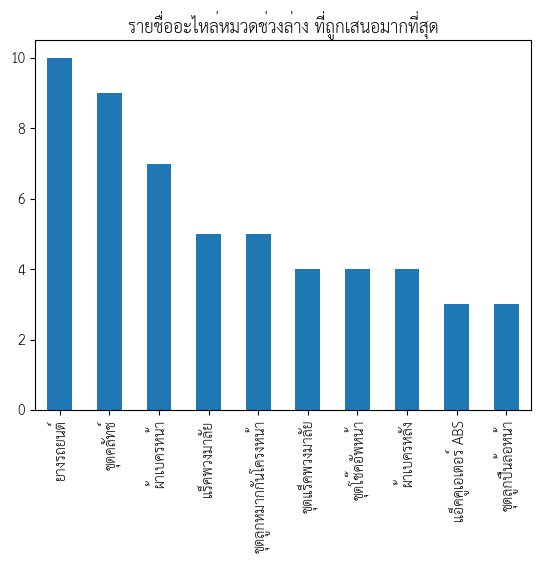

In [ ]:
recommend_parts_Power_train_chassis_to_repair_b2b = part_b2b_Power_train_chassis['อะไหล่เสนอเพิ่มเติม'].str.get_dummies(sep='|')
recommend_parts_Power_train_chassis_to_repair_b2b.sum().sort_values(ascending=False)[0:10].plot(kind='bar',x='จำนวน',y='อะไหล่',
                                                                            title='รายชื่ออะไหล่หมวดช่วงล่าง ที่ถูกเสนอมากที่สุด');

In [ ]:
part_b2b_Electrical = Offer_part_b2b[Offer_part_b2b.ปัญหาของรถ == 'Electrical']
part_b2b_Electrical.sort_values(by='ยอดเสนออะไหล่เพิ่มเติม',ascending=False)

,name,รุ่นรถ,ปัญหาของรถ,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ
1854,อินเตอร์เนชั่นแนลเมตัลอินดัสตรี จำกัด,Camry,Electrical,แบตเตอรี่|คอมแอร์,"103,148",2,ไม่อนุมัติ,jpetchab
4140,เมซโซ่ จำกัด,Hiace,Electrical,ชุดตู้แอร์|คอนเดนเซอร์|คอมแอร์,"89,783",7,ไม่อนุมัติ,ploecyr
2426,เอ็นทีเอ็น เทรดดิ้ง-ประเทศไทย จำกัด,Camry,Electrical,แบตเตอรี่ไฮบริด,"89,773",1,ไม่อนุมัติ,akhutkae
2492,ไทยฟู้ดส์ กรุ๊ป จำกัด (มหาชน),Camry,Electrical,แบตเตอรี่ไฮบริด,"85,493",1,ไม่อนุมัติ,ploecyr
1043,เมซโซ่ จำกัด,Hiace,Electrical,ปุ่มปรับสวิทย์พัดลมแอร์|ชุดควบคุมระบบปรับอากาศ...,"44,755",17,ไม่อนุมัติ,akhutkae
1945,อิตาเลียนไทย ดีเวล๊อปเมนต์ จำกัด (มหาชน),Commuter,Electrical,ชุดตู้แอร์หน้า|ตู้แอร์หลัง,"43,367",12,ไม่อนุมัติ,rthasi
3647,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,Camry,Electrical,ชุดสายไฟเกียร์|ข้อต่อสายไฟ,"27,678",2,ไม่อนุมัติ,rthasi
1755,ซูมิโตโม มิตซุย ออโต้ ลิสซิ่ง แอนด์ เซอร์วิส (...,Alphard,Electrical,แบตเตอรี่,"27,317",1,ไม่อนุมัติ,akhutkae
4529,ซูมิโตโม มิตซุย ออโต้ ลิสซิ่ง แอนด์ เซอร์วิส (...,Alphard,Electrical,แบตเตอรี่,"27,317",1,ไม่อนุมัติ,jpetchab
856,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,Hilux Revo,Electrical,สายไฟ ABS,"16,627",4,ไม่อนุมัติ,ploecyr


## วิเคราะห์พบว่าในหมวดไฟฟ้า
- พบว่าแบตเตอรี่มีการเสนอมากที่สุด
## ข้อสังเกตุ
- แบตเตอรี่ส่วนใหญ่จะเป็นของรุ่นรถที่ค่อนข้างแพง
- เช่น Camry Hybrid,Prius Hybrid,Alphard Hybrid
## ปัญหาที่พบเจอในการขาย
- โรงงานไม่มีของ
- ราคาแพงสั่งของนาน
- ลูกค้าส่วนใหญ่ถ้ารู้ว่าแบตเตอรี่ hybrid จะหมดอายุประกัน 10 มักจะทำการขายรถออกไปก่อน
- เพื่อป้องกันการจ่ายค่าซ้อมหนัก

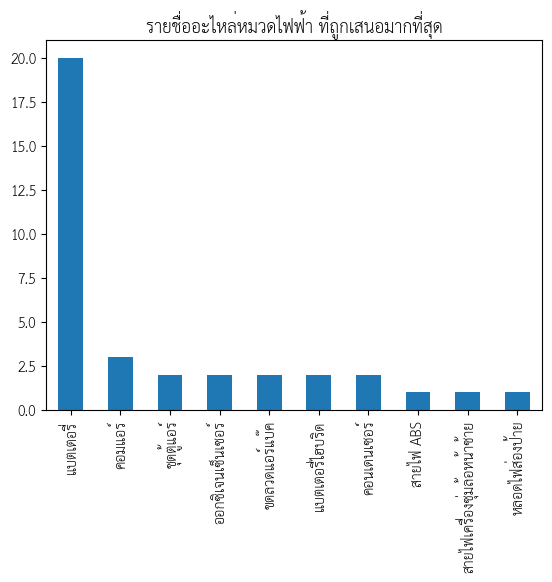

In [ ]:
recommend_parts_Electrical_to_repair_b2b = part_b2b_Electrical['อะไหล่เสนอเพิ่มเติม'].str.get_dummies(sep='|')
recommend_parts_Electrical_to_repair_b2b.sum().sort_values(ascending=False)[0:10].plot(kind='bar',x='จำนวน',y='อะไหล่',
                                                                            title='รายชื่ออะไหล่หมวดไฟฟ้า ที่ถูกเสนอมากที่สุด');

## รุ่นรถที่พลาดการขายในหมวดไฟฟ้ามากที่สุด
- Altis
- Camry
- Hilux Revo
- Hilux Vigo

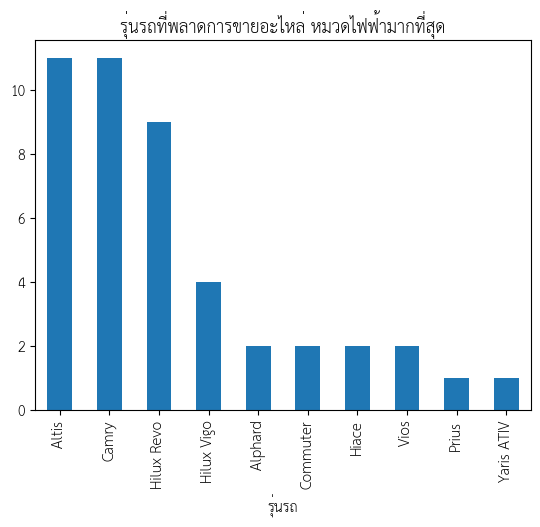

In [ ]:
part_b2b_Electrical.value_counts('รุ่นรถ').sort_values(ascending=False).head(10).plot(kind='bar',title='รุ่นรถที่พลาดการขายอะไหล่ หมวดไฟฟ้ามากที่สุด');

In [ ]:
customer_b2b.describe().round(2)

,ระยะทางวันเข้าซ่อม,ค่าใช่จ่าย,ยอดเสนออะไหล่เพิ่มเติม,list_no
count,"2,389","2,389","2,389","2,389"
mean,"109,331","5,366","1,699",0
std,"97,481","9,385","9,367",2
min,23,1,0,0
25%,"39,867","1,515",0,0
50%,"81,475","2,725",0,0
75%,"142,899","5,780",0,0
max,"670,315","189,540","122,244",26


## พนักงานรับรถคนไหนที่ทำยอดกับลูกค้าประเภทบริษัทและได้ยอดมากที่สุดในปี 2022
- พนักงานชื่อดำรงศักดิ์ สิทธิสิริสัมพันธ์
- ทำยอดขายให้ศูนย์บริการ TM 1 ไป 74,96407 บาท
- จากลูกค้าประเภทบริษัทเครดิต

In [ ]:
customer_b2b.groupby('พนักงานผู้ให้บริการ')['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False).round(2)

,count,sum,median,mean
พนักงานผู้ให้บริการ,,,,
ดำรงศักดิ์ สิทธิสิริสัมพันธ์,1375,"7,496,407","2,707","5,452"
อัมรินทร์ ปานสวน,952,"4,905,459","2,795","5,153"
วิชิต โพธิแสง,62,"417,651","2,776","6,736"


In [ ]:
SA_Amarin = customer_b2b[(customer_b2b.พนักงานผู้ให้บริการ == 'อัมรินทร์ ปานสวน')]
SA_Amarin.head()

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
10,4/2/2023 15:55:13,GSJ22-00011,2ขฉ-4872,ไทยโอริกซ์สิสซิ่ง จำกัด,บริษัท,0912693996,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จตุจักร,Altis,ZRE210R,2021-06-21,NO,2022-01-04,8:00,เซ็คระยะ,Normal,Cash,10633,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,531",NO,0,0,อนุมัติ,ploecyr,FSC001,อัมรินทร์ ปานสวน,"10,000-20,000"
11,4/2/2023 16:03:01,GSJ22-00012,ฆท-1610,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Fortuner,KUN61R,2012-05-28,NO,2022-01-04,9:00,งานซ่อมทั่วไป,Fleet,Credit,317130,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"10,718",NO,0,0,อนุมัติ,ploecyr,NO,อัมรินทร์ ปานสวน,"90,001+"
12,4/2/2023 16:12:17,GSJ22-00013,ฆฎ-5321,เอ็มทีเอ็ม เทรดดิ่ง ประเทศไทย จำกัด,บริษัท,0816149675,ขอนแก่น,ภาคตะวันออกเฉียงเหนือ,เมืองขอนแก่น,สำราญ,Camry,AHV40R,2012-03-13,NO,2022-01-04,10:00,เซ็คระยะ,Normal,Cash,87957,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"5,400",NO,0,0,อนุมัติ,ploecyr,PM PART60-200K,อัมรินทร์ ปานสวน,"80,001-90,000"
18,4/2/2023 17:32:32,GSJ22-00019,ฆท-1614,กรุงเทพโทรทัศน์และวิทยุ จำกัด,บริษัท,0816858839,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Fortuner,KUN61R,2012-05-22,NO,2022-01-04,12:00,เซ็คระยะ,Fleet,Credit,253040,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"9,479",NO,0,0,อนุมัติ,sbooncha,NO,อัมรินทร์ ปานสวน,"90,001+"
24,4/3/2023 10:27:36,GSJ22-00025,2ขฌ-7520,เวิลด์คลาส เรนท์ อะ คาร์ จำกัด,บริษัท,022039222,กรุงเทพมหานคร,ภาคกลาง,ห้วยขวาง,บางกะปิ,Camry,ASV71R,2021-07-27,NO,2022-01-05,9:00,เซ็คระยะ,Normal,Cash,11554,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"5,148",NO,0,0,อนุมัติ,ksriwanp,FSC001,อัมรินทร์ ปานสวน,"10,000-20,000"


## ผลงานในปี 2022 sa อัมรินทร์ หัวหน้าแผนกบริการรับรถของ TM1 (ลูกค้าประเภทบริษัท)
- ส่วนใหญ่เป็นงานเซ็คระยะ 900 กว่าคัน
- งานปัญหาหรือซ่อมทั่วไปเท่าไร ประมาณ 200 กว่าค้น

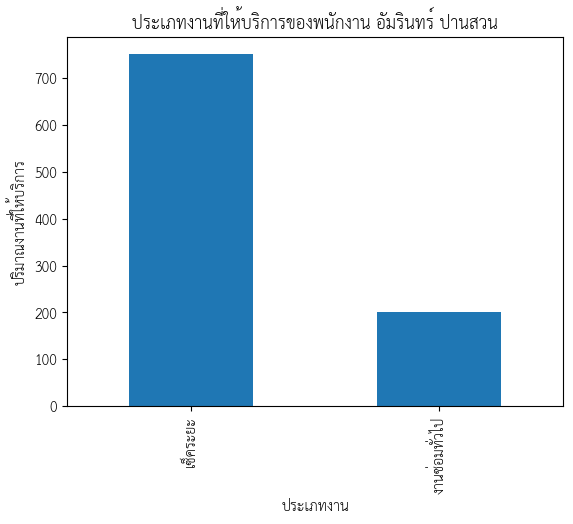

In [ ]:
SA_Amarin.value_counts('ประเภทงาน').sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('ประเภทงานที่ให้บริการของพนักงาน อัมรินทร์ ปานสวน')
plt.ylabel('ปริมาณงานที่ให้บริการ')
plt.xlabel('ประเภทงาน');

In [ ]:
SA_Damrongsak = customer_b2b[(customer_b2b.พนักงานผู้ให้บริการ == 'ดำรงศักดิ์ สิทธิสิริสัมพันธ์')]
SA_Damrongsak.head()

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,ประเภท,เบอร์โทรศัพท์,จังหวัด,ภาคที่อยู่,เขต,แขวง,รุ่นรถ,แบบรถ,วันออกรถ,ปัญหาของรถ,วันเปิดงานซ่อม,เวลา,ประเภทงาน,ประเภทลูกค้า,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,สถานะ,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,กลุ่มเลขไมล์
3,4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Camry,ASV71R,2018-11-28,NO,2022-01-03,7:00,งานซ่อมทั่วไป,Fleet,Warranty,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,515",NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"60,001-70,000"
5,4/2/2023 12:26:44,GSJ22-00006,8กน-1643,บริษัท ซีพีที ไดร์ แอนด์ เพาเวอร์ จำกัด มหาชน,บริษัท,0814419338,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Hilux Revo,GUN135R,2019-05-30,NO,2022-01-03,9:00,งานซ่อมทั่วไป,Normal,Credit,166019,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"8,862",NO,0,0,อนุมัติ,sbooncha,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"90,001+"
13,4/2/2023 16:19:31,GSJ22-00014,ศฐ 9999,จีจี ทรานสปอร์ต จำกัด,บริษัท,0869513326,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,Alphard,AYH30R,2018-06-07,NO,2022-01-04,10:00,เซ็คระยะ,Fleet,Credit,31173,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"2,826",NO,0,0,อนุมัติ,sbooncha,PM LABOR60K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"30,001-40,000"
14,4/2/2023 16:50:08,GSJ22-00015,9กฌ-6681,เวิลด์คลาส เรนท์ อะ คาร์ จำกัด,บริษัท,022039222,กรุงเทพมหานคร,ภาคกลาง,ห้วยขวาง,บางกะปิ,Hilux Revo,GUN136R,2019-10-18,NO,2022-01-04,10:00,เซ็คระยะ,Fleet,Credit,76409,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"1,790",NO,0,0,อนุมัติ,ploecyr,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"70,001-80,000"
17,4/2/2023 17:25:18,GSJ22-00018,2ขค-2166,ไทยโอริกซ์ลิสซิ่ง จำกัด,บริษัท,0912693996,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จตุจักร,Altis,ZRE210R,2021-05-12,NO,2022-01-04,11:00,เซ็คระยะ,Fleet,Credit,11723,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,531",NO,0,0,อนุมัติ,ksriwanp,FSC001,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,"10,000-20,000"


## ผลงานในปี 2022 sa ดำรงศักดิ์ สิทธิสิริสัมพันธ์ TM1 (ลูกค้าประเภทบริษัท)
- ส่วนใหญ่เป็นงานเซ็คระยะ 1300 กว่าคัน
- งานปัญหาหรือซ่อมทั่วไปเท่าไร ประมาณ 400 กว่าค้น
- แสดงให้เห็นว่า sa ดำรงศักดิ์ มีความสำคัญต้อง ศูนย์บริการ TM1 มาก

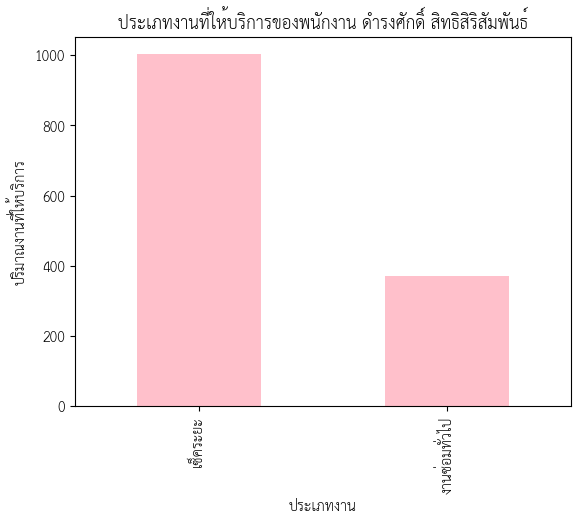

In [ ]:
SA_Damrongsak.value_counts('ประเภทงาน').sort_values(ascending=False).head(10).plot(kind='bar',color='pink')
plt.title('ประเภทงานที่ให้บริการของพนักงาน ดำรงศักดิ์ สิทธิสิริสัมพันธ์')
plt.ylabel('ปริมาณงานที่ให้บริการ')
plt.xlabel('ประเภทงาน');

### ช่างที่เสนอยอดซ่อมกับลูกค้าประเภทบริษัทให้กับศูนย์บริการ โตโยต้ามหานคร TM 1 มากที่สุดในปี 2022
- ช่างที่ชื่อ พรพจน์ ในปี 2022 ได้ทำการเสนอซ่อมมากถึง 21,10412 บาท มากที่สุด

In [ ]:
name_mapping = {'pmungmon':'พรพจน์','rthasi':'รังสรรค์','ploecyr':'พูลศักดิ์','jpetchab':'เจษฏา','nchaimag':'คมสัน','ksriwanp':'อัจฉริยะ','akhutkae':'ณัฐนัย','sbooncha':'ศุภชัย'}
def replace_names(customer_b2b, name_mapping):
    customer_b2b['ช่างผู้ทำการเสนอ'] = customer_b2b['ช่างผู้ทำการเสนอ'].replace(name_mapping)
    return customer_b2b

In [ ]:
customer_b2b = replace_names(customer_b2b, name_mapping)

In [ ]:
customer_b2b.groupby('ช่างผู้ทำการเสนอ')['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False).round(2)

,count,sum,median,mean
ช่างผู้ทำการเสนอ,,,,
พรพจน์,331,"2,110,412","2,980","6,376"
รังสรรค์,304,"2,058,445","3,625","6,771"
พูลศักดิ์,451,"2,018,947","2,509","4,477"
เจษฏา,300,"1,851,045","2,972","6,170"
คมสัน,279,"1,486,578","3,050","5,328"
อัจฉริยะ,253,"1,224,914","2,541","4,842"
ณัฐนัย,239,"1,081,521","2,408","4,525"
ศุภชัย,232,"987,655","2,374","4,257"


In [ ]:
customer_b2b.pivot_table(index=['ช่างผู้ทำการเสนอ','รุ่นรถ'],values='ค่าใช่จ่าย',aggfunc=['count','sum'],margins=True).round(2)

count        sum
                            ค่าใช่จ่าย ค่าใช่จ่าย
ช่างผู้ทำการเสนอ รุ่นรถ                          
คมสัน            Alphard             9     37,664
                 Altis              51    154,750
                 Camry              41    196,997
                 Commuter           40    227,782
                 Fortuner           17     60,084
...                                ...        ...
เจษฏา            Innova              2     12,099
                 Majesty             1      6,528
                 Vios               29     85,035
                 Yaris ATIV          1      1,248
All                               2389 12,819,517

[115 rows x 2 columns]

# สรุปผลของการวิเคราะห์
1.ลูกค้าบริษัทส่วนใหญ่ที่อยู่ยอดการจ่ายเยอะ ส่วนใหญ่จะประกอบธุรกิจเกี่ยวกับรถเช่า\
2.มีเพียง 2 บริษัทเท่านั้นที่ใช้น้ำมันสังเคราะห์ 100 % คือ ลีสซิ่งไอซีบีซี และ บริษัท กรุงเทพโทรทัศน์และวิทยุ จำกัด\
3.ลูกค้ากลุ่มบริษัทที่เข้าน้อย แค่มียอดค่าใช้จ่ายเยอะ ส่วนใหญ่จะเป็นบริษัทที่ทำธุรกิจ ที่เป็นมีแนวโน้นเติมโตในอนาคตทั้งนั้น

(สำคัญควรนำมาเป็นลูกค้าประจำศูนย์บริการ สาขาพหลโยธินให้ได้)
# คำแนะนำ
1.ควรมุ่งเน้นรักษาลูกค้าบริษัท ช่อง 7 และ ลีสซิ่งไอซีบีซี ให้ดี\
2.ควรจะทำการตลาดกับบริษัทที่มียอดเขาน้อยแต่จ่ายเงินมากเอาไว้ เพราะธุรกิจเขามีแนวโน้มเติมโต\
3.อะไหล่ มอเตอร์พัดลมเครื่อง มอเตอร์พัดลมแอร์ ยางรถยนต์ ชุดคลัทช์ แบตเตอรี่ สำหรับลูกค้าประเภทบริษัทมักจะไม่เปลี่ยนของศูนย์บริการ เนื่องจากราคาอาจจะแพง\
4.ราคาเซ็คระยะ หรือ เสนออะไหล่เพิ่มเติม กรณีหักส่วนลดแล้ว
- รถระยะประมาณไม่เกิน 10000 - 40000 ควรทำขายอะไหล่ให้ได้อย่างน้อยๆ 1600 บาท ต่อคันสำหรับลูกค้าบริษัท
- รถระยะประมาณไม่เกิน 50000 - 80000 ควรทำการขายอะไหล่ให้ได้อย่างน้อยๆ 2800 บาท ต่อคันสำหรับลูกค้าบริษัท
- รถระยะประมาณ 150000 ขึ้นไปควรทำการขายให้ได้อย่างน้อยๆ 5800 บาท ต่อคัน\
(ไม่ต้องเสนอให้ได้ทุกคันเอาใกล้เคียงก็ได้แต่ถ้าได้มันก็จะช่วยเพิ่มยอดขายให้ศูนย์บริการได้)
- ข้อดีของลูกค้าประเภทบริษัทคือ รถถึงระยะเวลาเซ็คระยะเร็วกว่ารถบุคคลธรรมดา
อาศัยว่าเข้าศูนย์บริการถี่กว่า รถบุคคลธรรมดา
---
- ลูกค้าประเภทบริษัทจะไม่ทำการเปลี่ยนอะไหล่กับทางศูนย์บริการถ้าไม่จำเป็น
- ดังนั้นควรจะเสนอให้อยู่ในการเซ็คระยะที่มาค่าใช่จ่ายตามเกณฑ์ที่กำหนด
- ลูกค้าประเภทบริษัทที่มีการเสนอราคาที่เยอะๆ ควรให้คุณ วิชิต โพธิแสง ผู้จัดการศูนย์บริการ TM 1 และ คุณดำรงศักดิ์ สิทธิสิริสัมพันธ์ เป็นผู้พูดคุยนำเสนอให้กับทางลูกค้าบริษัท
- จัดฝึกอบรมเทคนิคการเสนอขายให้กับพนักงานรับรถ เพื่อจะมีทักษะเพิ่มเติมในการเสนอให้ลูกค้า

# วิเคราะห์กลุ่มลูกทั่วไป 🐤
- จะวิเคราะห์ลูกค้ากลุ่มที่ไม่ใช่ลูกค้าประเภทบริษัท

In [ ]:
df.rename(columns={'ชื่อ - นามสกุล':'name','จังหวัด':'province','ภาคที่อยู่':'sector','เขต':'zone','สถานะ ':'status','ประเภท':'Segment',
                   'ประเภทงาน':'jobtype','model':'car','เวลา':'time','แบบรถ':'model','ประเภทลูกค้า':'customertype','วันเปิดงานซ่อม':'y-m-d','น้ำมันที่ลูกค้าเลือกใช้':'Oil'},inplace=True)

In [ ]:
df

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,Segment,เบอร์โทรศัพท์,province,sector,zone,แขวง,รุ่นรถ,model,วันออกรถ,ปัญหาของรถ,y-m-d,time,jobtype,customertype,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ
0,4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,Camry,AXVH71R,2018-12-27,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"1,142",NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
1,4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,Yaris,NSP152R,2019-04-04,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,"9,755",NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
2,4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Camry,AVV50R,2012-05-11,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"76,870",NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
3,4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Camry,ASV71R,2018-11-28,NO,2022-01-03,7:00,งานซ่อมทั่วไป,Fleet,Warranty,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,515",NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4,4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,Altis,ZRE141R,2010-10-01,Power train chassis,2022-01-03,8:00,งานซ่อมทั่วไป,Fleet,Cash,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"7,538",ชุดลูกหมากแร็กตัวนอกใน,"26,857",1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,8/20/2024 9:43:40,GSJ22-05173,ฎจ-499,ภัณฑิลา นุชบุษบา,หญิง,0819877229,นนทบุรี,ภาคกลาง,เมืองนนทบุรี,ท่าทราย,C-HR,ZYX10R,2018-06-04,NO,2022-12-30,7:00,เซ็คระยะ,Normal,Cash,67781,น้ำมันเครื่องสังเคราะห์ สีเทา,"2,084",NO,0,0,อนุมัติ,ksriwanp,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
5021,8/20/2024 9:47:23,GSJ22-05174,ฆค-8153,สรารัตน์ เลิศไกร,หญิง,0936504422,พังงา,ภาคใต้,ท้ายเหมือง,ท้ายเหมือง,Vios,NCP93R,2011-09-28,NO,2022-12-30,8:00,งานซ่อมทั่วไป,Normal,Warranty,132751,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,50,NO,0,0,อนุมัติ,pmungmon,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
5022,8/20/2024 9:51:01,GSJ22-05175,8กอ-4070,อาคเนย์แคปปิตอล จำกัด,บริษัท,028615656,กรุงเทพมหานคร,ภาคกลาง,บางรัก,สี่พระยา,Camry,AXVA70R,2019-07-26,NO,2022-12-30,8:00,เซ็คระยะ,Fleet,Credit,78074,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,340",NO,0,0,อนุมัติ,pmungmon,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
5023,8/20/2024 9:54:47,GSJ22-05176,34-1908,ทรู ลีสซิ่ง จำกัด,บริษัท,020331334,กรุงเทพมหานคร,ภาคกลาง,ห้วยขวาง,ห้วยขวาง,Commuter,GDH322R,2019-07-11,NO,2022-12-30,10:00,เซ็คระยะ,Fleet,Credit,130994,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"2,148",NO,0,0,อนุมัติ,ploecyr,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์


In [ ]:
customer_b2c = df[df["Segment"] != "บริษัท"]

# ภาพรวมทางสถิติของลูกค้าทั่วไป
- มีค่าเฉลี่ยเข้าซ่อมประมาณ 6400 บาท
- มียอดเสนออะไหล่เพิ่มเติมเฉลี่ย 3725
- และมีค่าใช้จ่ายมากที่สุดคือ 255447 บาท


In [ ]:
customer_b2c.describe().round(2)

,ระยะทางวันเข้าซ่อม,ค่าใช่จ่าย,ยอดเสนออะไหล่เพิ่มเติม,list_no
count,"2,636","2,636","2,636","2,636"
mean,"133,890","6,403","3,725",1
std,"100,841","12,033","12,945",3
min,4,1,0,0
25%,"57,329","1,922",0,0
50%,"117,138","3,876",0,0
75%,"188,798","7,030",0,0
max,"888,886","255,447","180,488",35


### จากการดูสถิติ
- พบว่ามีข้อมูลอยู่ ในระดับ 250000 ใน columns ค่าใช้จ่าย
- ถือว่าเป็นค่าใช่จ่ายที่มากผิดปรติ

<Axes: >

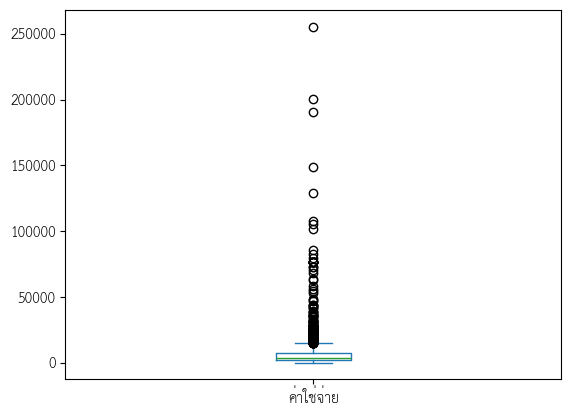

In [ ]:
customer_b2c['ค่าใช่จ่าย'].plot.box()

## ตัดส่วนที่เป็น Outliner

In [ ]:
customer_b2c.drop(customer_b2c[customer_b2c['ค่าใช่จ่าย'] > 250000].index, inplace = True)

# ค่าใช่จ่ายโดยของลูกค้าทั่วไปแยกประเภท
- ลูกค้าผู้หญิงมียอดการจ่ายที่เยอะกว่าผู้ชาย
-แต่มีค่ากลางใกล้เคียงกัน ยอดค่าเฉลี่ยนใกล้เคียงกัน

In [ ]:
customer_b2c.groupby('Segment')['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False).round(2)

,count,sum,median,mean
Segment,,,,
หญิง,1352,"8,775,775","3,833","6,491"
ชาย,1256,"7,636,423","3,884","6,080"
ห้างหุ้นส่วนจำกัด,7,"105,008","5,069","15,001"
หน่วยงานราชการ,20,"104,942","4,455","5,247"


# น้ำมันที่ลูกค้าเลือกใช้
- 1 น้ำมันกึ่งสังเคราะห์สีเขียวเบนซิน
- 2 น้ำมันสังเคราะห์ 100 % สีน้ำเงิน
- 3 น้ำมันกิ่งสังเคราะห์ สีแดง ดีเซล
---
ผู้วิเคราะห์เห็นว่าน้ำมันที่เราควรจะเน้นขายให้มากขึ้นคือ
- น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน ควรเน้นขายเป็นอันดับ 1
- น้ำมันเครื่องสังเคราะห์ สีเทา เน้นขาย
- น้ำมันเครื่องสังเคราะห์ดีเซล สีเทา เน้นขาย
- น้ำมันเครื่องสังเคราะห์ สีเหลืองทอง เน้นขาย
---
คำแนะนำควรจะทำการตลาดให้ลูกค้าหันมาใช้น้ำมันเครื่องสังเคราะห์ให้มากขึ้นเพื่อเพิ่มยอดขายในการเซ็คระยะ\
1.ข้อสังเกตุ \
- ถึงแม้ว่ายอดขายน้ำมันสังเคราะห์ 100 % จะมาเป็นอันดับ 2 แต่ถ้าสังเกตุดู 1 กับ 2 ห่างกันเกือบครึ่ง สำหรับลูกค้าทั้วไป


In [ ]:
customer_b2c.Oil.unique()

array(['น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน',
       'น้ำมันเครื่องสังเคราะห์ สีเทา',
       'น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว',
       'น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง',
       'น้ำมันเครื่องสังเคราะห์ดีเซล สีเทา',
       'น้ำมันเครื่องสังเคราะห์ สีเหลืองทอง'], dtype=object)

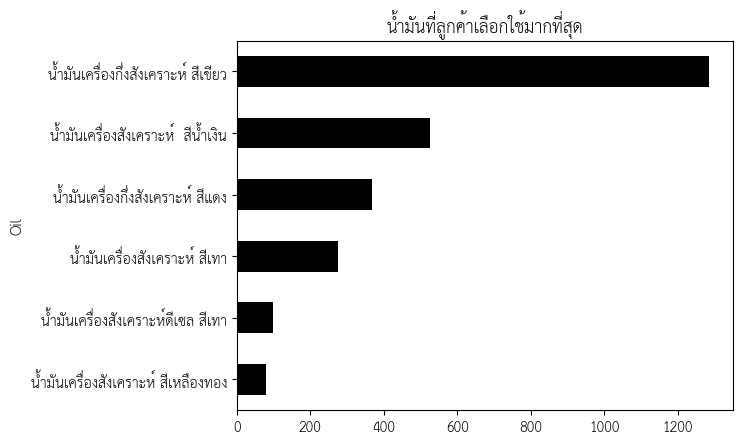

In [ ]:
customer_b2c.value_counts('Oil').sort_values(ascending=True).plot(kind='barh',color='black')
plt.title('น้ำมันที่ลูกค้าเลือกใช้มากที่สุด');

### ลูกค้าผู้ชายหรือลูกค้าผู้หญิง ที่มีการใช้น้ำมันสังเคราะห์ 100 %
- ลูกค้าผู้ชายมีการใช่น้ำมันสังเคราะห์มากที่สุด
- แต่ผู้หญิงนิยมใช้เช่นกัน

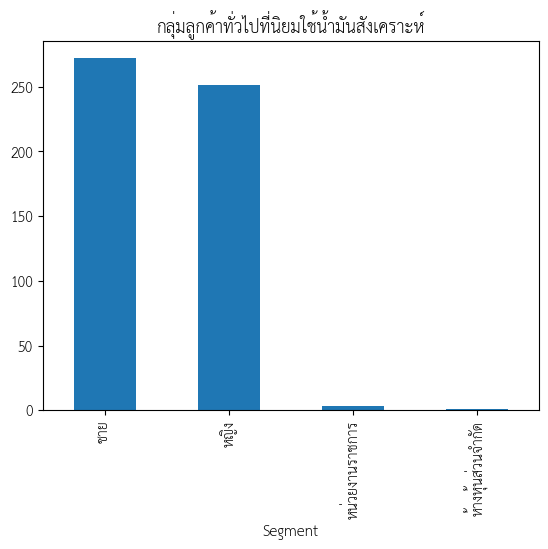

In [ ]:
customer_b2c[customer_b2c.Oil== 'น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน'].value_counts('Segment').plot(kind='bar')
plt.title('กลุ่มลูกค้าทั่วไปที่นิยมใช้น้ำมันสังเคราะห์');

### รถรุ่นไหนที่ลูกค้านิยมใช้สังเคราะห์ 100 % มากที่สุด
- เห็นได้ชัดเจนว่า รถ camry เป็นรถที่นิยมใช่น้ำมันสังเคราะห์มากที่สุด
---
ถ้าดูจากปริมาณของจำนวนรถที่ใช่น้ำมันสังเคราะห์แลัว
- ผู้วิเคราะห์เห็นว่าควรโปรโมทข้อดีของน้ำมันสังเคราะห์ 100 %
- ควรทำการตลาดเพื่อหารถที่ใช่น้ำมันสังเคราะห์เพิ่ม เช่นรุ่น C-HR Fortuner Corolla Cross หรือรุ่นใหม่ๆเข้าศูนย์บริการมากขึ้น



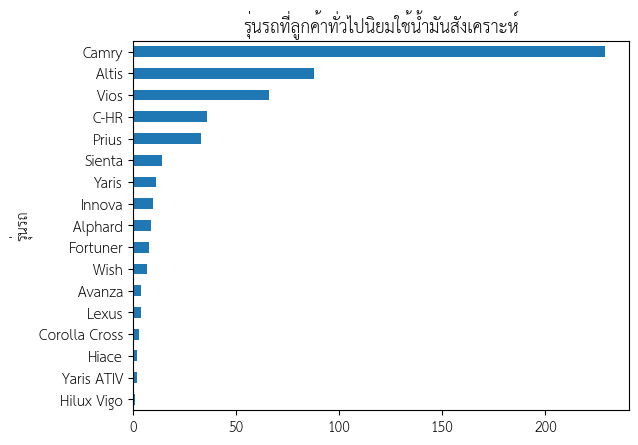

In [ ]:
customer_b2c[customer_b2c.Oil== 'น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน'].value_counts('รุ่นรถ').sort_values(ascending=True).plot(kind='barh')
plt.title('รุ่นรถที่ลูกค้าทั่วไปนิยมใช้น้ำมันสังเคราะห์');

### น้ำมันเครื่องดีเซลสีเทาสังเคราะห์ รถรุ่นไหนนิยมใช้มากที่สุด
- Fortuner
- แสดงให้เห็นว่า ลูกค้าที่ใช้รถ Fortuner ก็มีกำลังการชื้อเหมือนกัน
- Hilux Revo ก็เป็นที่นิยมเช่นกัน และควรทำการตลาดกับรถรุ่นนี้


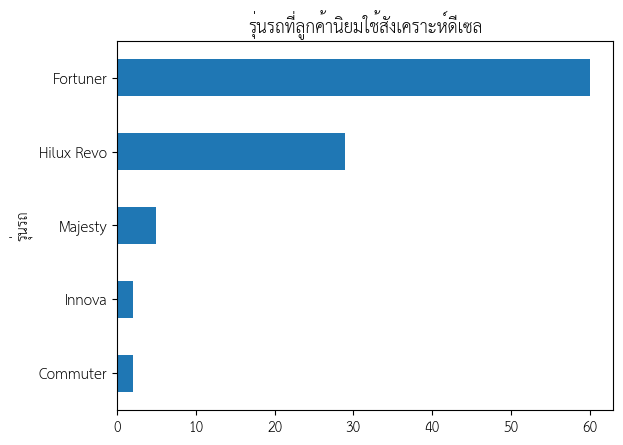

In [ ]:
customer_b2c[customer_b2c.Oil== 'น้ำมันเครื่องสังเคราะห์ดีเซล สีเทา'].value_counts('รุ่นรถ').sort_values(ascending=True).plot(kind='barh')
plt.title('รุ่นรถที่ลูกค้านิยมใช้สังเคราะห์ดีเซล');

### ลูกค้าผู้หญิงที่นำรถเข้าศูนย์บริการในปี 2022 นิยมใช่รถรุ่นอะไรมากที่สุดในปี 2022
- ในปี 2022 ลูกค้าทั้วไปที่เป็นเพศหญิง นิยมใช่รถ vios มากที่สุด
### สิ่งที่ผู้วิเคราะห์ต้องการคือ ?
- ลูกค้าเพศหญิงที่ใช่รถ camry fortuner C-HR corlla cross
- อะไหล่ ค่อนข้างจะแพง ป้องกันดินเลอร์อื่นแย่งลูกค้ากลุ่มนี้ไป

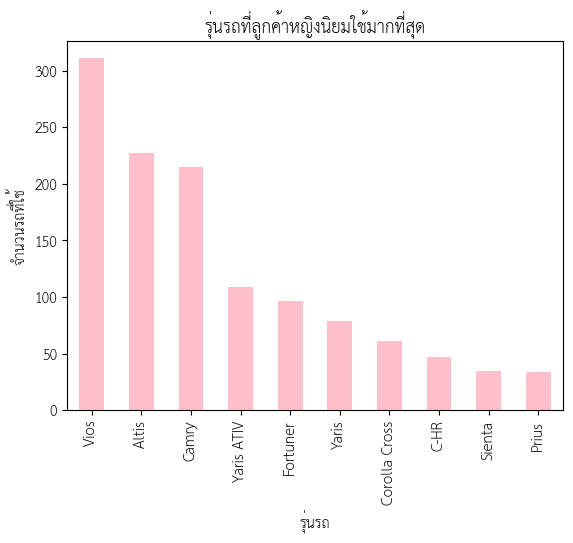

In [ ]:
customer_Female = customer_b2c[(customer_b2c.Segment == 'หญิง')]
customer_Female.value_counts('รุ่นรถ').sort_values(ascending=False).head(10).plot(kind='bar',color='pink')
plt.title('รุ่นรถที่ลูกค้าหญิงนิยมใช้มากที่สุด')
plt.ylabel('จำนวนรถที่ใช้');

In [ ]:
customer_Female_Oil_blue = customer_Female[(customer_Female.Segment == 'หญิง') & (customer_Female.Oil == 'น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน')]

# เป็นไปตามที่คาดไว้
- ลูกค้าเพศหญิงที่ใช้ รถ camry นิยมใช้น้ำมันสังเคราะห์ 100 มากที่สุด
- ควรทำการตลาด เพื่อเก็บลูกค้ากลุ่มนี้เอาไว้ เช่น อาจจะเป็นบริการเสริม เพื่อเพิ่มความประทับใจให้กับลูกค้าคุณผู้หญิง
- และเป็นการเพิ่มโอกาสสร้างยอดขายให้กับศูนย์บริการ

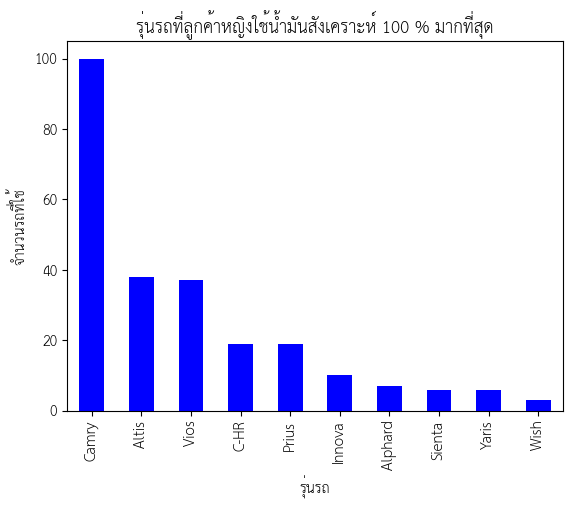

In [ ]:
customer_Female_Oil_blue.value_counts('รุ่นรถ').sort_values(ascending=False).head(10).plot(kind='bar',color='blue')
plt.title('รุ่นรถที่ลูกค้าหญิงใช้น้ำมันสังเคราะห์ 100 % มากที่สุด')
plt.ylabel('จำนวนรถที่ใช้');

## ลูกค้าที่เป็นผู้หญิงอาคัยอยู่แถวไหนกันบาง
- พบว่าส่วนใหญ่ลูกค้าที่เป็นผู้หญิงส่วนใหญ่จะมีที่อยู่ ในกรุงเทพ เขตใกล้ๆกับศูนย์บริการ
- แต่ในพื้นที่ของ จตุจักร มี toyota เคมอเตอร์ toyota กรุงไทย เป็น 2 ดิลเลอร์ที่อยู่ในพื้นที่ใกล้เคียงกับ โตโยต้ามหานคร ลาดพร้าว
- ดังนั้น ในพื้นที่ตรงนี้ เราควรทำการตลาดแย่งลูกค้ามา
- ลูกค้าที่อยู่ใน กรุงเทพ ภาคกลาง เขต จตุจักร จะเข้าศูนย์บริการมากที่สุด ถึง 441 คัน
---
- ผู้วิเคราะห์ไท่ทรายถึงข้อมูลของ toyota เคมอเตอร์ กับ toyota กรุงไทย ว่ามีลูกค้าเข้าไปใช้บริการเท่าไร
- จึงเห็นความจำเป็นอย่างยิ่งว่าควรต้องทำการรักษาลูกค้ากลุ่มนี้ไว้

In [ ]:
customer_Female.groupby(['province','sector','zone'])['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False).round(2)

count       sum  median  mean
province      sector      zone                                         
กรุงเทพมหานคร ภาคกลาง     จตุจักร           441 2,859,456   3,817 6,484
                          พญาไท              86   811,828   4,118 9,440
                          ห้วยขวาง           55   286,183   2,541 5,203
                          ดินแดง             37   279,953   5,425 7,566
                          ลาดพร้าว           52   249,779   3,335 4,803
...                                         ...       ...     ...   ...
สมุทรปราการ   ภาคกลาง     พระสมุทรเจดีย์      1        51      51    51
ชุมพร         ภาคใต้      สวี                 1        51      51    51
ลำพูน         ภาคเหนือ    แม่ทา               1        50      50    50
ชลบุรี        ภาคตะวันออก พนัสนิคม            1        50      50    50
ราชบุรี       ภาคกลาง     บ้านโป่ง            1         1       1     1

[200 rows x 4 columns]

### ลูกค้าเพศขายที่เข้ารับบริการที่ศูนย์บริการ tm1 นิยมใช่รถรุ่นอะไร
- นิยมใช้ camry มากที่สุด
- สิ่งที่ผู้วิเคราะห์ต้องการ คือ ลูกค้าผู้ชายที่ใช้ camry fortuner C-HR corlla cross Hilux Revo


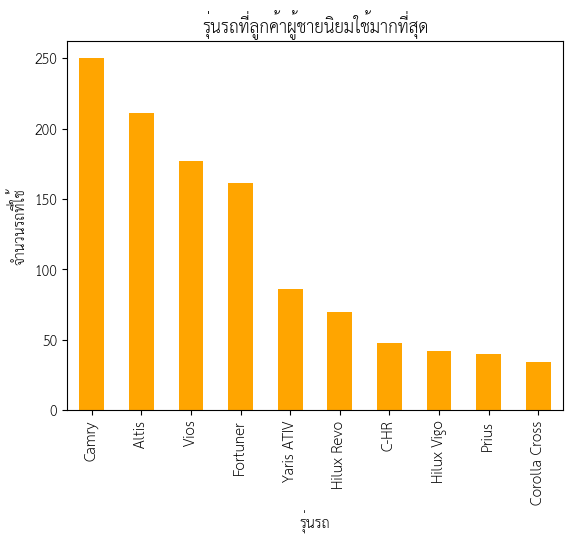

In [ ]:
customer_Male = customer_b2c[(customer_b2c.Segment == 'ชาย')]
customer_Male.value_counts('รุ่นรถ').sort_values(ascending=False)[0:10].plot(kind='bar',color='Orange')
plt.title('รุ่นรถที่ลูกค้าผู้ชายนิยมใช้มากที่สุด')
plt.ylabel('จำนวนรถที่ใช้');

# ลูกค้าผู้ชายที่เข้ารับการบริการจาก tm1 มีรถรุ่นไหนที่ใช้ น้ำมันสังเคราะห์ 100
- สิ่งที่ผู้วิเคราะห์ต้องการ camry fortuner C-HR corlla cross Hilux Revo
- แสดงให้เห็นว่าลูกค้าที่ศูนย์บริการ tm1 นั้นได้แต่รถ camry อย่างเดียว
- ถ้าลูกค้าเปลี่ยนใจไปใช้บริการที่อื่น ยอดศูนย์บริการจะน้อยลงอย่างมาก
### ดังนั้นต้องการทำการตลาดเพื่อดึงลูกค้าเข้ามา
- camry fortuner C-HR corlla cross Hilux Revo ต้องได้ลูกค้ากลุ่มนี้ให้มากที่สุด
- และทำการเชียร์ขายน้ำมันสังเคราะห์ 100 % พร้อมเคมีภัณฑ์อื่นๆ เช่นน้ำยาฉีดกระจก น้ำยาล้างหัวฉีดเบนซิน น้ำยาล้านหัวฉีดดีเซล ด้วยเพิ่มเติม

In [ ]:
customer_Male_Oil_blue = customer_b2c[(customer_b2c.Segment == 'ชาย') & (customer_b2c.Oil == 'น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน')]

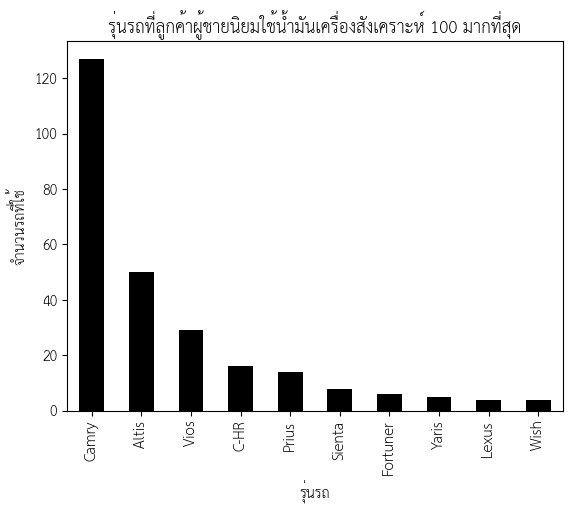

In [ ]:
customer_Male_Oil_blue.value_counts('รุ่นรถ').sort_values(ascending=False)[0:10].plot(kind='bar',color='Black')
plt.title('รุ่นรถที่ลูกค้าผู้ชายนิยมใช้น้ำมันเครื่องสังเคราะห์ 100 มากที่สุด')
plt.ylabel('จำนวนรถที่ใช้');

### ผลการวิเคราะห์
1.พบว่าศูนย์บริการ tm1 นั้นมียอดจากลูกค้าผู้ที่ใช้รถ camry มากที่สุด
- เป็นรถที่มีผลต่อยอดขายของศูนย์บริการมากกว่าที่สุด
2.ลูกค้าที่มักจะมีที่อยู่อาศัยอยู่ใกล้ๆกับศูนย์บริการ
- toyota เคมอเตอร์ toyota กรุงไทย ก็อยู่ในพื้นที่นั้นด้วย
3.ลูกค้าทั้วไป นิยมใช้น้ำมันกึ่งสังเคราะห์ สีเขียว ราคา 800 บาท
- มากกว่าน้ำมันสังเคราะห์ 100 ราคา 1800 บาท
- มีแต่รถ camry เท่านั้นที่นิยมใช่น้ำมันสังเคราะห์ 100

In [ ]:
display(customer_Male.groupby(['province','sector','zone'])['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False).round(2),
            customer_Female.groupby(['province','sector','zone'])['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False).round(2))

count       sum  median  mean
province      sector                zone                                     
กรุงเทพมหานคร ภาคกลาง               จตุจักร       343 2,177,170   4,232 6,347
                                    ดินแดง         53   340,969   4,196 6,433
                                    พญาไท          47   329,283   5,324 7,006
                                    ลาดพร้าว       47   322,914   3,757 6,871
                                    วังทองหลาง     33   260,106   4,485 7,882
...                                               ...       ...     ...   ...
อุทัยธานี     ภาคกลาง               บ้านไร่         1        75      75    75
เชียงใหม่     ภาคกลาง               สันกำแพง        1        75      75    75
ร้อยเอ็ด      ภาคตะวันออกเฉียงเหนือ โพนทอง          1        51      51    51
ชลบุรี        ภาคตะวันออก           บางละมุง        1        51      51    51
ร้อยเอ็ด      ภาคตะวันออกเฉียงเหนือ พนมไพร          1        50      50    50

[214 rows x 4 columns]

count       sum  median  mean
province      sector      zone                                         
กรุงเทพมหานคร ภาคกลาง     จตุจักร           441 2,859,456   3,817 6,484
                          พญาไท              86   811,828   4,118 9,440
                          ห้วยขวาง           55   286,183   2,541 5,203
                          ดินแดง             37   279,953   5,425 7,566
                          ลาดพร้าว           52   249,779   3,335 4,803
...                                         ...       ...     ...   ...
สมุทรปราการ   ภาคกลาง     พระสมุทรเจดีย์      1        51      51    51
ชุมพร         ภาคใต้      สวี                 1        51      51    51
ลำพูน         ภาคเหนือ    แม่ทา               1        50      50    50
ชลบุรี        ภาคตะวันออก พนัสนิคม            1        50      50    50
ราชบุรี       ภาคกลาง     บ้านโป่ง            1         1       1     1

[200 rows x 4 columns]

### เรื่องของช่วงเวลาในการเข้าของลูกค้า

In [ ]:
customer_b2c['y-m-d'] = pd.to_datetime(customer_b2c['y-m-d'], errors='coerce')

In [ ]:
customer_b2c['month'] = customer_b2c['y-m-d'].dt.month

In [ ]:
customer_b2c = customer_b2c.replace({"month":{
    1 :"มกราคม",
    2 :"กุมภาพันธ์",
    3 :"มีนาคม",
    4 :"เมษายน",
    5 :"พฤษภาคม",
    6 :"มิถุนายน",
    7 :"กรกฎาคม",
    8 :"สิงหาคม",
    9 :"กันยายน",
    10 :"ตุลาคม",
    11 :"พฤศจิกายน",
    12 :"ธันวาคม"
}})

### เดือนไหนที่ TM1 มีลูกค้า b2c เข้ามามากที่สุด
- ในปี 2020 เดือน 6 ลูกค้าปรติจะเข้ามาใช้บริการในเดือน 6 มากที่สุด ในปี 2020
- มียอดรวม 18,67421
- จำนวนรถ 232 คัน
### สิ่งที่น่าแปลกก็คือ
- เดือน 4 คือเดือน เมษายน มีวันหยุดยาวช่วง วันสงกรานต์: 13-15 เมษายน
- แต่มี จำนวน รถเข้ามาใช้บริการน้อย
- หรือเป็นเพราะลูกค้าต้องการเก็บเงินไปเที่ยว
### กลยุทธ์การตลาดที่น่าสนใจ (สำหรับลูกค้าที่ต้องการเดินทางออกต่างจังหวัด หรือเดินทางไกล)
1. สร้างความตระหนักรู้ถึงความสำคัญของการตรวจเช็คสภาพรถก่อนเดินทาง:
สื่อสารผ่านช่องทางออนไลน์:
โซเชียลมีเดีย: Facebook, Instagram, TikTok สร้างคอนเทนต์ที่น่าสนใจ เช่น วิดีโอสั้นๆ แสดงให้เห็นถึงปัญหาที่อาจเกิดขึ้นกับรถยนต์หากไม่ได้รับการตรวจเช็คก่อนเดินทาง
เว็บไซต์: สร้างหน้า Landing Page แยกสำหรับโปรโมชั่นช่วงสงกรานต์
---
2. จัดโปรโมชั่นและส่วนลดพิเศษ:
ตรวจเช็คฟรี: เช่น ตรวจเช็ค 10 รายการฟรี, ตรวจเช็คระบบเบรกฟรี
ส่วนลดอะไหล่และน้ำมันเครื่อง: ลดราคาอะไหล่และน้ำมันเครื่องบางรายการ
แพ็คเกจตรวจเช็ครถก่อนเดินทาง: รวมบริการตรวจเช็คหลายรายการในราคาพิเศษ
โปรแกรมสะสมแต้ม: มอบแต้มสะสมให้ลูกค้าที่เข้ามาใช้บริการ เพื่อแลกของรางวัลหรือส่วนลดในครั้งต่อไป
- เน้นให้ลูกค้าตระหนักถึงความปลอดภัยในการตรวจสภาพรถก่อนออกเดินทางไกล
---
3. จัดกิจกรรมส่งเสริมการขาย:
ร่วมมือกับพันธมิตร: เช่น ร้านอาหาร, โรงแรม จัดโปรโมชั่นร่วมกัน เพื่อเพิ่มความน่าสนใจ
---
4. เก็บข้อมูลของลูกค้าที่เกี่ยวกับความชอบ หรือ สถานที่ที่อยากไปเที่ยว
เพื่อนำมาวิเตราะห์ว่าลูกค้าส่วนใหญ่อยากไปเที่ยวที่ไหน จะได้ทำการตลาดได้อย่างถูกต้องมากขึ้น
---
ระยะเวลาในการทำการตลาด น่าจะใช้เวลาประมาณ 2 เดือน ตั้งแต่ กุมภาพันธ์ - 12 เมษายน
- ประชุม เพื่อปรึกษา ผู้บริหาร หรือผู้มีอำนาจในการตัดสินใจ
---
ศูนย์บริการ tm 1 ในปี 2022 จะมีรายได้มากตอนช่วงต้นปีช่วงเดือน
- มกราคม
- กุมภาพันธ์
- พฤษภาคม
- มิถุนายน

In [ ]:
customer_b2c['month']=pd.Categorical(customer_b2c['month'],
            categories=['มกราคม','กุมภาพันธ์','มีนาคม','เมษายน','พฤษภาคม','มิถุนายน','กรกฎาคม','สิงหาคม','กันยายน','ตุลาคม','พฤศจิกายน','ธันวาคม'],
            ordered=True)
df[0:5]

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,Segment,เบอร์โทรศัพท์,province,sector,zone,แขวง,รุ่นรถ,model,วันออกรถ,ปัญหาของรถ,y-m-d,time,jobtype,customertype,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ
0,4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,Camry,AXVH71R,2018-12-27,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"1,142",NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
1,4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,Yaris,NSP152R,2019-04-04,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,"9,755",NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
2,4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Camry,AVV50R,2012-05-11,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"76,870",NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
3,4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Camry,ASV71R,2018-11-28,NO,2022-01-03,7:00,งานซ่อมทั่วไป,Fleet,Warranty,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,515",NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4,4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,Altis,ZRE141R,2010-10-01,Power train chassis,2022-01-03,8:00,งานซ่อมทั่วไป,Fleet,Cash,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"7,538",ชุดลูกหมากแร็กตัวนอกใน,"26,857",1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์


In [ ]:
Monthly_revenue_b2c = customer_b2c.groupby('month')['ค่าใช่จ่าย'].agg(['count','sum'])
Monthly_revenue_b2c.style.highlight_between(left=1500000, right=1900000,props='font-weight:bold;color:#e83e8c')

,count,sum
month,,
มกราคม,227,1599500.000000
กุมภาพันธ์,203,1522521.000000
มีนาคม,212,1090053.000000
เมษายน,212,1108219.000000
พฤษภาคม,202,1688853.000000
มิถุนายน,232,1867421.000000
กรกฎาคม,229,1278471.000000
สิงหาคม,223,1115305.000000
กันยายน,209,1278953.000000


### ภาพรวมของรายได้จากลูกค้าประเภทลูกค้าทั่วไป
- รายได้เฉลี่ยนต่อเดือน 138,5179
- รายได้ที่เป็นค่ากลาง 133,5295
- รายได้มากที่สุด 186,7421
- รายได้น้อยที่สุดในปี 2022 109,0053
---
ในปี 2023 เราควรจะเน้นการหาลูกค้าที่ใช้รถยนต์
- camry Fortuner C-HR Corlla cross Hilux Revo ให้มากที่สุด

In [ ]:
display(Monthly_revenue_b2c['sum'].mean(),
        Monthly_revenue_b2c['sum'].median(),
        Monthly_revenue_b2c['sum'].max(),
        Monthly_revenue_b2c['sum'].min())

1385179.0

1335295.5

1867421.0

1090053.0

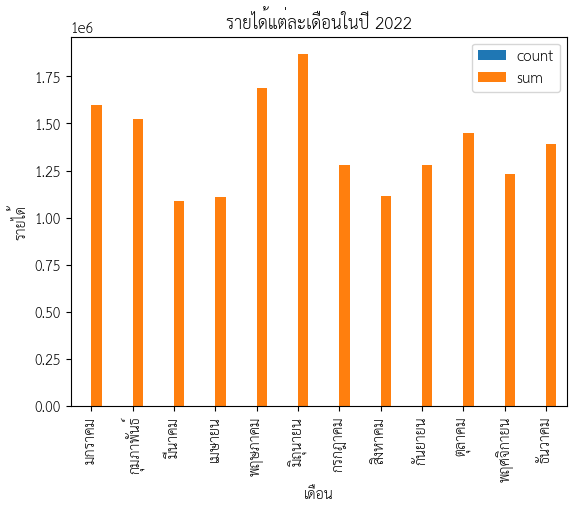

In [ ]:
Monthly_revenue_b2c.plot(kind='bar',title='รายได้แต่ละเดือนในปี 2022')
plt.ylabel('รายได้')
plt.xlabel('เดือน');

### ลูกค้าทั่วไปที่อยู่ต่างจังหวัด
- นอกจากกรุงเทพแล้วมีเรามีลูกค้าที่ไหนบางที่อยู่ไกลๆ
- จากการตรวจสอบ พบว่า tm1 ก็มีลูดค้าที่มาจากภาคอื่นๆเช่นกัน แต่อาจจะน้อยหน่อย
- ลูกค้าที่มีภูมิลำเนาอยู่ทางใต้ในปี 2022 เข้ามาใช้บริการมากที่สุดถึง 130 คัน
- ลูกค้ากลุ่มอาจจะต้องการเซ็ครถก่อนออกเดินทาง
- รองลงมาก็จะเป็นภาค ตะวันออกเฉียงเหนือ
---
เราอาจจะต้องทำการตลาดเพื่อดึงดูดลูกค้าต่างจังหวัดที่เข้ามาทำงานในกรุงเทพ
- เช่นจัดแคมเปญ เซ็คระยะเดินทางไกล สำหรับลูกค้าที่มีภูมิลำเนาอยู่ต่างจังหวัด
- หรือบางจังหวัด อาจจะมีประเพณีต่างถิ่น ลูกค้ากลุ่มนี้อาจจะมีความจำเป็นต้องกลับ
- ไปร่วมงาน เช่น เทศกาลเดือน 10 ของภาคใต้ เป็นต้น

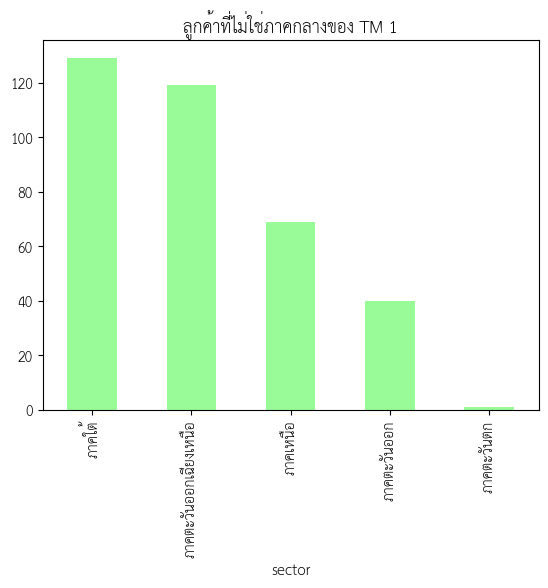

In [ ]:
customer_sector = customer_b2c[(customer_b2c.sector != 'ภาคกลาง')]
customer_sector.value_counts('sector').sort_values(ascending=False).plot(kind='bar',color='palegreen',x='จำนวน',y='ภาคที่อยู่',
                                                                      title='ลูกค้าที่ไม่ใช่ภาคกลางของ TM 1');

### ลูกค้าทั่วไปที่เข้ามาใช้บริการกับ บริษัทโตโยต้า มหานคร มียอดรวมการเสนอรายการอะไหล่เท่าไร ในปี 2022 ลูกค้า b2c

## หมวดเครื่องยนต์
- ผู้วิเคราะห์แบ่งเป็น 3 หมวดหลัก
- พลาดโอกาสการขายหมวดเครื่องยนต์ = 88,7930 บาท
- อะไหล่ที่พลาดโอกาสการขายมากที่สุด คือชุดยางแท่นเครื่อง ประมาณ 14 ชุด
## หมวดช่วงล่าง
- อะไหล่ที่พลาดโอกาสการขายมากที่สุด คือ
- ยางรถยนต์ พลาดไปเกือยๆ 50 ชุด
- หมายเหตุ ทางศูนย์บริการ ไม่มีนโยบาย สต๊อกยางรถยนต์เอาไว้อยู่แล้ว
- สั่งเป็นต่อ job เมื่อลูกค้าอนุมัติ
- มูลค่าโดยรวมในการพลาดการขาย = 29,63216 บาท
## หมวดไฟฟ้า
- อะไหล่ที่พลาดการขายไป
- อะไหล่ที่พลาดการขายมากที่สุด คือ แบตเตอรี่
- มูลค่าที่พลาดไปคือ 12,37675 บาท
- ความคิดเห็นเนื่องจากปัจจุบันมีร้านแบตเตอรี่อยู่มากลูกค้าอาจจะมีทางเลือกมากขึ้นในการ เลือกชื้ออะไหล่
- เช่นบนอินเตอร์เน็ต

In [ ]:
customer_b2c.columns

Index(['Timestamp', 'เลขที่ใบสั่งซ่อม', 'ทะเบียนรถ', 'name', 'Segment',
       'เบอร์โทรศัพท์', 'province', 'sector', 'zone', 'แขวง', 'รุ่นรถ',
       'model', 'วันออกรถ', 'ปัญหาของรถ', 'y-m-d', 'time', 'jobtype',
       'customertype', 'การจ่ายเงิน', 'ระยะทางวันเข้าซ่อม', 'Oil',
       'ค่าใช่จ่าย', 'อะไหล่เสนอเพิ่มเติม', 'ยอดเสนออะไหล่เพิ่มเติม',
       'list_no', 'status', 'ช่างผู้ทำการเสนอ', 'รหัสแคมเปญ',
       'พนักงานผู้ให้บริการ', 'month'],
      dtype='object')

In [ ]:
Offer_part_b2c = customer_b2c[customer_b2c.status == 'ไม่อนุมัติ']

In [ ]:
Offer_part_b2c[['ยอดเสนออะไหล่เพิ่มเติม']].sum()

,0
ยอดเสนออะไหล่เพิ่มเติม,"9,819,977"


In [ ]:
Offer_part_b2c.ปัญหาของรถ.unique()

array(['Power train chassis', 'Electrical', 'Enging, Power train chassis',
       'Enging, Electrical', 'Enging, Power train chassis, Electrical',
       'Enging', 'Power train chassis, Electrical',
       'Power train chassis, Body', 'Body, Electrical', 'Body',
       'Enging,Power train chassis',
       'Enging, Power train chassis, Body, Electrical',
       'Enging, Power train chassis, Body', 'Enging,Electrical',
       'Electrical,Power train chassis,Electrical',
       'Electrical,Power train chassis',
       'Enging,Power train chassis,Electrical', 'Power Train chassis',
       'Enging, Body, Electrical', 'Enging, Body',
       'Engine,Power train chassis'], dtype=object)

In [ ]:
Offer_part_b2c.pivot_table(index=['ปัญหาของรถ'],values='ยอดเสนออะไหล่เพิ่มเติม',aggfunc=['count','sum'],margins=True).round(2)

,count,sum
,ยอดเสนออะไหล่เพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม
ปัญหาของรถ,,
Body,13,"78,795"
"Body, Electrical",8,"60,203"
Electrical,104,"1,237,675"
"Electrical,Power train chassis",1,"19,768"
"Electrical,Power train chassis,Electrical",1,"9,862"
"Engine,Power train chassis",1,"25,562"
Enging,59,"887,930"
"Enging, Body",1,"111,630"


In [ ]:
part_b2c_Enging = Offer_part_b2c[Offer_part_b2c.ปัญหาของรถ == 'Enging']
part_b2c_Enging.sort_values(by='ยอดเสนออะไหล่เพิ่มเติม',ascending=False)

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,Segment,เบอร์โทรศัพท์,province,sector,zone,แขวง,รุ่นรถ,model,วันออกรถ,ปัญหาของรถ,y-m-d,time,jobtype,customertype,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,month
1202,6/14/2023 11:07:22,GSJ22-01240,ผค-6802,พิชัย อึ้งจงเจตน์,ชาย,0988461915,นครปฐม,ภาคกลาง,เมืองนครปฐม,โพรงมะเดื่อ,Hilux Vigo,KUN15R,2005-06-28,Enging,2022-04-04,8:00,งานซ่อมทั่วไป,Normal,Cash,301977,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,500,ปั้มน้ำมันเชื้อเพลง|ชุดหัวฉีด|ยางรองหัวฉีด|ประ...,"100,263",5,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,เมษายน
2824,1/16/2024 8:36:57,GSJ22-02891,วค-9129,สิริชัย วัชโรทน,ชาย,0818119433,กรุงเทพมหานคร,ภาคกลาง,ลาดพร้าว,ลาดพร้าว,Altis,ZZE122R,2002-01-22,Enging,2022-07-27,8:00,เซ็คระยะ,Normal,Cash,76199,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"6,393",กล่องVSC,"83,085",1,ไม่อนุมัติ,rthasi,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,กรกฎาคม
3874,5/8/2024 8:45:45,GSJ22-03996,กจ-1978,สิทธิศักดิ์ สร้อยสังวาลย์,ชาย,0809693100,ประจวบคีรีขันธ์,ภาคใต้,เมืองประจวบคีรีขันธ์,เกาะหลัก,Fortuner,KUN51R,2005-12-30,Enging,2022-10-17,12:00,งานซ่อมทั่วไป,Normal,Cash,285761,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"4,414",ลูกเทอร์โบ|ชุดประเก็นเทอร์โบ,"65,280",2,ไม่อนุมัติ,nchaimag,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,ตุลาคม
4069,6/1/2024 9:19:11,GSJ22-04196,ชต-2964,เดชา เจียรไนสกุล,ชาย,0922495407,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Camry,ACV30R,2007-01-10,Enging,2022-10-30,12:00,งานซ่อมทั่วไป,Normal,Cash,293130,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,500,คอยล์จุดระเบิด|หัวฉีด,"44,892",3,ไม่อนุมัติ,rthasi,NO,อัมรินทร์ ปานสวน,ตุลาคม
1570,8/2/2023 8:58:09,GSJ22-01619,ษฉ-6243,จีมา ชมสุรินทร์,หญิง,0865343618,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จตุจักร,Vios,NCP42R,2003-06-30,Enging,2022-05-04,8:00,เซ็คระยะ,Normal,Cash,97519,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"4,875",ประเก็บฝาครอบวาล์ว|ปั้มน้ำ|ชุดลูกหมากแร็กนอกใน...,"36,361",11,ไม่อนุมัติ,rthasi,PM PART60-200K,อัมรินทร์ ปานสวน,พฤษภาคม
3080,2/14/2024 11:16:44,GSJ22-03155,ชม-7711,ตฤณ แสงสุวรรณ,ชาย,0814326540,ปทุมธานี,ภาคกลาง,ธัญบุรี,ประชาธิปัตย์,Camry,ACV40R,2007-08-10,Enging,2022-08-15,12:00,เซ็คระยะ,Normal,Cash,111705,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"4,136",โอเวอร์ฮอลเครื่องยนต์,"35,570",30,ไม่อนุมัติ,akhutkae,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,สิงหาคม
4522,7/4/2024 9:30:24,GSJ22-04652,วค-629,กิตติ ลิ้มพงษ์,ชาย,0814317046,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Altis,ZZE121R,2001-10-09,Enging,2022-11-28,10:00,เซ็คระยะ,Normal,Cash,555743,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"3,965",โอเวอร์ฮอลเครื่องยนต์,"35,472",30,ไม่อนุมัติ,rthasi,PM PART60-200K,อัมรินทร์ ปานสวน,พฤศจิกายน
540,4/27/2023 11:13:32,GSJ22-00555,ศฮ-9949,พลตำรวจตรี ชัยรัตน์ วรรณโชติ,ชาย,0655718998,ปทุมธานี,ภาคกลาง,เมืองปทุมธานี,หลักหก,Camry,ACV31R,2005-08-13,Enging,2022-02-09,14:00,งานซ่อมทั่วไป,Normal,Cash,235507,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,500",โอเวอร์ฮอลเครื่องยนต์,"35,000",1,ไม่อนุมัติ,pmungmon,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,กุมภาพันธ์
2870,1/22/2024 8:15:22,GSJ22-02937,4กณ-62,ปริยาภร วงศภัควณิช,หญิง,0626025666,กรุงเทพมหานคร,ภาคกลาง,ห้วยขวาง,สามเสนนอก,Altis,ZRE172R,2015-05-28,Enging,2022-08-01,8:00,เซ็คระยะ,Normal,Cash,165275,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"3,745",ชุดหัวฉีดหัว|ชุดคอร์ดจุดระเบิด,"28,890",2,ไม่อนุมัติ,nchaimag,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,สิงหาคม
3218,2/28/2024 8:49:38,GSJ22-03300,ฌล-4400,มณฑป พ้นภัย,หญิง,0871115464,กรุงเทพมหานคร,ภาคกลาง,ภาษีเจริญ,บางหว้า,Camry,ACV41R,2009-12-29,Enging,2022-08-26,10:00,งานซ่อมทั่วไป,Normal,Cash,124967,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,500,ชุดหัวเทียน|ชุดหัวฉีด|ชุดคอยล์จุดระเบิด,"22,572",4,ไม่อนุมัติ,rthasi,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,สิงหาคม


In [ ]:
recommend_partsEnging_to_repair_b2c = part_b2c_Enging['อะไหล่เสนอเพิ่มเติม'].str.get_dummies(sep='|')

## หมวดเครื่องยนต์
- ผู้วิเคราะห์แบ่งเป็น 3 หมวดหลัก
- พลาดโอกาสการขายหมวดเครื่องยนต์ = 887,930 บาท
- อะไหล่ที่พลาดโอกาสการขายมากที่สุด คือชุดยางแท่นเครื่อง ประมาณ 14 ชุด

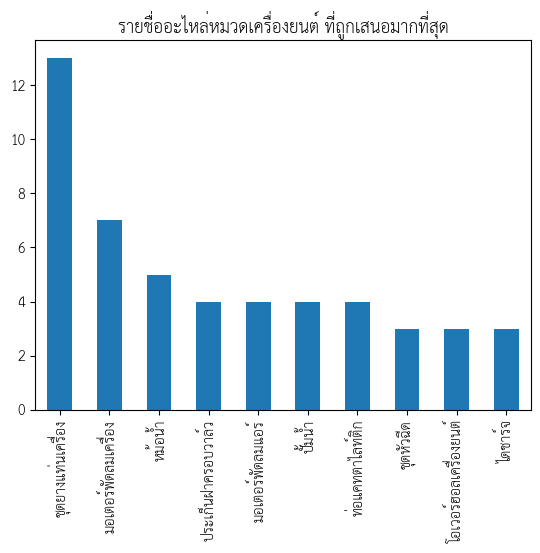

In [ ]:
recommend_partsEnging_to_repair_b2c.sum().sort_values(ascending=False)[0:10].plot(kind='bar',x='จำนวน',y='อะไหล่',
                                                                            title='รายชื่ออะไหล่หมวดเครื่องยนต์ ที่ถูกเสนอมากที่สุด');

In [ ]:
part_b2c_Power_train_chassis = Offer_part_b2c[Offer_part_b2c.ปัญหาของรถ == 'Power train chassis']
part_b2c_Power_train_chassis.sort_values(by='ยอดเสนออะไหล่เพิ่มเติม',ascending=False)

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,Segment,เบอร์โทรศัพท์,province,sector,zone,แขวง,รุ่นรถ,model,วันออกรถ,ปัญหาของรถ,y-m-d,time,jobtype,customertype,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,month
3696,4/25/2024 7:54:41,GSJ22-03812,ฉค-1919,สุมิตตา ลักขณา,หญิง,0865595559,นนทบุรี,ภาคกลาง,บางกรวย,บางกรวย,Camry,ACV41R,2006-12-23,Power train chassis,2022-10-04,8:00,เซ็คระยะ,Normal,Cash,148515,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"21,023",แร็คพวงมาลัย|ท่อน้ำมันพาวเวอร์|ชุดโช๊คอัพหลัง|...,"126,121",18,ไม่อนุมัติ,ksriwanp,PM PART60-200K,อัมรินทร์ ปานสวน,ตุลาคม
3806,5/4/2024 7:59:37,GSJ22-03927,สว-5321,ศรีรัฐ ลักขณาวิไล,ชาย,0634594954,นนทบุรี,ภาคกลาง,บางกรวย,บางขุนกอง,Wish,ANE11R,2006-04-29,Power train chassis,2022-10-12,8:00,เซ็คระยะ,Normal,Cash,316852,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"6,084",แร็คพวงมาลัย|เพลาขับหน้าซ้าย,"114,001",8,ไม่อนุมัติ,pmungmon,NO,อัมรินทร์ ปานสวน,ตุลาคม
4719,7/22/2024 8:44:46,GSJ22-04857,1ขย-5097,อนันต์ พันธ์พิพัฒไพบูลย์,ชาย,0805888071,กรุงเทพมหานคร,ภาคกลาง,บึงกุ่ม,คลองกุ่ม,Prius,ZVW30R,2013-09-15,Power train chassis,2022-12-12,9:00,งานซ่อมทั่วไป,Normal,Cash,205176,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"2,601",ปั้มแอคคิวเอเตอร์เบคร|ปั้มแอคมูเลเตอร์เบคร,"90,682",2,ไม่อนุมัติ,sbooncha,NO,อัมรินทร์ ปานสวน,ธันวาคม
1946,9/26/2023 10:28:19,GSJ22-02012,ชอ-2548,นิภาภรณ์ สังฆสุบรรณ์,หญิง,0863275515,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Altis,ZZE142R,2008-02-26,Power train chassis,2022-06-01,9:00,เซ็คระยะ,Normal,Cash,148555,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"10,169",ชุดโช๊คอัพหน้าหลัง|ชุดลูกหมากกันโคลง|ชุดลูกยาง...,"85,601",30,ไม่อนุมัติ,jpetchab,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มิถุนายน
3165,2/22/2024 8:14:49,GSJ22-03244,ฆม-2007,ชัยวัฒน์ มิ่งไม้,หญิง,0814966530,กรุงเทพมหานคร,ภาคกลาง,ดุสิต,ดุสิต,Prius,ZVW30R,2011-05-30,Power train chassis,2022-08-22,12:00,เซ็คระยะ,Normal,Cash,155302,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"4,986",ยอยพวงมาลัย|แร็คพวงมาลัย|มอเตอร์แกนพวงมาลัย,"82,818",4,ไม่อนุมัติ,sbooncha,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,สิงหาคม
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,6/15/2024 9:39:12,GSJ22-04373,ศน-991,ประวีณ์นุช สุนทรชำนาญเลิศ,หญิง,0966296929,ภูเก็ต,ภาคใต้,เมืองภูเก็ต,ฉลอง,Camry,ASV50R,2015-07-09,Power train chassis,2022-11-10,13:00,เซ็คระยะ,Fleet,Cash,115698,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"6,882",ผ้าเบครหลัง,"1,530",1,ไม่อนุมัติ,jpetchab,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,พฤศจิกายน
3978,5/21/2024 8:04:39,GSJ22-04102,ฎข-9218,ภักดี กาญจนสุทธิรักษ์,หญิง,0818221101,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จันทรเกษม,Vios,NCP93R,2009-08-30,Power train chassis,2022-10-23,12:00,เซ็คระยะ,Normal,Cash,179783,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"3,988",ผ้าเบครหลัง,"1,241",1,ไม่อนุมัติ,jpetchab,PM PART60-200K,อัมรินทร์ ปานสวน,ตุลาคม
177,4/9/2023 10:27:57,GSJ22-00180,1กฒ-1398,วันดี แสงอากาศ,ชาย,0974549963,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Vios,NCP93R,2012-01-22,Power train chassis,2022-01-15,7:00,เซ็คระยะ,Normal,Cash,105018,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"2,945",ชุดซ่อมคาริปเปอร์เบคร,936,1,ไม่อนุมัติ,jpetchab,PM PART60-200K,อัมรินทร์ ปานสวน,มกราคม
4968,8/13/2024 7:47:09,GSJ22-05119,3กข-320,ชญุตม์ กาญจนรุจี,ชาย,0809192999,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Fortuner,GUN156R,2015-11-30,Power train chassis,2022-12-27,8:00,เซ็คระยะ,Normal,Cash,147406,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"10,514",ตั้งศูนย์ล้อ,800,1,ไม่อนุมัติ,rthasi,PM PART60-200K,อัมรินทร์ ปานสวน,ธันวาคม


In [ ]:
recommend_parts_Power_train_chassis_to_repair_b2c = part_b2c_Power_train_chassis['อะไหล่เสนอเพิ่มเติม'].str.get_dummies(sep='|')

## หมวดช่วงล่าง
- อะไหล่ที่พลาดโอกาสการขายมากที่สุด คือ
- ยางรถยนต์ พลาดไปเกือยๆ 50 ชุด
- หมายเหตุ ทางศูนย์บริการ ไม่มีนโยบาย สต๊อกยางรถยนต์เอาไว้อยู่แล้ว
- สั่งเป็นต่อ job เมื่อลูกค้าอนุมัติ
- มูลค่าโดยรวมในการพลาดการขาย = 29,632,16 บาท

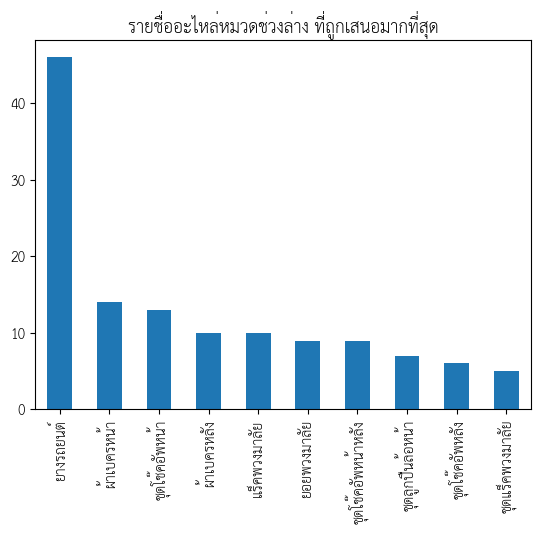

In [ ]:
recommend_parts_Power_train_chassis_to_repair_b2c.sum().sort_values(ascending=False)[0:10].plot(kind='bar',x='จำนวน',y='อะไหล่',
                                                                            title='รายชื่ออะไหล่หมวดช่วงล่าง ที่ถูกเสนอมากที่สุด');

In [ ]:
part_b2c_Electrical = Offer_part_b2c[Offer_part_b2c.ปัญหาของรถ == 'Electrical']
part_b2c_Electrical.sort_values(by='ยอดเสนออะไหล่เพิ่มเติม',ascending=False)

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,Segment,เบอร์โทรศัพท์,province,sector,zone,แขวง,รุ่นรถ,model,วันออกรถ,ปัญหาของรถ,y-m-d,time,jobtype,customertype,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,month
1081,6/6/2023 9:43:23,GSJ22-01109,1ฒบ-8616,ทองคำ นนธิราช,ชาย,0849426444,เลย,ภาคตะวันออกเฉียงเหนือ,วังสะพุง,หนองหญ้าปล้อง,Hilux Revo,GUN135R,2015-08-31,Electrical,2022-03-26,8:00,งานซ่อมทั่วไป,Fleet,Cash,23719,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,500,เซ็นเซอร์เทอร์โบ,"102,131",1,ไม่อนุมัติ,akhutkae,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มีนาคม
3026,2/10/2024 10:01:15,GSJ22-03096,ญฐ-940,วรกรณ์ อุกกุฎานนท์,หญิง,0614144456,กรุงเทพมหานคร,ภาคกลาง,บางนา,บางนา,Camry,AHV40R,2010-06-14,Electrical,2022-08-11,7:00,งานซ่อมทั่วไป,Normal,Cash,615399,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,500,แบตเตอรี่ไฮบริด,"89,773",1,ไม่อนุมัติ,ploecyr,NO,อัมรินทร์ ปานสวน,สิงหาคม
4585,7/8/2024 9:33:29,GSJ22-04717,ฆฌ 1783,ชาติเชื้อ แก้วรุ่งเรือง,ชาย,0635615642,นนทบุรี,ภาคกลาง,ปากเกร็ด,บ้านใหม่,Camry,AHV40R,2010-06-05,Electrical,2022-12-02,13:00,เซ็คระยะ,Normal,Cash,206994,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,500,ชุดตู้แอร์|คอมแอร์,"89,773",7,ไม่อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,ธันวาคม
2000,10/4/2023 8:45:22,GSJ22-02067,1กง-531,ฉัตรชัย วุ้นบาง,ชาย,0878106363,นนทบุรี,ภาคกลาง,เมืองนนทบุรี,ตลาดขวัญ,Camry,AVV50R,2013-10-21,Electrical,2022-06-04,8:00,งานซ่อมทั่วไป,Normal,Warranty,196879,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,50,แบตเตอรี่ไฮบริด,"85,493",1,ไม่อนุมัติ,akhutkae,FREE24,อัมรินทร์ ปานสวน,มิถุนายน
96,4/6/2023 10:14:50,GSJ22-00099,1กฆ-9303,ลักขณาภรณ์ หนูมี,หญิง,0928261564,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จตุจักร,Prius,ZVW30R,2011-06-16,Electrical,2022-01-10,9:00,เซ็คระยะ,Normal,Warranty,120241,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,50,แบตเตอรี่ไฮบริค|ยางรถยนต์,"81,857",3,ไม่อนุมัติ,nchaimag,FREE24,อัมรินทร์ ปานสวน,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,5/1/2024 15:01:40,GSJ22-03890,ชห-9233,มณิศา อุบลสุข,หญิง,0935639119,นนทบุรี,ภาคกลาง,เมืองนนทบุรี,บางกระสอ,Vios,NCP93R,2008-02-22,Electrical,2022-10-08,10:00,งานซ่อมทั่วไป,Normal,Cash,139988,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,511",ฟองน้ำโครมไฟท้าย,502,1,ไม่อนุมัติ,ploecyr,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,ตุลาคม
3569,4/10/2024 8:31:49,GSJ22-03661,4กร-37,ปุษยรัตน์ พุ่มทอง,หญิง,0816329739,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Yaris ATIV,NSP152R,2016-01-09,Electrical,2022-09-24,8:00,เซ็คระยะ,Normal,Cash,76494,น้ำมันเครื่องสังเคราะห์ สีเทา,"3,611",ไฟเลี้ยวแก้มข้างขวา,486,1,ไม่อนุมัติ,rthasi,PM PART60-200K,อัมรินทร์ ปานสวน,กันยายน
3058,2/13/2024 9:37:46,GSJ22-03132,ฌก-1060,เจิมจิตร ทิมจรัส,หญิง,0888794519,กรุงเทพมหานคร,ภาคกลาง,ลาดพร้าว,จรเข้บัว,Altis,ZZE142R,2008-02-28,Electrical,2022-08-13,13:00,งานซ่อมทั่วไป,Normal,Cash,149224,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,62,หลอดไฟใหญ่หน้าขวา,486,1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,สิงหาคม
4762,7/25/2024 10:27:58,GSJ22-04904,ศล-923,ธนภณ สังขวาสี,ชาย,0948796424,กรุงเทพมหานคร,ภาคกลาง,บางรัก,สีลม,Camry,ACV30R,2005-03-05,Electrical,2022-12-14,12:00,งานซ่อมทั่วไป,Normal,Cash,186132,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,197,หลอดไฟใหญ่หน้าซ้าย,486,1,ไม่อนุมัติ,pmungmon,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,ธันวาคม


In [ ]:
recommend_parts_Electrical_to_repair_b2c = part_b2c_Electrical['อะไหล่เสนอเพิ่มเติม'].str.get_dummies(sep='|')

## หมวดไฟฟ้า
- อะไหล่ที่พลาดการขายมากที่สุด คือ แบตเตอรี่
- มูลค่าที่พลาดไปคือ 12,376,75 บาท

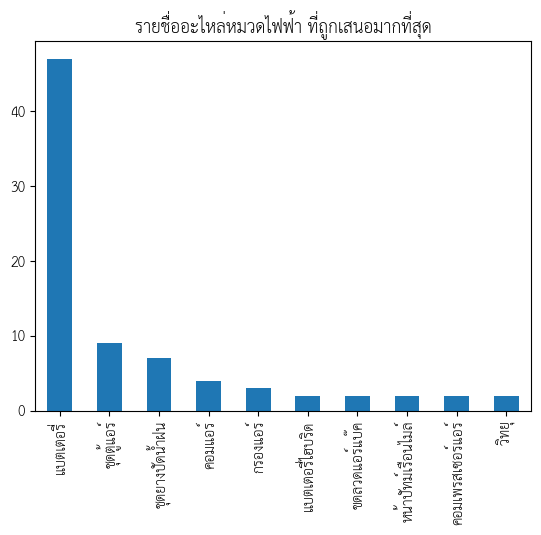

In [ ]:
recommend_parts_Electrical_to_repair_b2c.sum().sort_values(ascending=False)[0:10].plot(kind='bar',x='จำนวน',y='อะไหล่',
                                                                            title='รายชื่ออะไหล่หมวดไฟฟ้า ที่ถูกเสนอมากที่สุด');

## ผลงานภาพรวมของ SA สาขาพหลโยธิน TM1 (ลูกค้าทั่วไป)

In [ ]:
customer_b2c.groupby('พนักงานผู้ให้บริการ')['ค่าใช่จ่าย'].agg(['count','sum','median','mean']).sort_values(by='sum',ascending=False).round(2)

,count,sum,median,mean
พนักงานผู้ให้บริการ,,,,
ดำรงศักดิ์ สิทธิสิริสัมพันธ์,1433,"9,829,285","3,977","6,859"
อัมรินทร์ ปานสวน,1143,"6,535,656","3,770","5,718"
วิชิต โพธิแสง,59,"257,207","2,317","4,359"


## ผลงานในปี 2022 sa อัมรินทร์ หัวหน้าแผนกบริการรับรถของ TM1 (ลูกค้าประเภททั่วไป)

In [ ]:
SA_Amarin_b2c = customer_b2c[(customer_b2c.พนักงานผู้ให้บริการ == 'อัมรินทร์ ปานสวน')]
SA_Amarin_b2c.head()

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,Segment,เบอร์โทรศัพท์,province,sector,zone,แขวง,รุ่นรถ,model,วันออกรถ,ปัญหาของรถ,y-m-d,time,jobtype,customertype,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,month
9,4/2/2023 15:45:01,GSJ22-00010,6กจ-9197,อิฐ รำมะนะ,ชาย,0815606867,กรุงเทพมหานคร,ภาคกลาง,ห้วยขวาง,สามเสนนอก,Sienta,NSP170R,2017-03-06,NO,2022-01-04,8:00,เซ็คระยะ,Normal,Cash,79862,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,000",NO,0,0,อนุมัติ,sbooncha,NO,อัมรินทร์ ปานสวน,มกราคม
15,4/2/2023 17:08:14,GSJ22-00016,ญบ-2125,เบจมาศ มาร์กิ้น,หญิง,0815850062,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จตุจักร,Fortuner,KUN51R,2010-05-26,Electrical,2022-01-04,11:00,เซ็คระยะ,Fleet,Cash,183348,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,"4,767",แบตเตอรี่,"3,850",1,ไม่อนุมัติ,sbooncha,PM PART60-200K,อัมรินทร์ ปานสวน,มกราคม
22,4/2/2023 17:59:00,GSJ22-00023,2กธ-7263,สาลินี สุริยะโชติตระกูล,หญิง,0875561732,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,Vios,NCP150R,2013-08-20,NO,2022-01-04,13:00,งานซ่อมทั่วไป,Normal,Cash,213716,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"21,645",NO,0,0,อนุมัติ,ploecyr,NO,อัมรินทร์ ปานสวน,มกราคม
25,4/3/2023 10:36:24,GSJ22-00026,วว-504,กรรณิการ์ ชลลัมพี,หญิง,0816941817,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Camry,ACV31R,2002-12-23,"Enging, Electrical",2022-01-05,10:00,เซ็คระยะ,Normal,Cash,86662,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"4,741",ยางแท่นเครื่องเบอร์1|อ็อกซิเจนเซ็นเซอร์|สายดึง...,"26,263",5,ไม่อนุมัติ,nchaimag,PM PART60-200K,อัมรินทร์ ปานสวน,มกราคม
26,4/3/2023 10:43:43,GSJ22-00027,9กฐ-2754,หัสนันท์ หลู่,หญิง,0644626655,นนทบุรี,ภาคกลาง,ปากเกร็ด,บ้านใหม่,Corolla Cross,ZVG10R,2020-12-21,NO,2022-01-05,11:00,เซ็คระยะ,Normal,Cash,18517,น้ำมันเครื่องสังเคราะห์ สีเทา,"1,993",NO,0,0,อนุมัติ,ksriwanp,NO,อัมรินทร์ ปานสวน,มกราคม


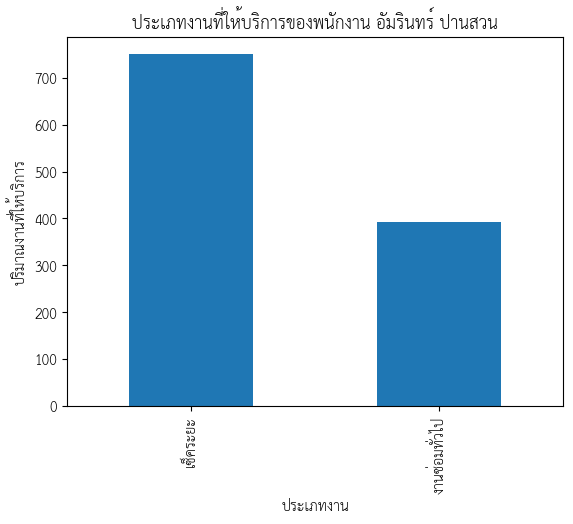

In [ ]:
SA_Amarin_b2c.value_counts('jobtype').sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('ประเภทงานที่ให้บริการของพนักงาน อัมรินทร์ ปานสวน')
plt.ylabel('ปริมาณงานที่ให้บริการ')
plt.xlabel('ประเภทงาน');

In [ ]:
SA_Damrongsak_b2c = customer_b2c[(customer_b2c.พนักงานผู้ให้บริการ == 'ดำรงศักดิ์ สิทธิสิริสัมพันธ์')]
SA_Damrongsak_b2c.head()

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,Segment,เบอร์โทรศัพท์,province,sector,zone,แขวง,รุ่นรถ,model,วันออกรถ,ปัญหาของรถ,y-m-d,time,jobtype,customertype,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,month
0,4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,Camry,AXVH71R,2018-12-27,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"1,142",NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม
1,4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,Yaris,NSP152R,2019-04-04,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,"9,755",NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม
2,4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Camry,AVV50R,2012-05-11,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"76,870",NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม
4,4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,Altis,ZRE141R,2010-10-01,Power train chassis,2022-01-03,8:00,งานซ่อมทั่วไป,Fleet,Cash,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"7,538",ชุดลูกหมากแร็กตัวนอกใน,"26,857",1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม
6,4/2/2023 14:46:13,GSJ22-00007,ศว-8533,สมโภชน์ จินดาวัฒนะ,ชาย,0819027983,กรุงเทพมหานคร,ภาคกลาง,ลาดพร้าว,จรเข้บัว,Altis,ZZE122R,2005-06-14,NO,2022-01-04,9:00,เซ็คระยะ,Normal,Cash,365797,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"2,378",NO,0,0,อนุมัติ,ksriwanp,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม


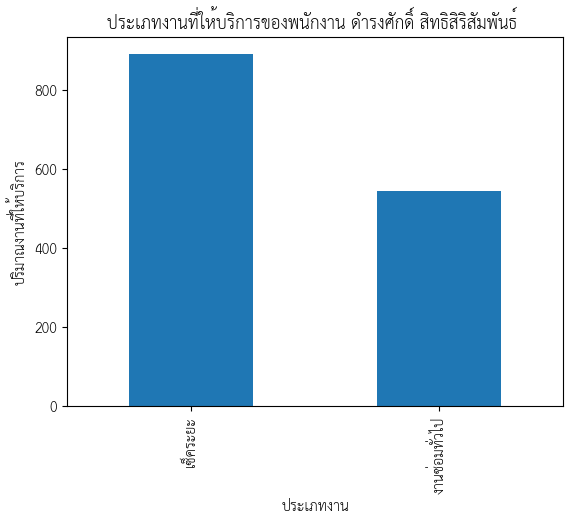

In [ ]:
SA_Damrongsak_b2c.value_counts('jobtype').sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('ประเภทงานที่ให้บริการของพนักงาน ดำรงศักดิ์ สิทธิสิริสัมพันธ์ ')
plt.ylabel('ปริมาณงานที่ให้บริการ')
plt.xlabel('ประเภทงาน');

### ทำไมลูกค้าที่ต่างจังหวัดถึงควรทำการตลาด
- เพราะลูกค้ากลุ่มนี้ต้องการความจริงใจ
- เราอาจจะไม่ต้องให้ส่วนลดทุกครั้งก็ได้ เพราะเกิดจากความจริงใจในการให้บริการ
- เราต้องทำให้ลูกค้าเจอเราได้ง่ายขึ้น ทางออนไลน์ต้องทำให้เข้าถึงลูกค้าได้ง่าย
- เพราะถ้าเราได้ใจลูกค้ากลุ่มนี้ไกลแค่ไหนเขาก็จะมา ถ้าเขามีปัญหาหรือต้องการ เซ็คระยะ
- สิ่งที่ผู้วิเคราะห์สังเกตุ คือ ถ้าลูกค้ามีความไว้ใจอู่จะได้รับความยอมรับจากลูกค้าและบอกต่อเอง

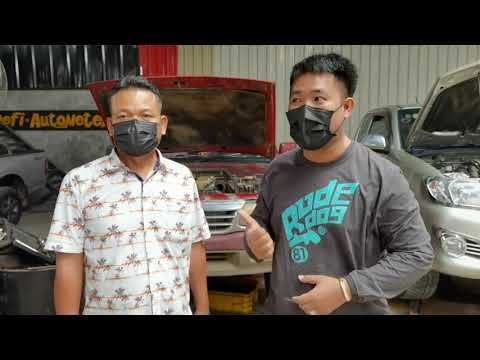

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('BDT_miRqdQY', width=720, height=405)

In [ ]:
df['y-m-d'] = pd.to_datetime(df['y-m-d'], errors='coerce')
df['month'] = df['y-m-d'].dt.month

In [ ]:
df = df.replace({"month":{
    1 :"มกราคม",
    2 :"กุมภาพันธ์",
    3 :"มีนาคม",
    4 :"เมษายน",
    5 :"พฤษภาคม",
    6 :"มิถุนายน",
    7 :"กรกฎาคม",
    8 :"สิงหาคม",
    9 :"กันยายน",
    10 :"ตุลาคม",
    11 :"พฤศจิกายน",
    12 :"ธันวาคม"
}})

In [ ]:
df['month']=pd.Categorical(df['month'],
            categories=['มกราคม','กุมภาพันธ์','มีนาคม','เมษายน','พฤษภาคม','มิถุนายน','กรกฎาคม','สิงหาคม','กันยายน','ตุลาคม','พฤศจิกายน','ธันวาคม'],
            ordered=True)
df[0:5]

,Timestamp,เลขที่ใบสั่งซ่อม,ทะเบียนรถ,name,Segment,เบอร์โทรศัพท์,province,sector,zone,แขวง,รุ่นรถ,model,วันออกรถ,ปัญหาของรถ,y-m-d,time,jobtype,customertype,การจ่ายเงิน,ระยะทางวันเข้าซ่อม,Oil,ค่าใช่จ่าย,อะไหล่เสนอเพิ่มเติม,ยอดเสนออะไหล่เพิ่มเติม,list_no,status,ช่างผู้ทำการเสนอ,รหัสแคมเปญ,พนักงานผู้ให้บริการ,month
0,4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,Camry,AXVH71R,2018-12-27,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"1,142",NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม
1,4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,Yaris,NSP152R,2019-04-04,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,"9,755",NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม
2,4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,Camry,AVV50R,2012-05-11,NO,2022-01-03,7:00,เซ็คระยะ,Normal,Warranty,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,"76,870",NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม
3,4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,Camry,ASV71R,2018-11-28,NO,2022-01-03,7:00,งานซ่อมทั่วไป,Fleet,Warranty,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"1,515",NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม
4,4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,Altis,ZRE141R,2010-10-01,Power train chassis,2022-01-03,8:00,งานซ่อมทั่วไป,Fleet,Cash,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,"7,538",ชุดลูกหมากแร็กตัวนอกใน,"26,857",1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์,มกราคม


### ภาพรวมรายได้ของศูนย์บริการ toyota พหลโยธิน รายเดือนในปี 2022
- ในภาพรวม รายได้เฉลี่ยของ ศูนยืบริการ toyota พหลโยธิน ประมาณ 2,474,759 บาท
- ถ้าอยากจะได้ยอดขายเพิ่ม เราต้องดำเนินการทางธุรกิจให้ได้อย่างน้อยๆเดือนละ 2,500,000 บาท ต่อเดือน

In [ ]:
Monthly_revenue_b2b_b2c = df.groupby('month')['ค่าใช่จ่าย'].agg(['count','sum']).round(2)
Monthly_revenue_b2b_b2c.style.highlight_between(left=2000000, right=2500000,props='font-weight:bold;color:#5dade2')

,count,sum
month,,
มกราคม,419,2442652.060000
กุมภาพันธ์,361,2451929.000000
มีนาคม,384,2021579.000000
เมษายน,384,2053700.000000
พฤษภาคม,395,2788633.000000
มิถุนายน,504,3778668.000000
กรกฎาคม,426,2598418.000000
สิงหาคม,425,2195076.000000
กันยายน,357,2003005.000000


In [ ]:
display(Monthly_revenue_b2b_b2c['sum'].mean(),
        Monthly_revenue_b2b_b2c['sum'].median(),
        Monthly_revenue_b2b_b2c['sum'].max(),
        Monthly_revenue_b2b_b2c['sum'].min())

2474759.3383333334

2415513.5300000003

3778668.0

2003005.0

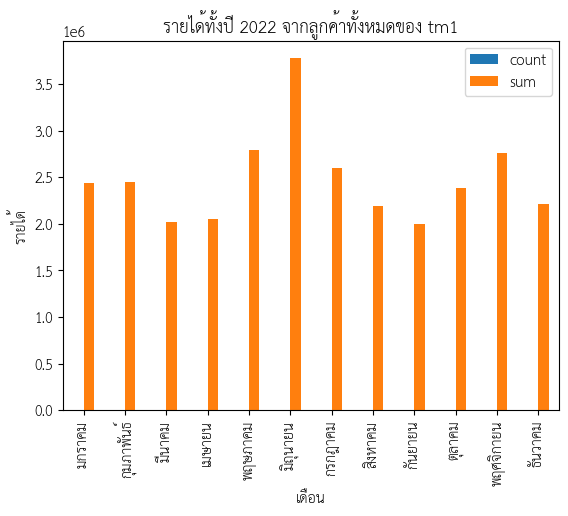

In [ ]:
Monthly_revenue_b2b_b2c.plot(kind='bar',title='รายได้ทั้งปี 2022 จากลูกค้าทั้งหมดของ tm1')
plt.ylabel('รายได้')
plt.xlabel('เดือน');

## ในภาพรวม ศูนย์บริการ tm 1 ยังต้องพึ่งลูกค้าประเภทบริษัทอยู่ค่อนข้างมาก
- ความเห็นจะผู้วิเคราะห์ เห็นว่าค่อยข้างอันตราย เพราะถ้าเราเสียไปแค่บริษัทเดียว
- ยอดขายจะหายไปอย่างมาก

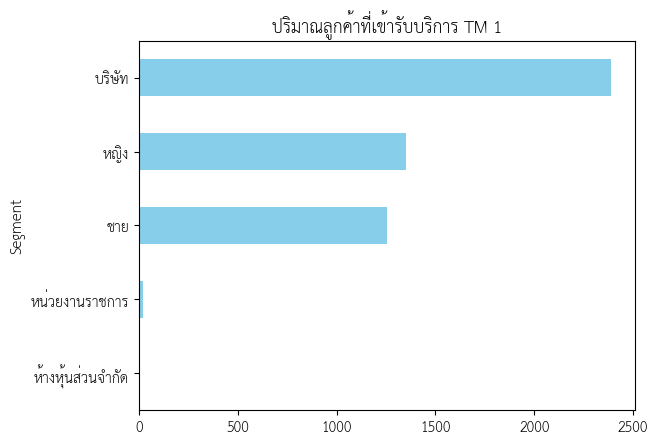

In [ ]:
df.value_counts('Segment').sort_values(ascending=True).plot(kind='barh',color='skyblue',x='กลุ่มลูกค้า',
                                                           title='ปริมาณลูกค้าที่เข้ารับบริการ TM 1');

In [ ]:
#save = Monthly_revenue_b2b_b2c = df.groupby('month')['ค่าใช่จ่าย'].agg(['count','sum']).round(2)

In [ ]:
#save.to_csv('demoml.csv', index=False, columns=['count', 'sum'])

In [ ]:
display(Monthly_revenue_b2b_b2c[['sum']].mean(),
        Monthly_revenue_b2b_b2c[['sum']].median(),
        Monthly_revenue_b2b_b2c[['sum']].max(),
        Monthly_revenue_b2b_b2c[['sum']].min())

,0
sum,"2,474,759"


,0
sum,"2,415,514"


,0
sum,"3,778,668"


,0
sum,"2,003,005"


## ผู้วิเคราะห์จะทำการใช้ ml ในการทำนาย
- จากข้อมูลด้านบนจะเห็นว่าค่าเฉลี่ยของรายได้ต่อเดือนจะอยู่ประมาณ 24,74759 บาท
- ถ้าเราต้องการที่จะได้ยอดขายเพิ่มเราต้องทำให้ได้มากกว่า เดือน 25,00000 บาท
## จากการใช้ ml ทำนายพบว่า
- ทางศูนย์บริการต้องมีรถเข้าอย่างน้อยๆเดือนละ 430 คัน ขึ้น ถึงจะมียอดขายเดือนละ 25,00000

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data_set_ml = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTnb40gFYy3rNaHeUjROYcD1sbA2SUCzT-wpp0MarPOQxJNaNcIDkD7akfdLUY5lywXCTneg1kBFpSC/pub?output=csv')
data_set_ml

,total,sum
0,419,2442652
1,361,2451929
2,384,2021579
3,384,2053700
4,395,2788633
5,504,3778668
6,426,2598418
7,425,2195076
8,357,2003005
9,441,2388375


y = 7223.44x + -550056.69

ปริมาณรถยนต์ที่เข้าศูนย์บริการ 400 คันจะได้ยอดขายเท่าไร 2339320 บาท
ปริมาณรถยนต์ที่เข้าศูนย์บริการ 420 คันจะได้ยอดขายเท่าไร 2483789 บาท
ปริมาณรถยนต์ที่เข้าศูนย์บริการ 430 คันจะได้ยอดขายเท่าไร 2556023 บาท


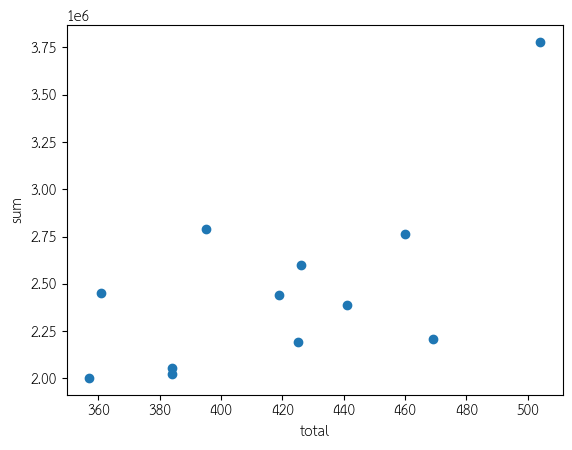

In [ ]:
x = data_set_ml[['total']]
y = data_set_ml['sum']
plt.scatter(x, y)
plt.xlabel('total')
plt.ylabel('sum')
x = np.array(x).reshape(-1,1)
y =data_set_ml['sum']
model = LinearRegression()
model.fit(x, y)

ic = '{:.2f}'.format(model.intercept_)
ce = '{:.2f}'.format(model.coef_[0])
print(f'y = {ce}x + {ic}')
print()
x_predict = [[400],[420],[430]]
y_predict = model.predict(x_predict)
# แสดงผล
for (i, p) in enumerate(x_predict):
    sale = '{:.0f}'.format(y_predict[i])
    t = f'ปริมาณรถยนต์ที่เข้าศูนย์บริการ {p[0]} คัน'
    t+= f'จะได้ยอดขายเท่าไร {sale} บาท'
    print(t)

## ใช้ค่าเฉลี่ยยังดีกว่าใช้ ml
- เพราะค่า R-Squared: -3.2644
* ในความเป็นจริงมันไม่สมควรจะติดลบได้

In [ ]:
x = data_set_ml[['total']]
x = np.array(x).reshape(-1,1)
y = data_set_ml['sum']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print('R-Squared:',"{:.4f}".format(score))
print()
accuracy = score * 100
print('Accuracy:',"{:.2f}".format(accuracy),'%')
print(f'มีระดับความแม่นยำประมาณ {accuracy}%')
## ใช้ค่าเฉลี่ยยังดีกว่าใช้ ml

R-Squared: -3.2644

Accuracy: -326.44 %
มีระดับความแม่นยำประมาณ -326.4382917314429%


# กลยุทธ์วิธีเพิ่มยอด จากลูกค้า b2b
# คำแนะนำ
1.ควรมุ่งเน้นรักษาลูกค้าบริษัท ช่อง 7 และ ลีสซิ่งไอซีบีซี ให้ดี\
2.ควรจะทำการตลาดกับบริษัทที่มียอดเขาน้อยแต่จ่ายเงินมากเอาไว้ เพราะธุรกิจเขามีแนวโน้มเติมโต\
3.อะไหล่ มอเตอร์พัดลมเครื่อง มอเตอร์พัดลมแอร์ ยางรถยนต์ ชุดคลัทช์ แบตเตอรี่ สำหรับลูกค้าประเภทบริษัทมักจะไม่เปลี่ยนของศูนย์บริการ เนื่องจากราคาอาจจะแพง\
4.ราคาเซ็คระยะ หรือ เสนออะไหล่เพิ่มเติม กรณีหักส่วนลดแล้ว
- รถระยะประมาณไม่เกิน 10000 - 40000 ควรทำขายอะไหล่ให้ได้อย่างน้อยๆ 1600 บาท ต่อคันสำหรับลูกค้าบริษัท
- รถระยะประมาณไม่เกิน 50000 - 80000 ควรทำการขายอะไหล่ให้ได้อย่างน้อยๆ 2800 บาท ต่อคันสำหรับลูกค้าบริษัท
- รถระยะประมาณ 150000 ขึ้นไปควรทำการขายให้ได้อย่างน้อยๆ 5800 บาท ต่อคัน\
(ไม่ต้องเสนอให้ได้ทุกคันเอาใกล้เคียงก็ได้แต่ถ้าได้มันก็จะช่วยเพิ่มยอดขายให้ศูนย์บริการได้)
- ข้อดีของลูกค้าประเภทบริษัทคือ รถถึงระยะเวลาเซ็คระยะเร็วกว่ารถบุคคลธรรมดา
อาศัยว่าเข้าศูนย์บริการถี่กว่า รถบุคคลธรรมดา
---
- ลูกค้าประเภทบริษัทจะไม่ทำการเปลี่ยนอะไหล่กับทางศูนย์บริการถ้าไม่จำเป็น
- ดังนั้นควรจะเสนอราคาให้อยู่ในการเซ็คระยะที่มาค่าใช่จ่ายตามเกณฑ์ที่กำหนด
- ลูกค้าประเภทบริษัทที่มีการเสนอราคาที่เยอะๆ ควรให้คุณ วิชิต โพธิแสง ผู้จัดการศูนย์บริการ TM 1 และ คุณดำรงศักดิ์ สิทธิสิริสัมพันธ์ เป็นผู้พูดคุยนำเสนอให้กับทางลูกค้าบริษัท
- จัดฝึกอบรมเทคนิคการเสนอขายให้กับพนักงานรับรถ เพื่อจะมีทักษะเพิ่มเติมในการเสนอให้ลูกค้า การพูดโน้มน้าวใจลูกค้า
## insight
_บริษัทที่นำรถเข้าศูนย์บริการน้อย ส่วนใหญ่ทำธุรกิจ ที่เป็นมีแนวโน้นเติมโตในอนาคตทั้งนั้น_
- ดังนั้นลูกค้ากลุ่มค่อนข้างน่าสนใจมาก เพราะมีการจ่ายค่าซ่อมต่อ 1 ครั้งมากกว่า ลูกค้าระดับ top 10
- ดังนั้นในการทำการตลาดกับลูกค้ากลุ่มนี้ เพื่อดูว่ามีการใช้รถโตโยต้ากี่คัน
- ข้อดีลูกค้ากลุ่มนี้จะซ่อมเยอะ
- ข้อเสีย คือถามมีรถ toyota น้อยก็จะนานๆเข้าที
- ควรทำการตลาดกับลูกค้ากลุ่มนี้ อนาคตอาจจะเป็นลูกค้าประจำ เหมือน ลูกค้า top10

## กลยุทธ์วิธีเพิ่มยอด จากลูกค้า b2c
## คำแนะนำ
- เน้นกลุ่มลูกค้าที่ใช้รถยนต์ camry fortuner C-HR corlla cross Hilux Revo ให้มากที่สุด
- ควรเน้นการขาย เคมีภัณฑ์ น้ำมันสังเคราะห์ ทั้งหมด และ เคมีภัณฑ์ อื่นๆด้วย เช่น น้ำยาล้างหัวฉีด เบนซิน และ ดีเซล
- สร้าง Branding บนอินเตอร์เน็ตมากขึ้น ให้ลูกค้ารู้จักเรามากขึ้น
- การบริการต้องแสดงถึงความจริงใจต่อลูกค้า
## กลยุทธ์การตลาดที่น่าสนใจ (สำหรับลูกค้าที่ต้องการเดินทางออกต่างจังหวัด หรือเดินทางไกล)
สร้างความตระหนักรู้ถึงความสำคัญของการตรวจเช็คสภาพรถก่อนเดินทาง:
สื่อสารผ่านช่องทางออนไลน์:
โซเชียลมีเดีย: Facebook, Instagram, TikTok สร้างคอนเทนต์ที่น่าสนใจ เช่น วิดีโอสั้นๆ แสดงให้เห็นถึงปัญหาที่อาจเกิดขึ้นกับรถยนต์หากไม่ได้รับการตรวจเช็คก่อนเดินทาง
เว็บไซต์: สร้างหน้า Landing Page แยกสำหรับโปรโมชั่นช่วงสงกรานต์ เทศกาลหยุดยาวอื่นๆด้วย
### ทำการตลาดกับลูกค้าต่างจังหวัด
- เพราะลูกค้ากลุ่มนี้ต้องการความจริงใจ
- เราอาจจะไม่ต้องให้ส่วนลดทุกครั้งก็ได้ เพราะเกิดจากความจริงใจในการให้บริการ
- เราต้องทำให้ลูกค้าเจอเราได้ง่ายขึ้น ทางออนไลน์ต้องทำให้เข้าถึงลูกค้าได้ง่าย
- เพราะถ้าเราได้ใจลูกค้ากลุ่มนี้ไกลแค่ไหนเขาก็จะมา ถ้าเขามีปัญหาหรือต้องการ เซ็คระยะ
- สิ่งที่ผู้วิเคราะห์สังเกตุ คือ ถ้าลูกค้ามีความไว้ใจอู่จะได้รับความยอมรับจากลูกค้าและบอกต่อเอง
## เน้นการสร้างความประทับใจให้กับลูกค้า
- เน้นลูกค้าประเภท b2c เป็นหลักถ้าเป็นผู้หญิงยิ่งดี
## เน้นการโปรโมทอะไหล่ตามฤดูกาล
1.ฤดูร้อน มีผลต่อยางรถยนต์
- ฤดูร้อน แบตเตอรี่ประสิทธิภาพลดลง ความร้อนสูงทำให้แบตเตอรี่ โดยเฉพาะกับรถ ไฮบริด
- ฤดูร้อนทำให้ อุปกรณ์ภายในรถ เช่น คอนโซนรถเลือมเร็วขึ้น
- ควรเน้นโปรโมท อะไหล่ ยางรถยนต์ แบตเตอรี อะไหล่เสริมต่างๆเช่น แผงบังแดดกระจกหน้า
- ควรเน้นโปรโมท อะไหล่เกี่ยวกับแอร์ เช่น ฤดูร้อนรถคันไหมมี ปํญหาเกี่ยวกับการทำความเย็น ช่วงนี้มีโปรโมทชั่นราคาพิเศษ ส่วนลดค่าอะไหล่ 10 % ค่าแรง 15 % เฉพาะ หน้าร้อนเท่านั้น
---
2.ฤดูฝน
- ถ้ายางรถยนต์เสื่อม ก็อาจจะทำให้ลื่น ควรจะโปรโมชั่นเปลี่ยนยางรถยนต์
- อะไหล่ อื่นๆของระบบช่วงล่าง เช่น ผ้าเบคร แผ่งใต้เครื่อง ยางปัดน้ำฝน และ ใบปัดน้ำฝน
- ไฟหน้า ไฟท้าย
## หรือดูว่า ช่วงไหนที่ช่าง เสนออะไหล่แต่ลูกค้าไม่เปลี่ยน
- ควรจะเสนอโปรโมชั่นพิเศษ สำหรับลูกค้าท่านนั้นไปเลย
- เช่นอาจจะลดให้เป็นราคาพิเศษ อะไหล่ 15 % ค่าแรง 15 %
